## Preamble

In [ ]:
# change directory from google colab into google drive, connect to google drive first
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')
nb_path = '/content/notebooks'
os.symlink('/content/drive/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0,nb_path)

Mounted at /content/drive


In [ ]:
# check the current working dir # printing current working directory
!pwd

/content


In [ ]:
# change the present working directory
import os
#os.chdir('/content/drive/MyDrive/Colab Notebooks')
os.chdir('/content/drive/MyDrive/RMSC6007')

In [ ]:
# After executing the cell above, Drive files will be present in "/content/drive/My Drive".
!ls "/content/drive/MyDrive/RMSC6007"

'1a. Basics.ipynb'					   6_OptimalPortfolio.ipynb
'1b. Lists.ipynb'					   car.py
'1c. If Statements.ipynb'				   chapter_3_utils.py
'1d. Dictionaries.ipynb'				   chapter_4.ipynb
'1e. Loops.ipynb'					   chapter_5.ipynb
'1fFull. Functions.ipynb'				   chapter_6_utils.py
 1g.Classes.ipynb					   chapter_7.ipynb
'2022S RMSC6005 - Project Group List (Responses).gsheet'   electric_car.py
 2023S_RMSC6007Project.gform				   fib.py
'2023S_RMSC6007Project (Responses).gsheet'		   make_pizza.py
 2024S_RMSC6007Project.gform				   __pycache__
'2024S_RMSC6007Project (Responses).gsheet'		  'Questionnaire for RMSC6005.gform'
 2_TimeSeries.ipynb					  'Questionnaire for RMSC6007.gform'
 3_MultiFactorModels.ipynb				  'RMSC6005 Simulation.gjam'
 4_GARCH.ipynb						  'RMSC6005 TimeSeries-CAPM-(G)ARCH.gjam'
 5_MCSimulation.ipynb					   RMSC6007-Cover.gslides


In [ ]:
pip install matplotlib;

Notes:

* Suppress output
    * Put a `;` at the end of a line to suppress the printing of output. This is useful when doing calculations which generate long output you are not interested in seeing. It also keeps the object out of the output cache, so if you’re working with large temporary objects, they’ll be released from memory sooner.

In [ ]:
a=1
a

1

In [ ]:
a;

In [ ]:
# Default setting
# Import matplotlib and warnings
import matplotlib.pyplot as plt
import warnings

# Set up the style of the plots to'seaborn', you may change it to whatever you like
# Check https://www.python-graph-gallery.com/seaborn/
plt.style.use('seaborn')

# Default plot settings: figuresize and resolution
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300

# Disable some warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<ipython-input-9-1ee40bbe5e98>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


# **3. Time Series Modeling**

In this chapter, we will introduce the basics of time series modeling. We start by explaining the building blocks of time series and how to separate them using decomposition methods. Later, we will introduce the concept of stationarity—why it is important, how to test for it, and ultimately how to achieve it in case the original series is not stationary.

We will also look into two of the most widely used approaches to time series modeling— **the exponential smoothing methods** and **ARIMA class** models. In both cases, we will show you how to fit the models, evaluate the goodness of fit, and forecast future values of the time series. Additionally, we will present a novel approach to modeling a time series using the additive model from Facebook's Prophet library.

We cover the following recipes in this chapter:

* Decomposing time series
* Decomposing time series using Facebook's Prophet
* Testing for stationarity in time series
* Correcting for stationarity in time series
* Modeling time series with exponential smoothing methods
* Modeling time series with ARIMA class models
* Forecasting using ARIMA class models

## 3.1 Decomposing time series

Time series components can be divided into two types: systematic and non-systematic.

The systematic ones are characterized by consistency and the fact that they can be described and modeled. By contrast, the non-systematic ones cannot be modeled directly.

Systematic components:
* level: The mean value in the series.
* trend: An estimate of the trend, that is, the change in value between successive time points at any given moment. It can be associated with the slope (increasing/decreasing) of the series.
* seasonality: Deviations from the mean caused by repeating short-term cycles.

Non-systematic component:
* noise: The random variation in the series

There are two types of models that are used for decomposing time series: additive and multiplicative.

Additive model:

* Model's form: y(t) = level + trend + seasonality + noise
* Linear model: changes over time are consistent in size
* The trend is linear (straight line)
* Linear seasonality with the same frequency (width) and amplitude (height) of cycles over time

Multiplicative model:

* Model's form: y(t) = level * trend * seasonality * noise
* Non-linear model: changes over time are not consistent in size, for example, exponential
* A curved, non-linear trend
* Non-linear seasonality with increasing/decreasing frequency and amplitude of cycles over time

It can be the case that we do not want to work with the multiplicative model. One possible solution is to apply certain transformations to make the trend/seasonality linear. One example of a transformation could be taking the log of a series in which we observe exponential growth.

Notes:

* Classes are blueprints that allow you to create instances with attributes and bound functionality.
* Modules are essentially singleton instances of an internal module class, and all their globals are attributes on the module instance.

```statsmodel```
* statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.


In this recipe, we present how to carry out time-series decomposition of monthly gold prices downloaded from Quandl.

In [ ]:
pip install quandl;

In [ ]:
pip install statsmodels;

In [ ]:
# Import the libraries
import pandas as pd
import quandl
from statsmodels.tsa.seasonal import seasonal_decompose

# Notes:

```import module``` &nbsp; vs &nbsp; ```from module import function```  

* ```import module ```
    * You need ``statsmodels.tsa.seasonal.seasonal_decompose`` to use the function which is cumbersome in our case.

* ```from module import function```
    * You may access ```seasonal_decompose``` directly.
    * Importing a function into the global namespace risks name collisions.

**```import module```**

Pros:
*   Less maintenance of your import statements. Don't need to add any additional imports to start using another item from the module

Cons:
*   Typing ```module.foo``` in your code can be tedious and redundant (tedium can be minimized by using import module as mo then typing mo.foo)


**```from module import foo```**

Pros:
*   Less typing to use ```foo```. More control over which items of a module can be accessed

Cons:
*   To use a new item from the module you have to update your import statement
You lose context about ```foo```. For example, it's less clear what ```ceil()``` does compared to ```math.ceil()```





In [ ]:
# QUANDL_KEY = '{key}' # replace {key} with your own API key
QUANDL_KEY = '6J66VAfsNrsDn8n4xwUG'
quandl.ApiConfig.api_key = QUANDL_KEY

# Download the prices of gold for years 2000-2011
df = quandl.get(dataset='WGC/GOLD_MONAVG_USD',
                start_date='2000-01-01',
                end_date='2011-12-31')


# Change the column name from "Value" to "price"
df.rename(columns={'Value': 'price'}, inplace=True)
print(f'Shape of DataFrame: {df.shape}')
df.head()

# See https://docs.data.nasdaq.com/
# Sign up link: https://data.nasdaq.com/sign-up

Shape of DataFrame: (184, 1)


price
Date              
2000-01-31  284.31
2000-02-29  299.86
2000-03-31  286.39
2000-04-28  279.69
2000-04-30  279.69

There are some duplicate values in the series.
As shown above, there is an entry for 2000-04-28 and 2000-04-30, both with the same value 279.69.

To deal with this issue, we resample to monthly data by only taking the last available value (this does not change any of the actual values; it only removes potential duplicates in each month).

Notes: (Recall Part a of our preliminary section)
* `f-string`
    * To create an f-string, prefix the string with `f` or `F`.
    * The syntax is similar to `str.format()` but less verbose.
    * f-strings are evaluated at runtime, so you can put any valid Python expressions in them.

In [ ]:
# f-string
name = "Jane"
age = 12
print(f"Hello, {name}. You are {age}.")

print(f"{2 * 3}")

print(f"{name.lower()}")

Hello, Jane. You are 12.
6
jane


In [ ]:
# Resample by month and only take the last available value
df = df.resample('M').last()
print(f'Shape of DataFrame: {df.shape}')
df.head()

Shape of DataFrame: (144, 1)


price
Date              
2000-01-31  284.31
2000-02-29  299.86
2000-03-31  286.39
2000-04-30  279.69
2000-05-31  275.19

Notes:
* `pandas.DataFrame.resample(rule)`
    * rule : the offset string or object representing target conversion.
        * `T`, `min` minutely frequency
        * `H` hourly frequency
        * `D` calendar day frequency
        * `M` month end frequency
        * `Q` quarter end frequency
        * `A`, `Y` year end frequency
    * For more details, please refer to https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

Remarks:
* We made sure that the series only contained one data point per month (we enforced this by resampling the data to monthly frequency) so that the unit for the window will be one month.

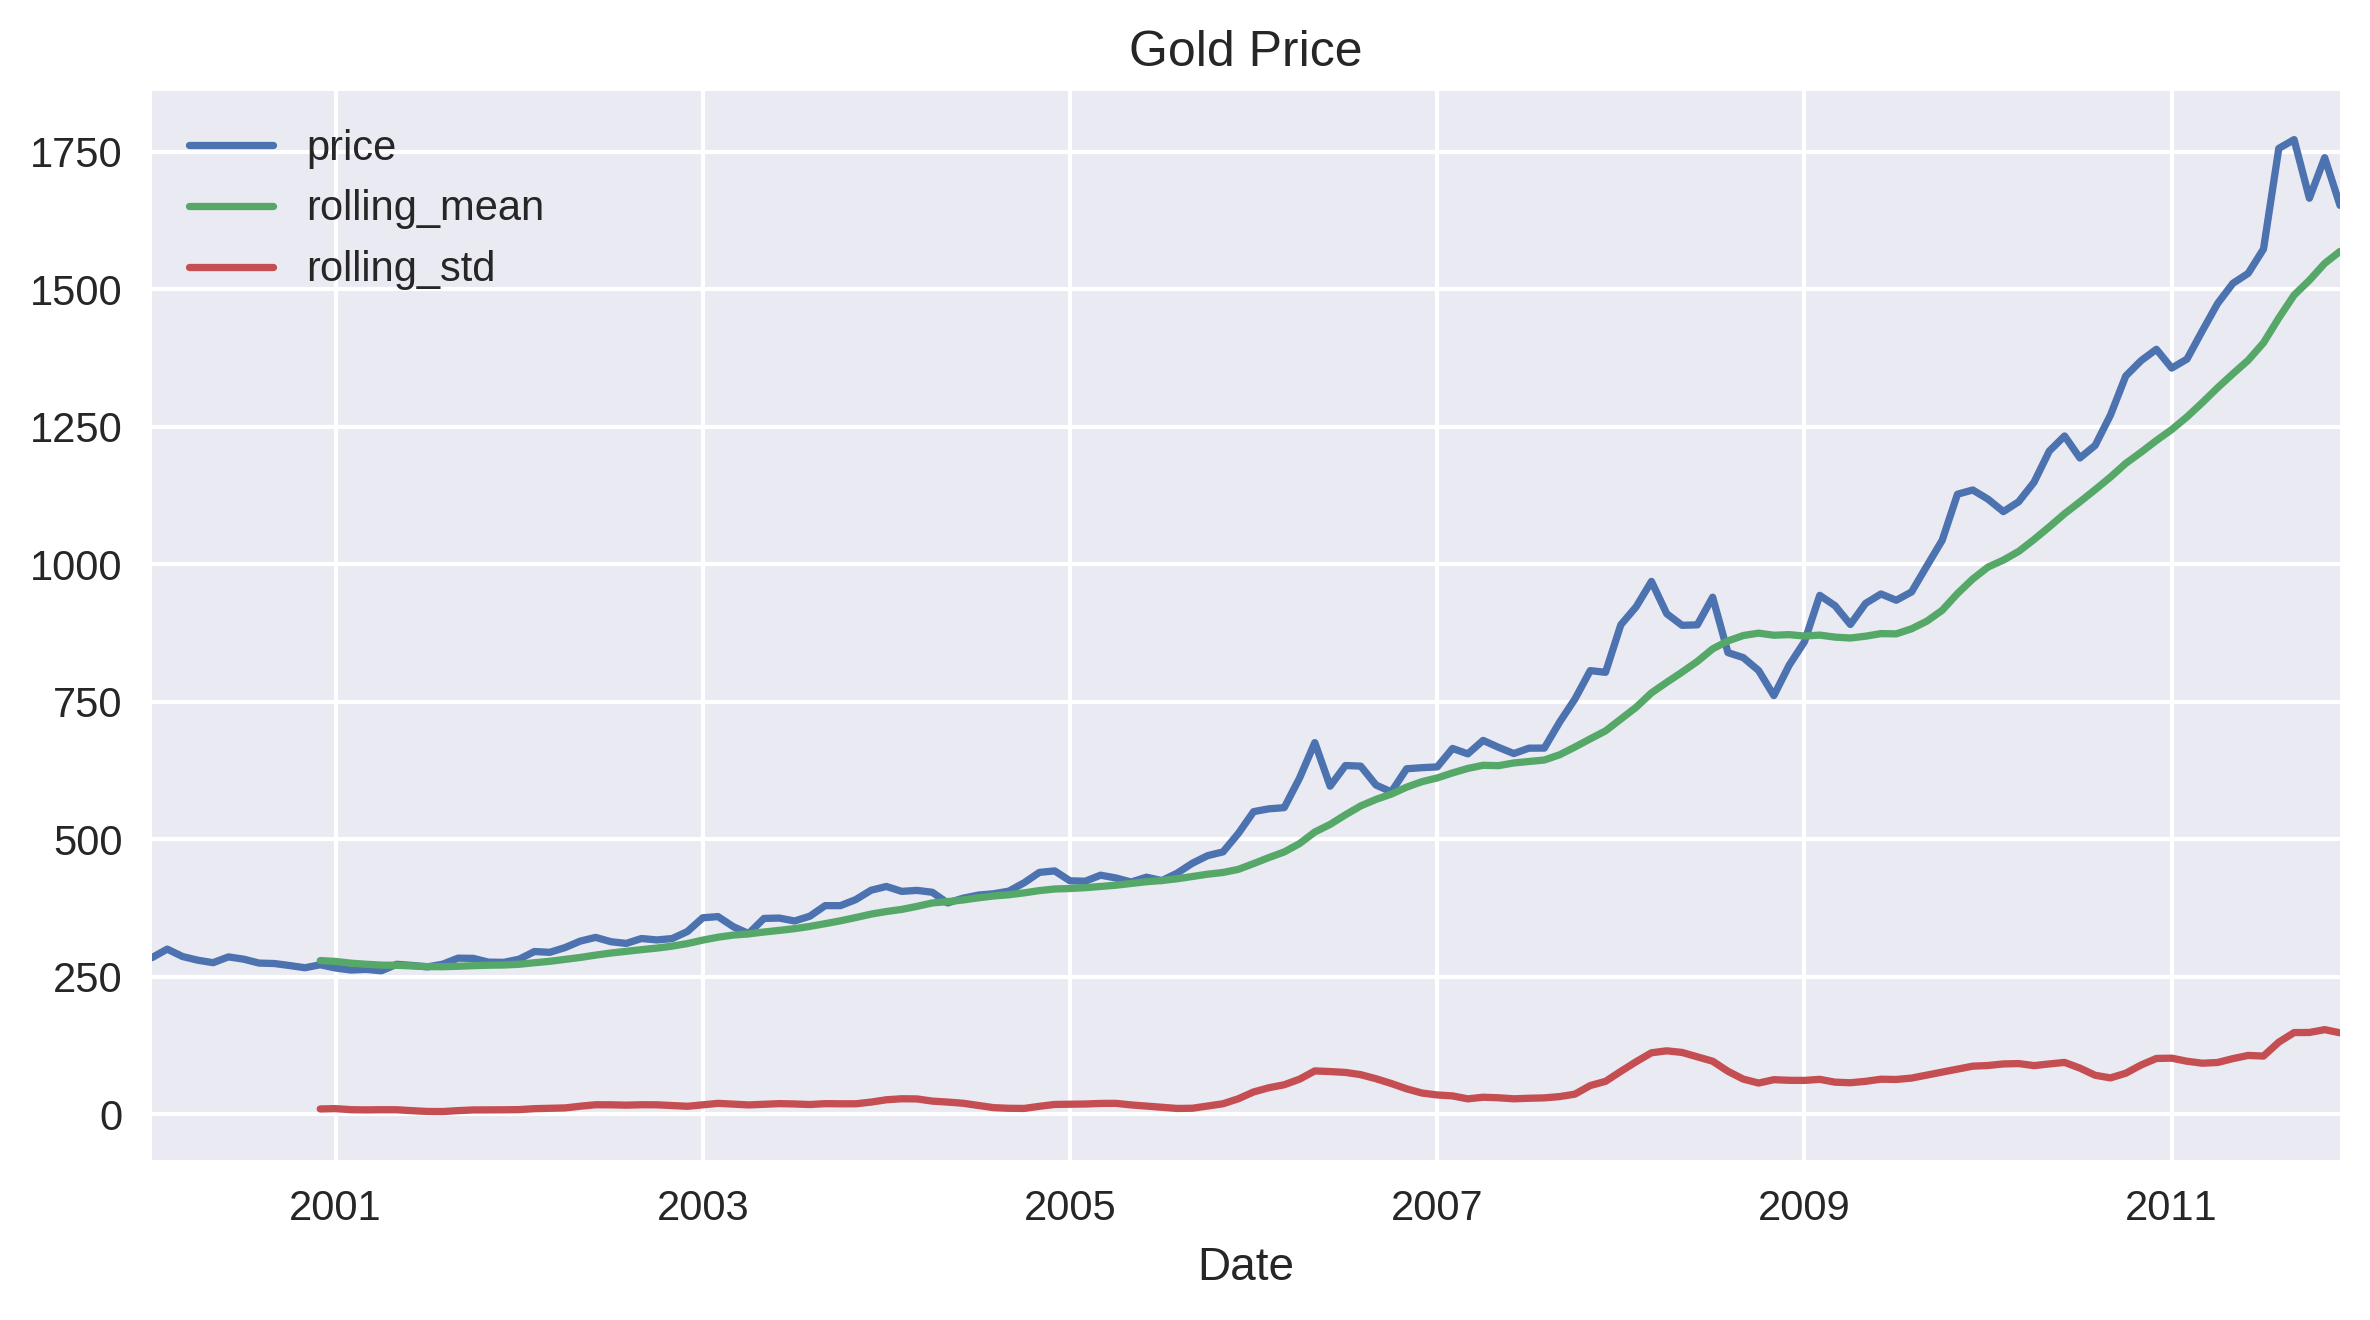

In [ ]:
# Add rolling mean and standard deviation with a window size of 12 months
WINDOW_SIZE = 12
df['rolling_mean'] = df.price.rolling(window=WINDOW_SIZE).mean()
df['rolling_std'] = df.price.rolling(window=WINDOW_SIZE).std()
df.plot(title='Gold Price')

# Automatically adjust the padding between and around the subplot
plt.tight_layout()
plt.show()

From the preceding plot, we can see that there is a non-linear growth pattern in the 12-month moving average and that the rolling standard deviation increases over time. That is why we decided to use the multiplicative model.


In [ ]:
df.head()

price  rolling_mean  rolling_std
Date                                         
2000-01-31  284.31           NaN          NaN
2000-02-29  299.86           NaN          NaN
2000-03-31  286.39           NaN          NaN
2000-04-30  279.69           NaN          NaN
2000-05-31  275.19           NaN          NaN

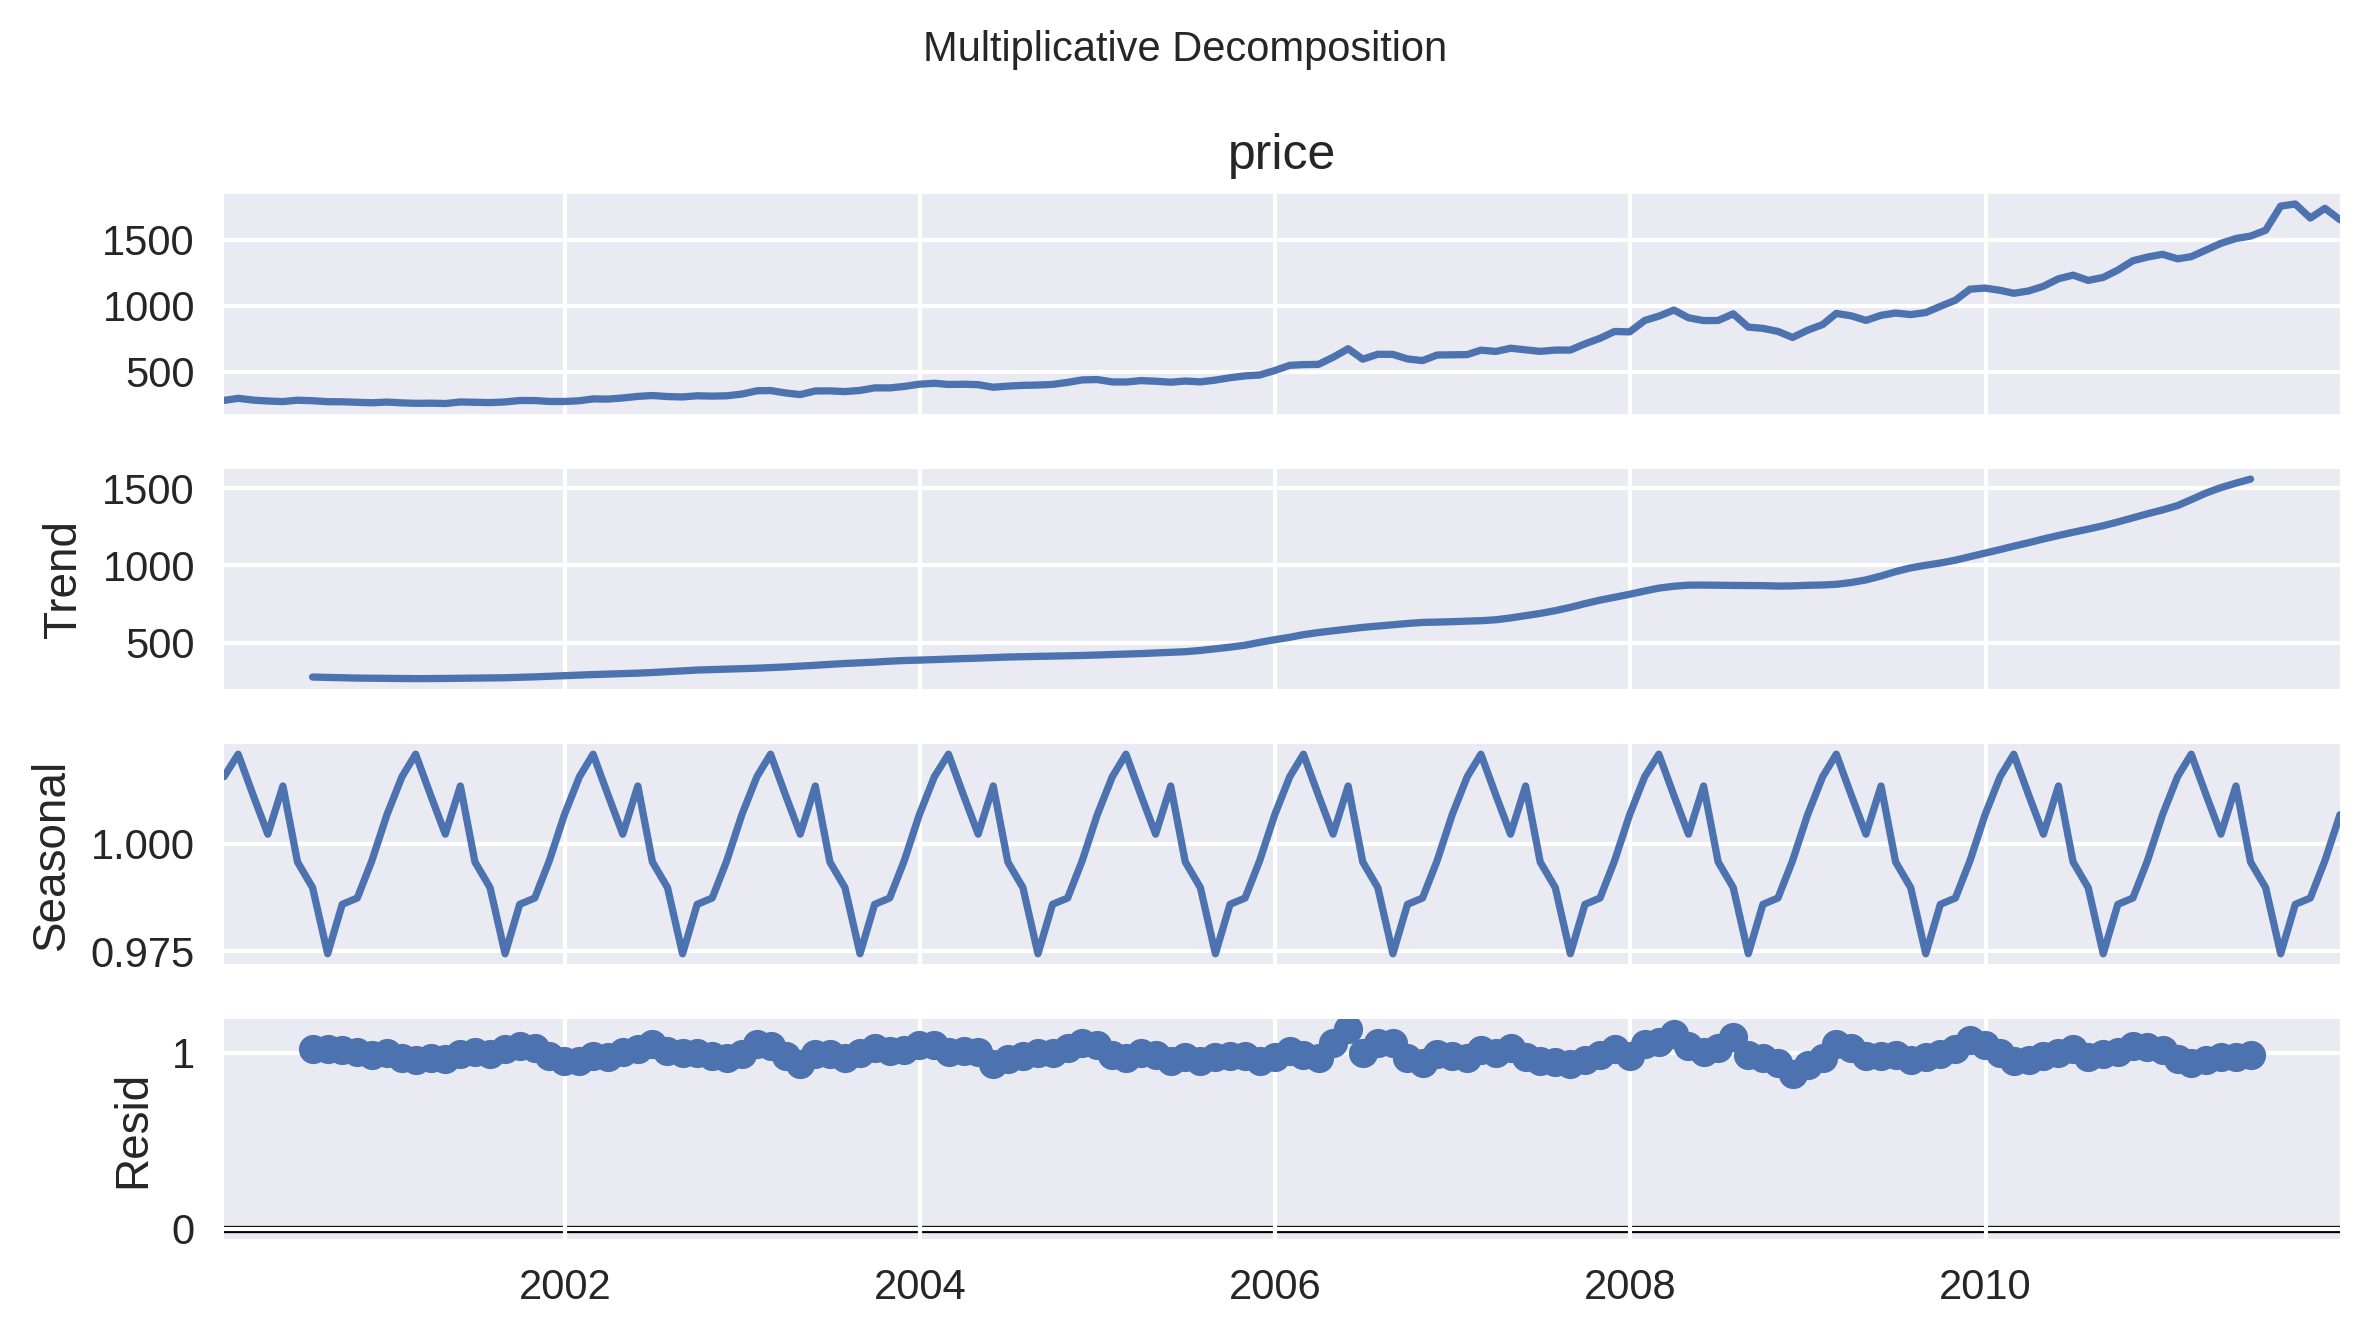

In [ ]:
# Carry out seasonal decomposition using the multiplicative model
decomposition_results = seasonal_decompose(df.price, model='multiplicative')
decomposition_results.plot().suptitle('Multiplicative Decomposition', fontsize=10)

plt.tight_layout()
plt.show()

# ```tight_layout``` automatically adjusts subplot params so that the subplot(s) fits in to the figure area.
# This is an experimental feature and may not work for some cases. It only checks the extents of ticklabels, axis labels, and titles.
# An alternative to tight_layout is constrained_layout.

In the decomposition plot, we can see the extracted component series: trend, seasonal, and random (residual). To evaluate whether the decomposition makes sense, we can look at the random component. If there is no discernible pattern (in other words, the random component is indeed random), then the fit makes sense. For example, if we would have applied the additive model, there would be an increasing pattern in the residuals over time. In this case, it looks like the variance in the residuals is slightly higher in the second half of the dataset.


Remarks:
* We used the ```seasonal_decompose``` function to carry out the classical decomposition. The possible values for the kind of model are ```"additive"``` and ```"multiplicative"```.
* When using ```seasonal_decompose``` with an array of numbers, we must specify the frequency of the observations (the ```freq``` argument) unless we are working with a ```pandas``` Series object. In case we have missing values or want to extrapolate the residual for the "warm-up" period at the beginning of the series (when there is not enough data to calculate rolling statistics), we can pass an extra argument, that is, ```extrapolate_trend='freq'```.


To better analyse the residuals, we can set limit on y-axis to plot them properly.

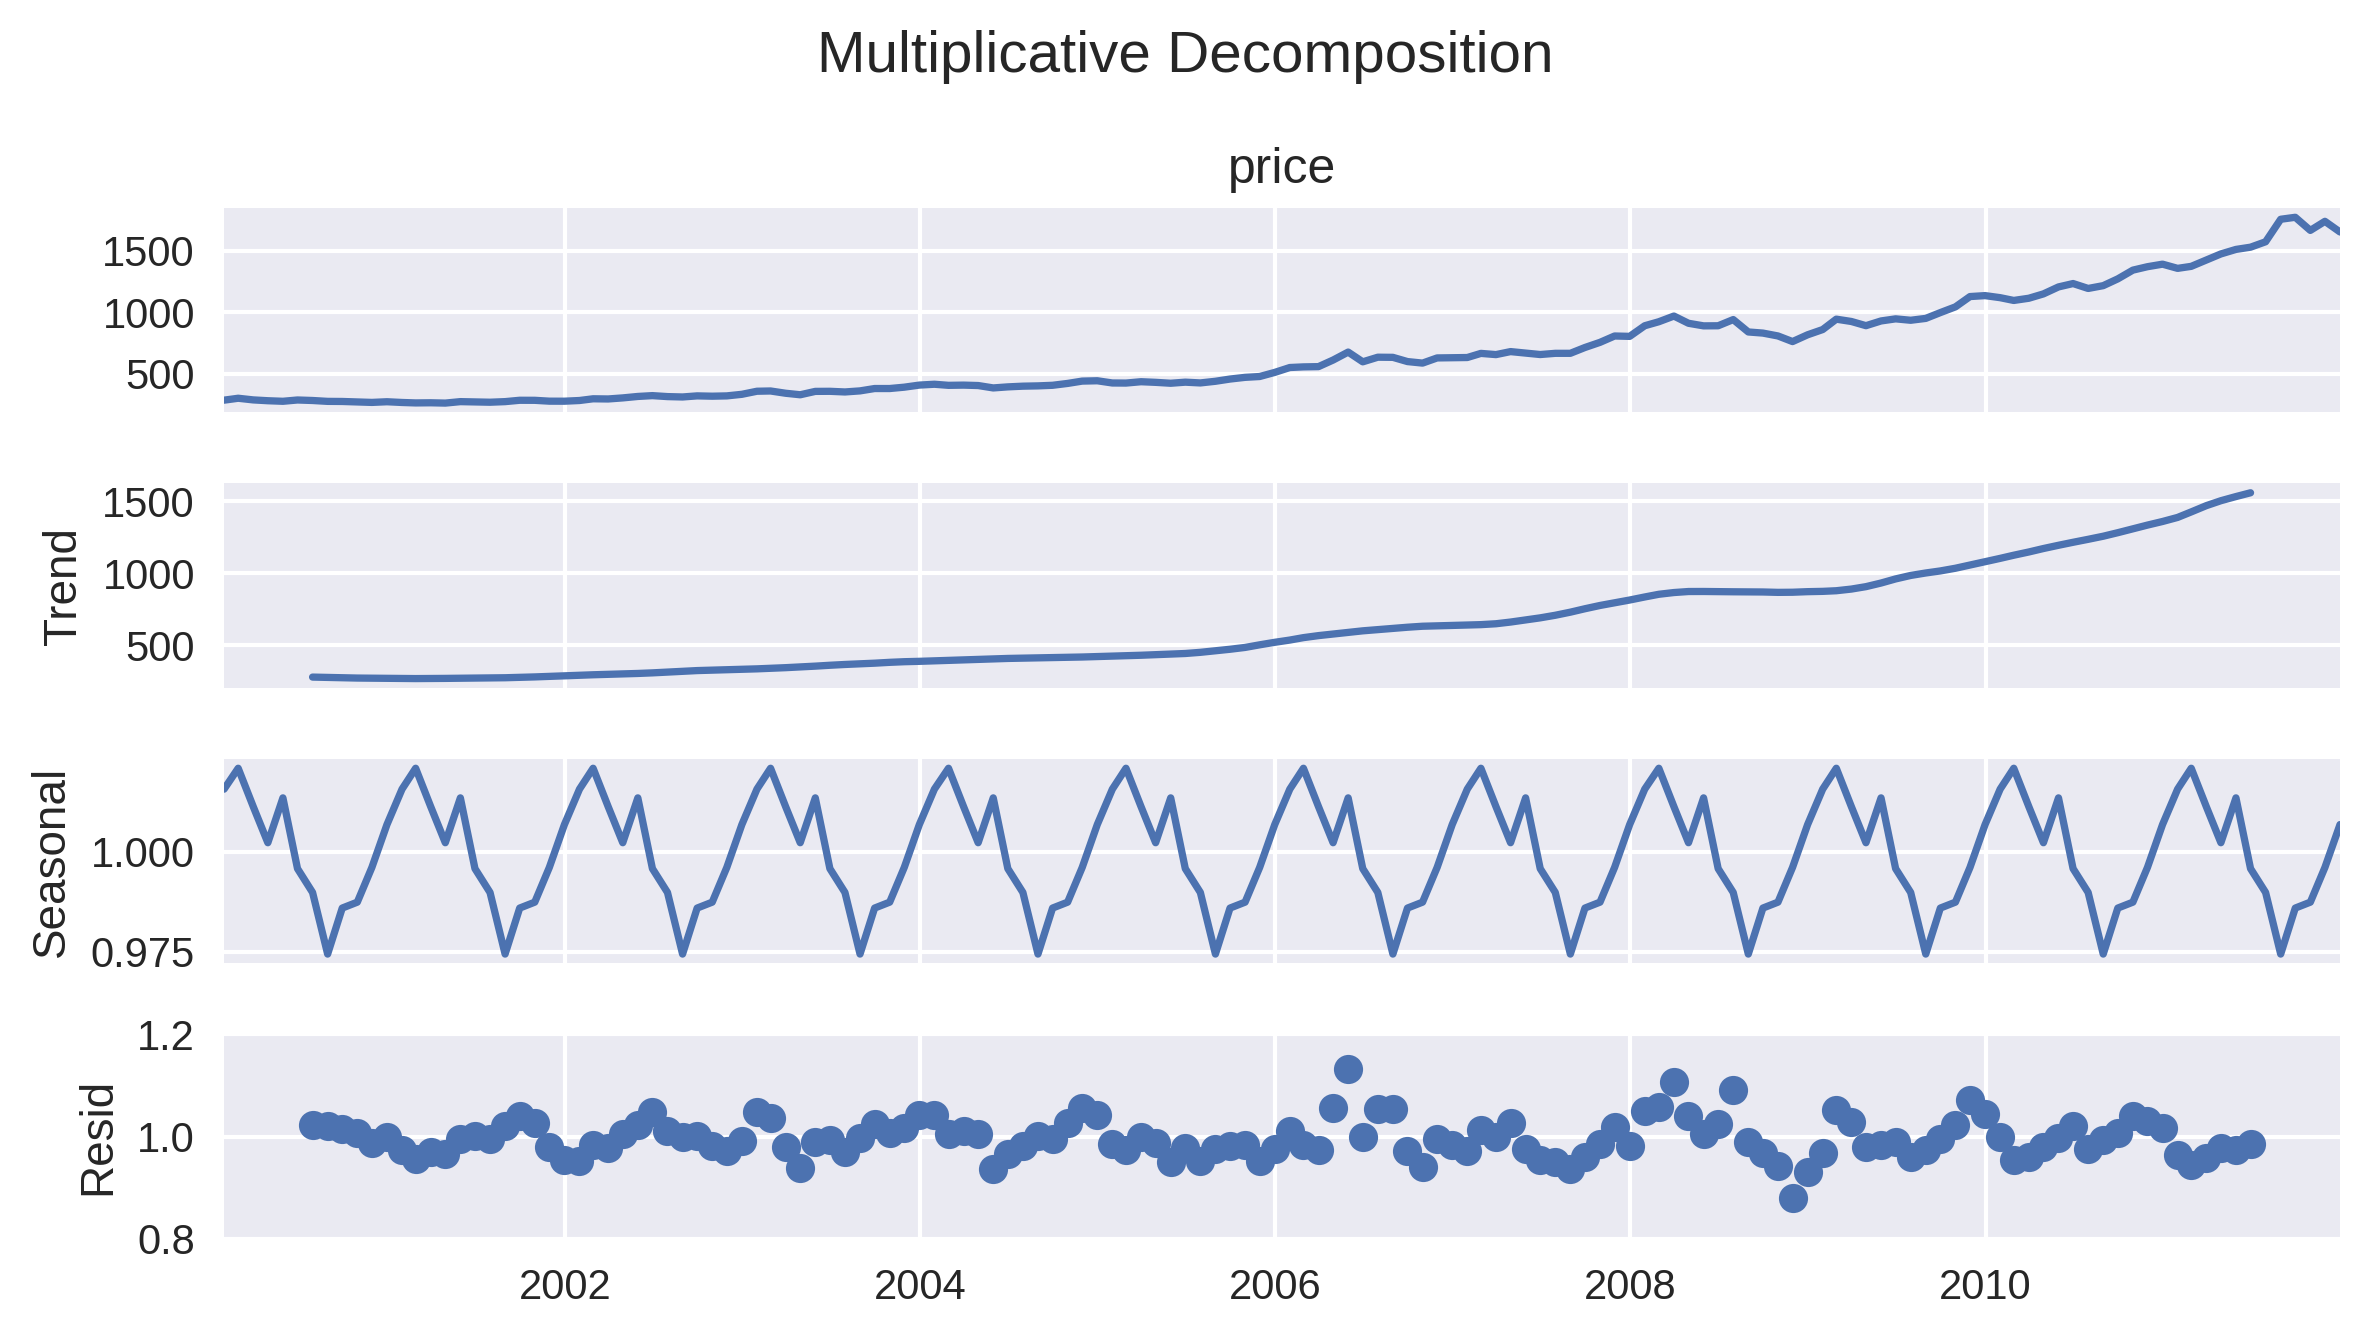

In [ ]:
decomposition_results = seasonal_decompose(df.price, model='multiplicative')
decomposition_results.plot().suptitle('Multiplicative Decomposition', fontsize=14)

# set y-axis limit for the last subplot (it will only work for the last plot)
plt.ylim((0.8,1.2))

plt.tight_layout()
plt.show()

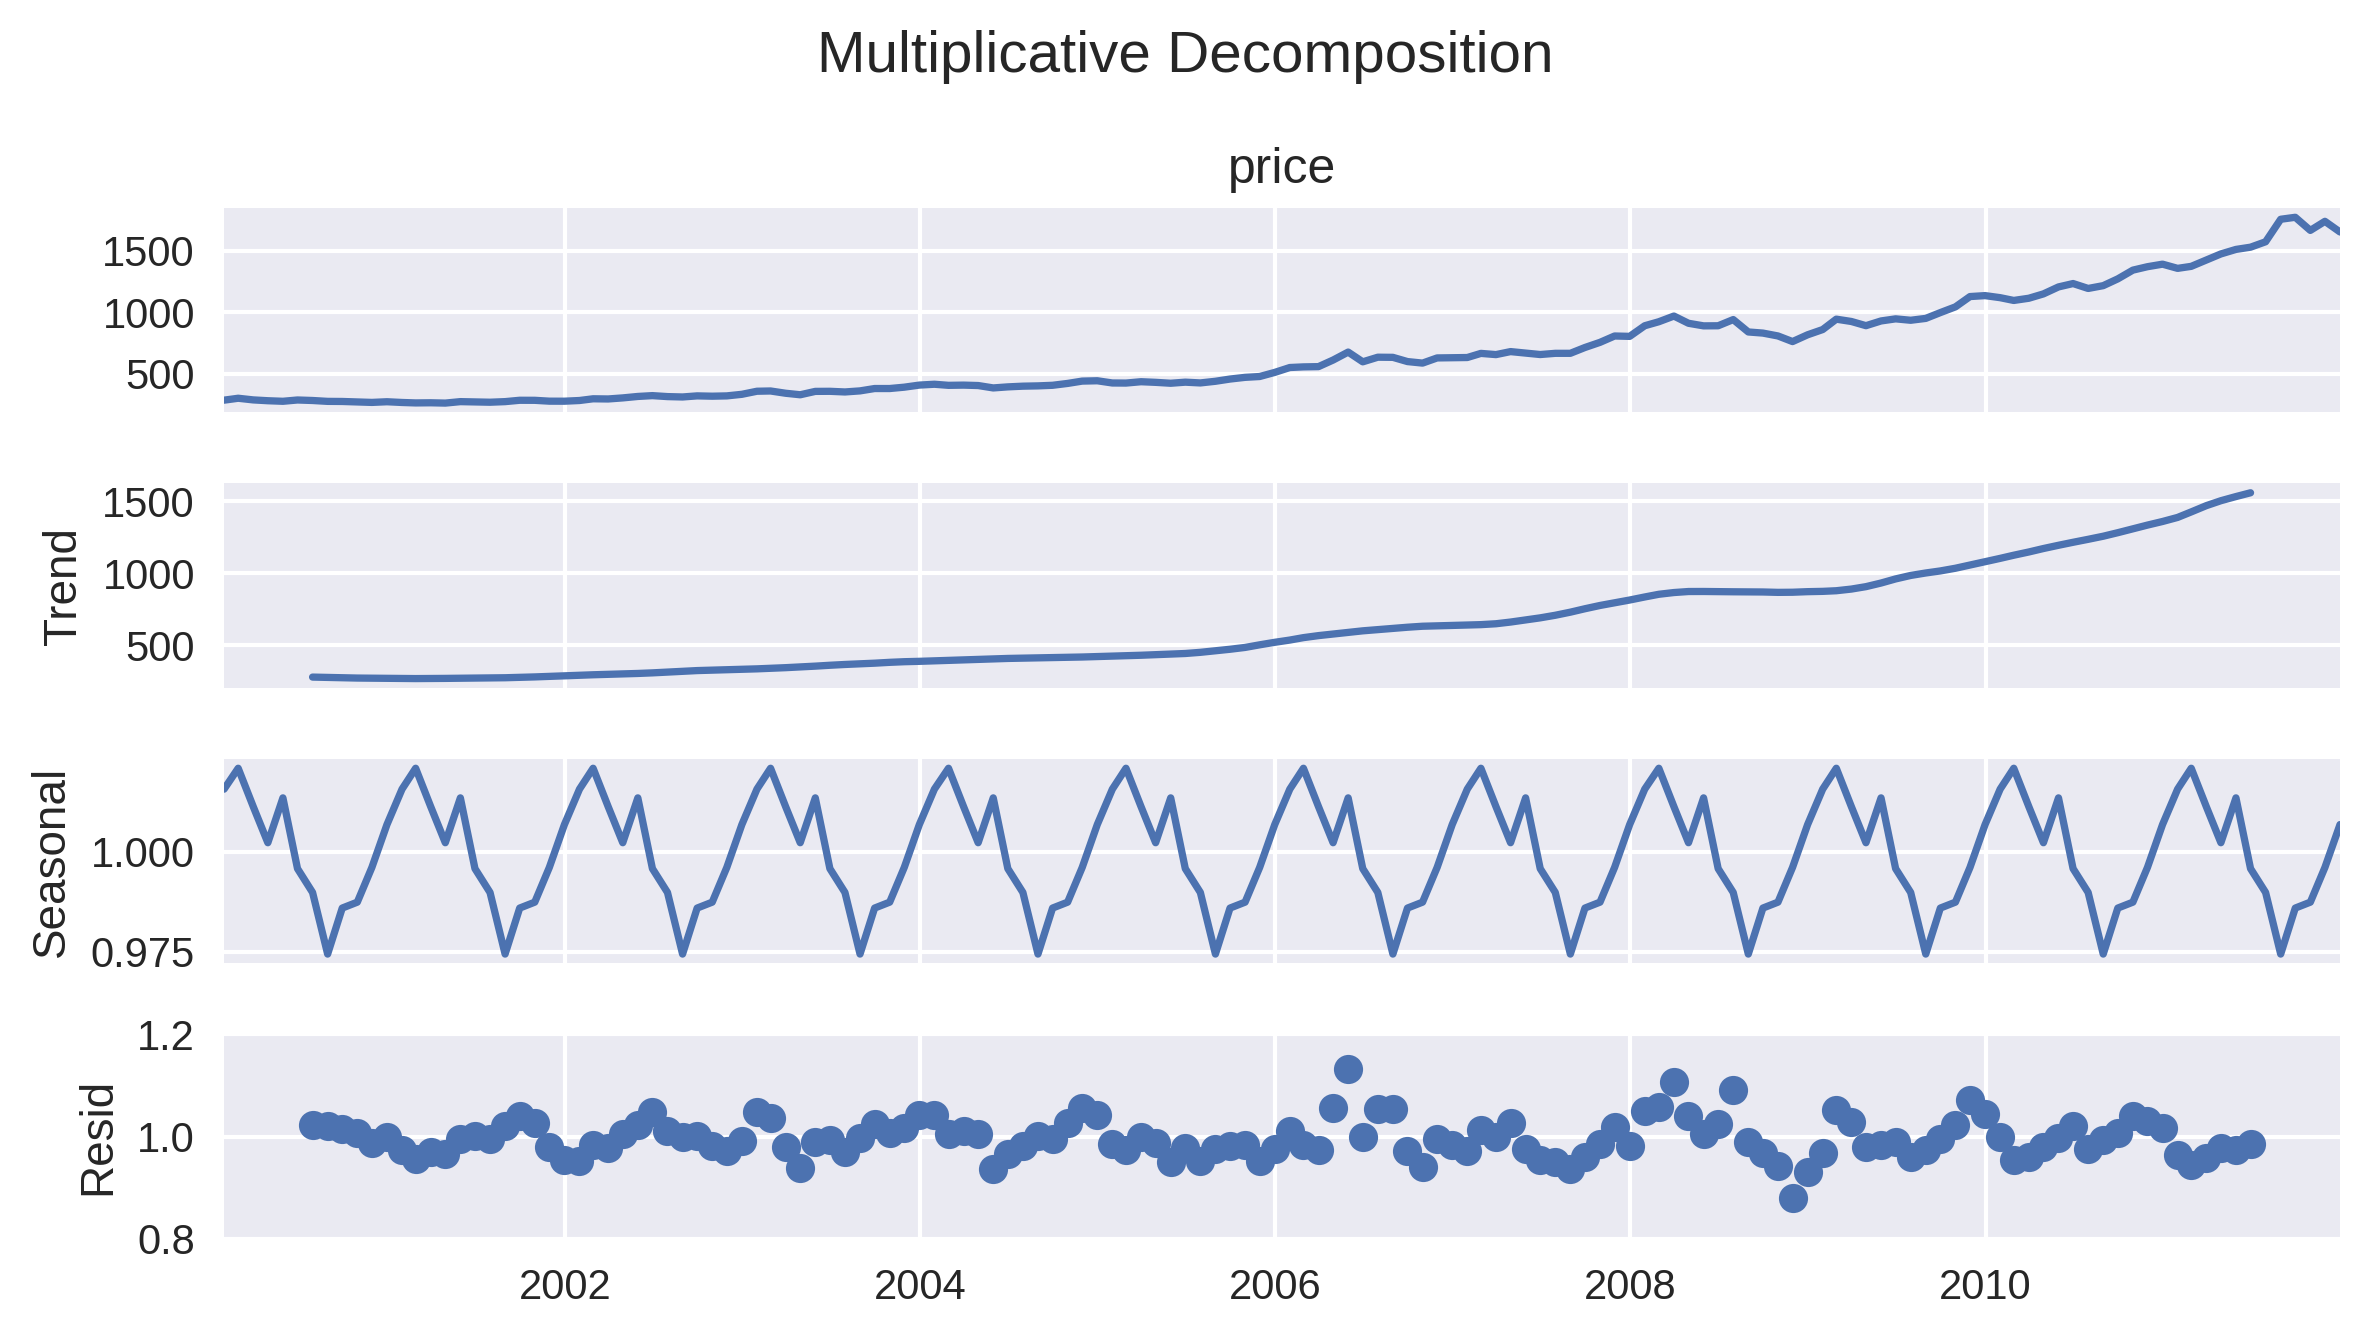

In [ ]:
a=decomposition_results.plot()
plt.suptitle('Multiplicative Decomposition', fontsize=14)

b=a.axes[3] # use 'fig.axes' to retrive the list
b.set_ylim([0.8,1.2])

plt.tight_layout()
plt.show()

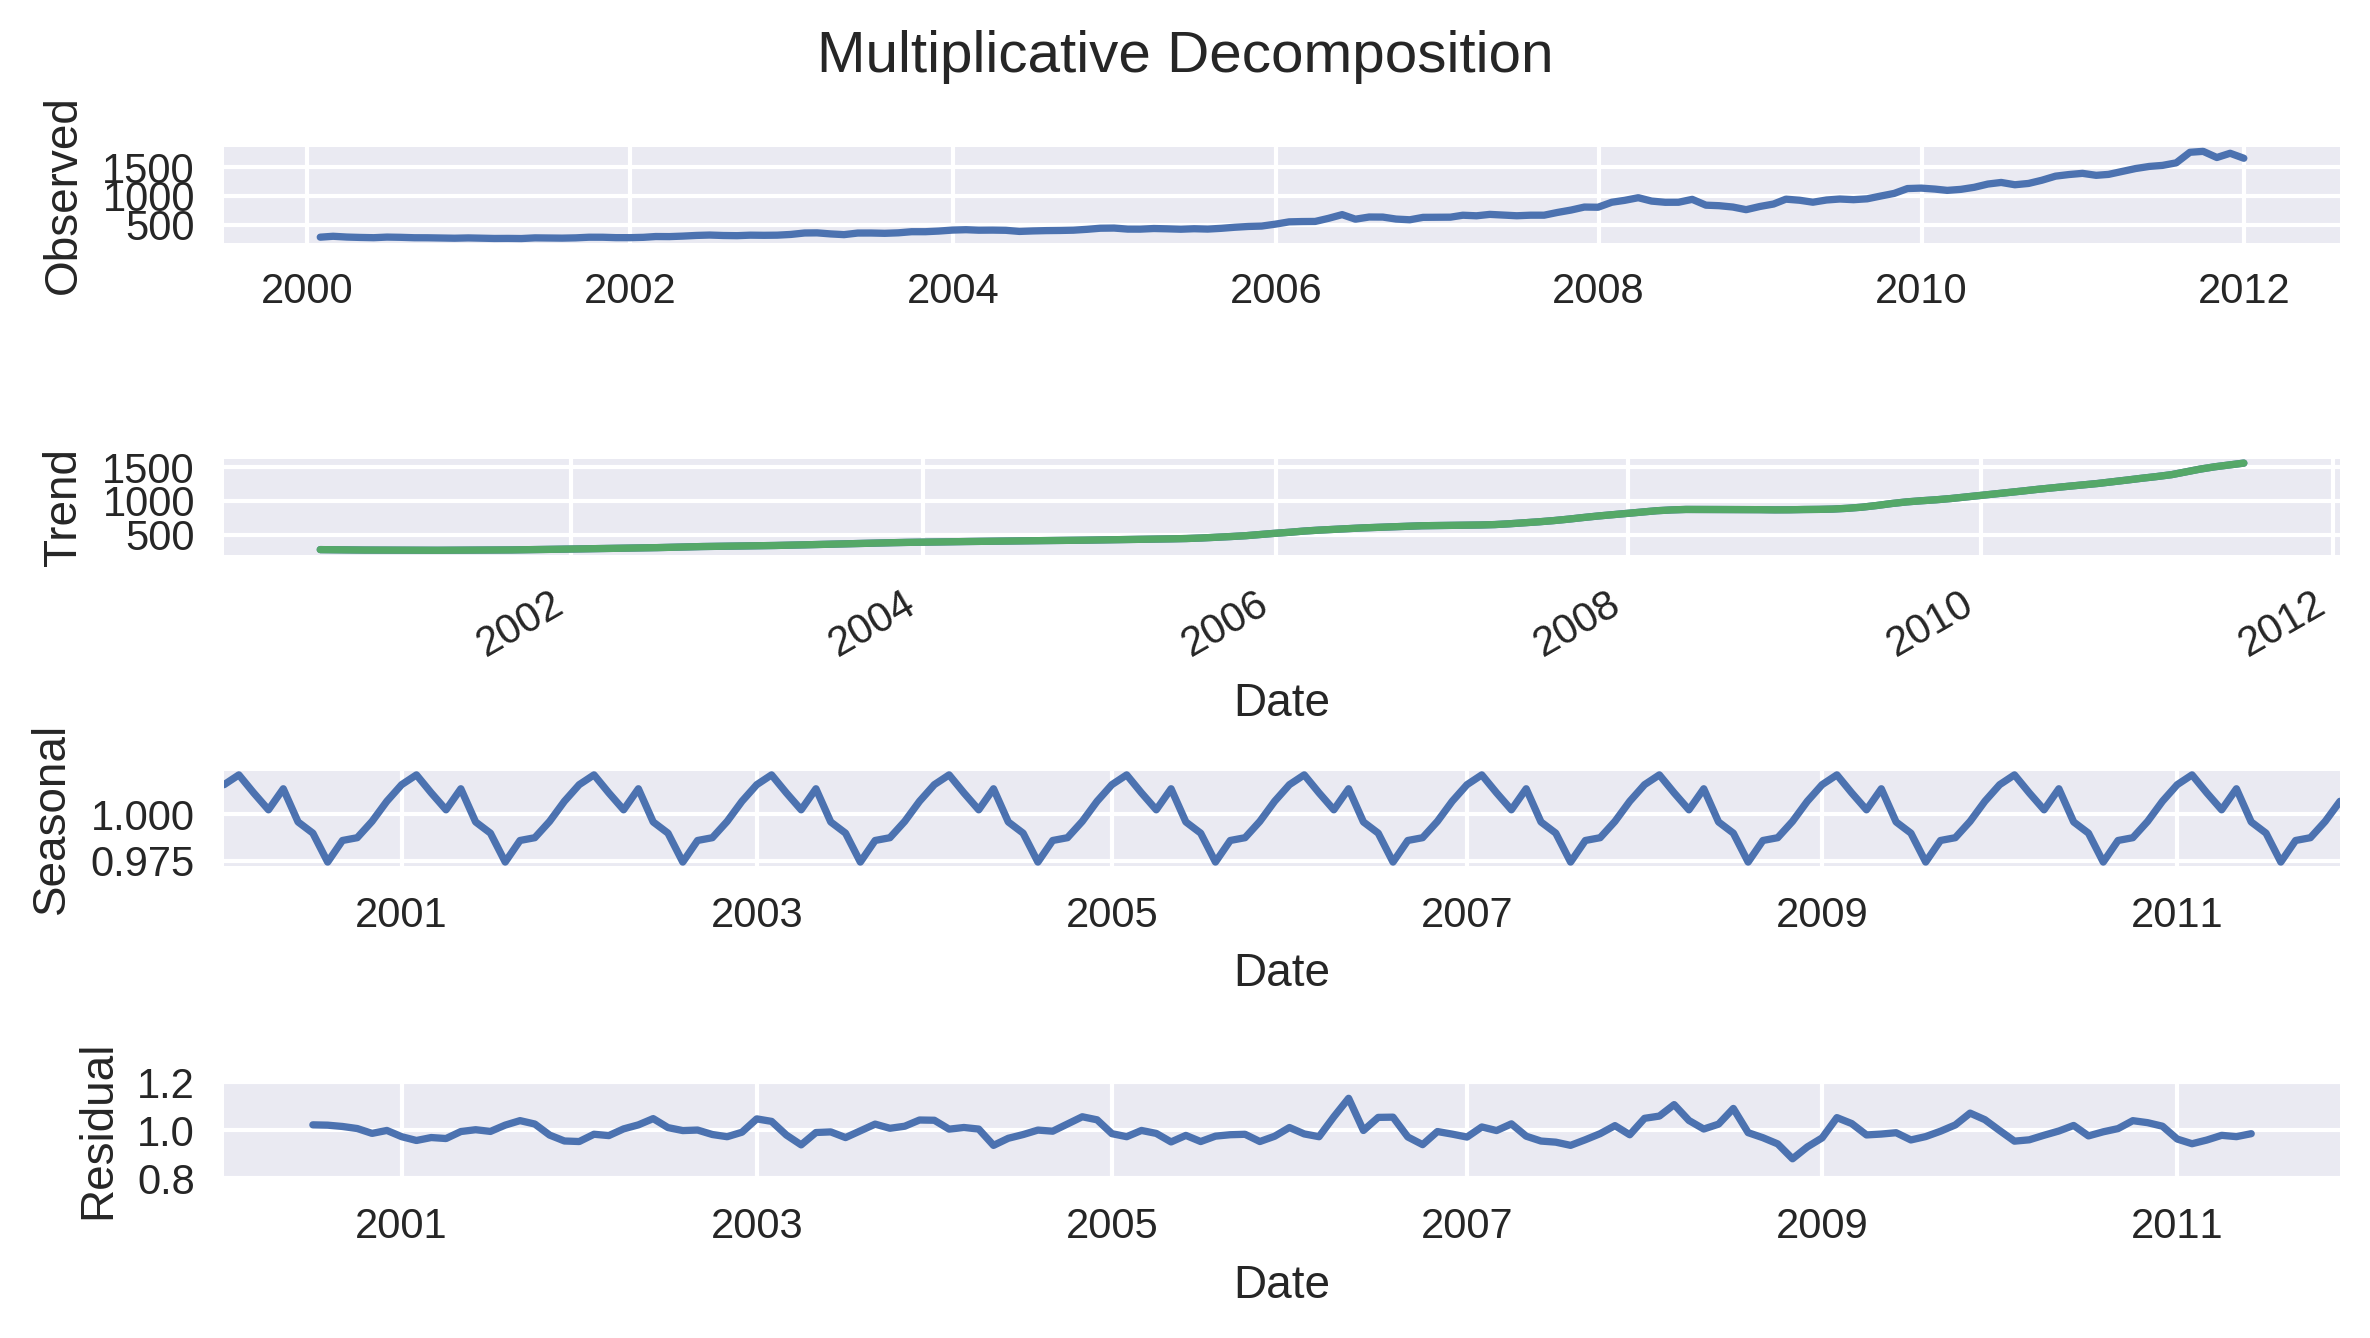

In [ ]:
# seperately plot the result
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1)
fig.suptitle('Multiplicative Decomposition', fontsize=14)
# more flexible to customize the subplots
#decomposition_results.observed.plot(ax=ax1)
ax1.plot(decomposition_results.observed)
ax1.set_ylabel('Observed')
ax2.plot(decomposition_results.trend)
decomposition_results.trend.plot(ax=ax2).set_ylabel('Trend')
decomposition_results.seasonal.plot(ax=ax3).set_ylabel('Seasonal')
decomposition_results.resid.plot(ax=ax4).set_ylabel('Residual')

# set properties on certain subplot
plt.setp(ax4, ylim=[0.8,1.2])

plt.tight_layout()
plt.show()

<Axes: xlabel='Date'>

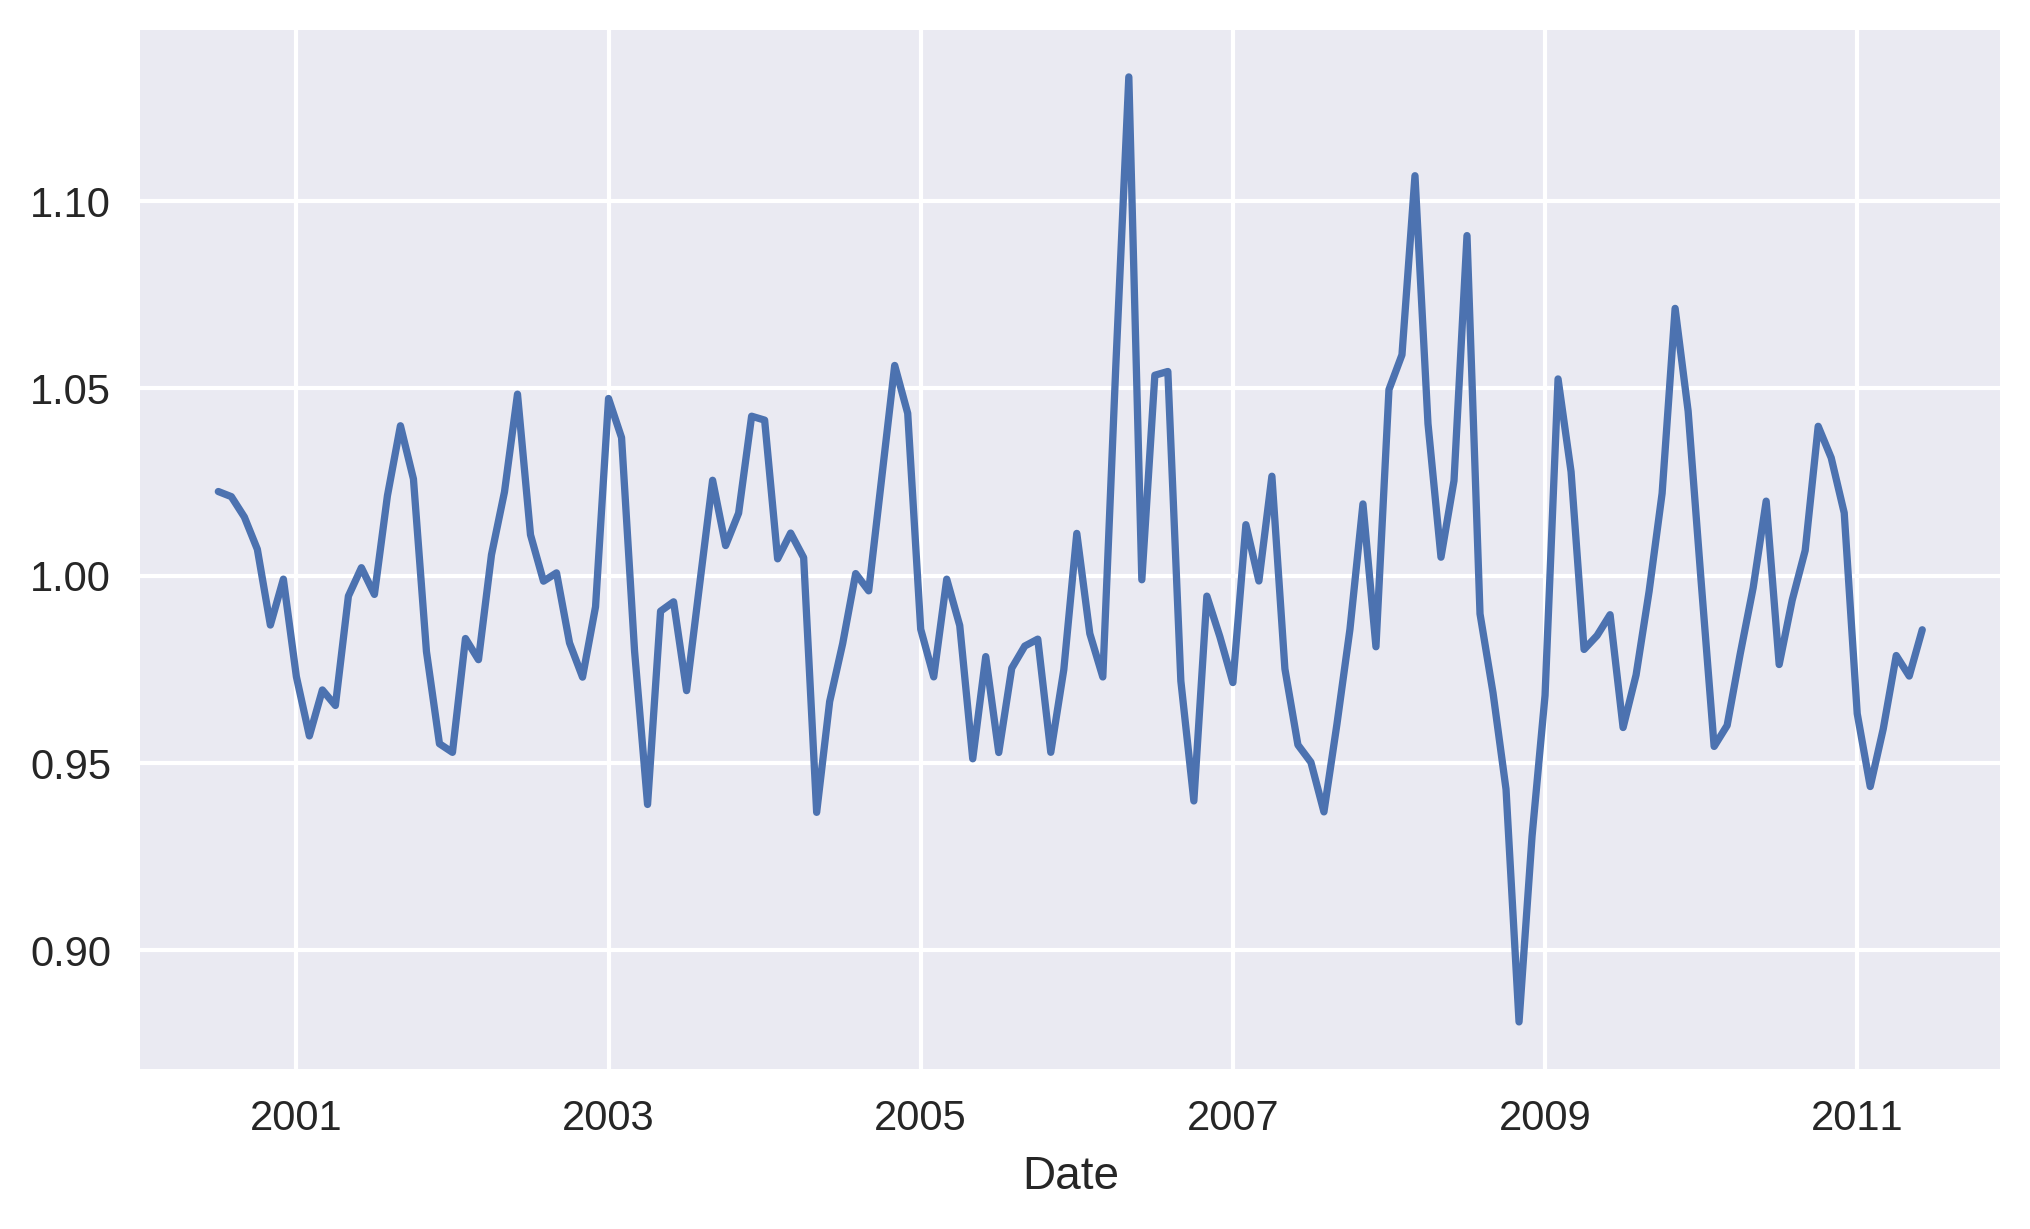

In [ ]:
# only for residual
decomposition_results.resid.plot(figsize=(8,4.5))

## 3.2 Decomposing time series using Facebook's Prophet

An alternative approach to time series decomposition is to use an additive model, in which a time series is represented as a combination of patterns on different time scales (daily, weekly, monthly, yearly, and so on) together with the overall trend.

Facebook's Prophet does exactly that, along with more advanced functionalities such as accounting for changepoints (rapid changes in behavior), holidays, and much more. A practical benefit of using this library is that we are able to forecast future values of the time series, along with a confidence interval indicating the level of uncertainty.

Remarks:

```fbprophet```

* Installation requires PyStan which requires a C++ compiler.

* If you have a C++ compiler installed on your system, you need to install ```cython``` and ```pystan``` before you install ```fbprophet``` or you may follow the instruction below.

* If you haven't installed a C++ compiler, you may directly run ```conda install -c conda-forge fbprophet``` in your anaconda prompt. (recommended)

* https://docs.conda.io/en/latest/miniconda.html!!!

In this recipe, we will try fitting Prophet's additive model to daily gold prices from 2000-2004 and predicting the prices over 2005.

In [ ]:
pip install cython;

In [ ]:
pip install pystan;

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 MB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 67.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.6 MB/s eta 0:00:00


In [ ]:
pip install wheel

In [ ]:
pip install build

In [ ]:
#!pip install pystan~=2.14
!pip install pystan
!pip install fbprophet

#https://stackoverflow.com/questions/73142498/installing-fbprophet-on-colab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 16.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 37.5 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
  Running setup.py clean for fbprophet
  Created wheel for pymeeus: filename=PyMeeus-0.5.12-py3-none-any.whl size=732001 sha256=abef9e93a5ab1b5059461f94350b48cc8a401badc122e6e6c0e0de005359a986
  Stored in directory: /root/.cache/pip/wheels/d6/67/78/aa2e8d108639dd23a5e9e72a4fc88bb44f5541894382712f48
Successfully built py

In [ ]:
pip install prophet

In [ ]:
pip install seaborn;

In [ ]:
# Import the libraries
import pandas as pd
import seaborn as sns
import quandl
from prophet import Prophet

# Authenticate with Quandl
# QUANDL_KEY = '{key}' # replace {key} with your own API key
QUANDL_KEY = '6J66VAfsNrsDn8n4xwUG'
quandl.ApiConfig.api_key = QUANDL_KEY

In [ ]:
# Download the daily gold prices
df = quandl.get(dataset='WGC/GOLD_DAILY_USD',
                start_date='2000-01-01',
                end_date='2005-12-31')

In [ ]:
# Add the old index "Date" (timestamp) as a new column and modify the DataFrame in place
df.reset_index(drop=False, inplace=True)

# See https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html

In [ ]:
df

Date   Value
0    2000-01-03  290.25
1    2000-01-04  281.50
2    2000-01-05  280.45
3    2000-01-06  279.40
4    2000-01-07  282.10
...         ...     ...
1560 2005-12-26  500.00
1561 2005-12-27  500.00
1562 2005-12-28  518.00
1563 2005-12-29  513.00
1564 2005-12-30  513.00

[1565 rows x 2 columns]

Notes:

`DataFrame.reset_index(drop=False, inplace=False)`
* `drop` *bool, default False* <br>
Do not try to insert index into dataframe columns. This resets the index to the default integer index.
* `inplace` *bool, default False* <br>
Modify the DataFrame in place (do not create a new object).

In [ ]:
# Change the column names to "ds" and "y"
df.rename(columns={'Date': 'ds', 'Value': 'y'}, inplace=True)

In [ ]:
df.head()

ds       y
0 2000-01-03  290.25
1 2000-01-04  281.50
2 2000-01-05  280.45
3 2000-01-06  279.40
4 2000-01-07  282.10

Remarks:  
* This structure (column names) is required for working with Prophet.

In [ ]:
# Use the data before 2005 as the training set
train_indices = df.ds.apply(lambda x: x.year).values < 2005

In [ ]:
train_indices[:10]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

Notes:

```lambda arguments : expression```
* A lambda function is a small anonymous function.
* Lambda functions cannot contain any statements and can only have one expression.
* Use lambda functions when an anonymous function is required for a short period of time or inside another function.

In [ ]:
# lambda function
# Example 1
x = lambda a, b : a * b
r1 = x(1, 3)
print(f'Example 1: {r1}')

# # Example 2
def myfunc(x):
  return lambda a : a * x

doubler = myfunc(2)
print(doubler)
r2 = doubler(4)
print(f'Example 2: {r2}')

Example 1: 3
<function myfunc.<locals>.<lambda> at 0x7e7daef79090>
Example 2: 8


In [ ]:
# Split the series into the training and test sets
df_train = df.loc[train_indices].dropna()

# Reset the index (start from 0)
df_test = df.loc[~train_indices].reset_index(drop=True)

In [ ]:
# Create the instance of the model with additive seasonality
model_prophet = Prophet(seasonality_mode='additive')

# Add monthly seasonality
model_prophet.add_seasonality(name='monthly', period=30.5, fourier_order=5)

# Fit the model to the data
model_prophet.fit(df_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr9z9asj2/9k68526_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr9z9asj2/godjg6_3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57105', 'data', 'file=/tmp/tmpr9z9asj2/9k68526_.json', 'init=/tmp/tmpr9z9asj2/godjg6_3.json', 'output', 'file=/tmp/tmpr9z9asj2/prophet_model2gsywd85/prophet_model-20240221110332.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:03:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:03:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


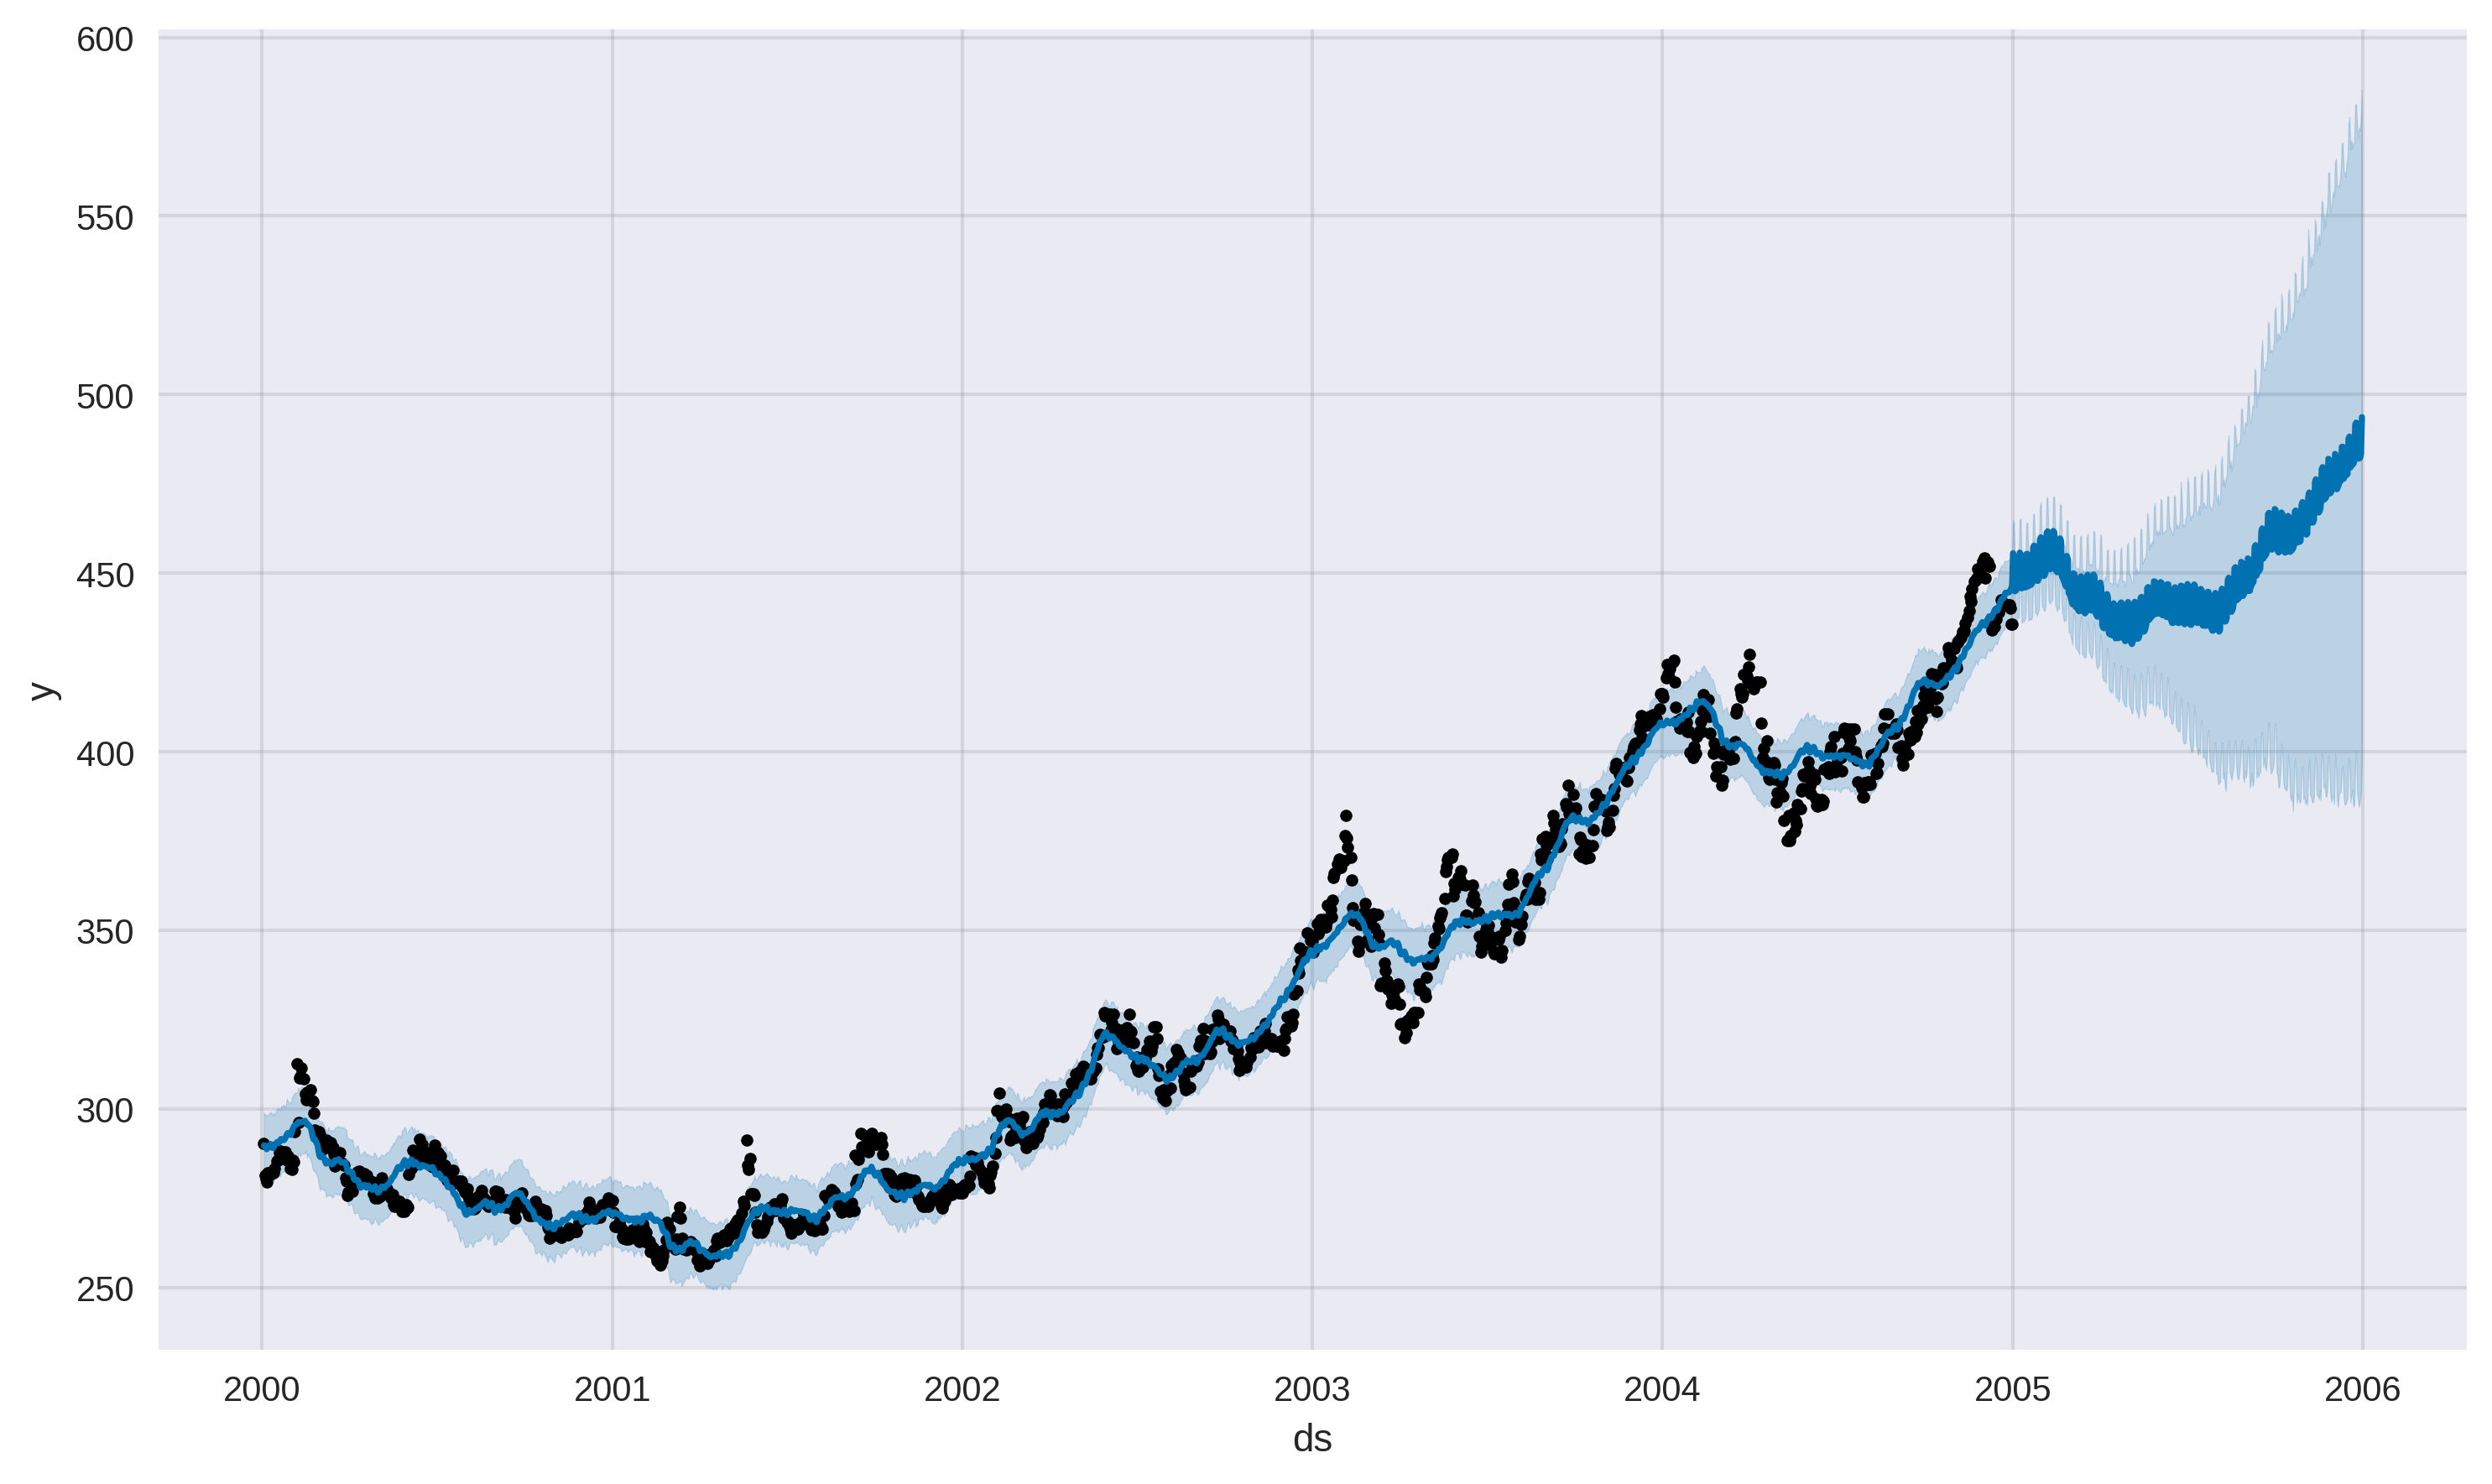

In [ ]:
# Forecast the gold prices 1 year ahead and plot the results

# Create a future_dataframe
df_future = model_prophet.make_future_dataframe(periods=365)

# Make predictions using of the fitted model
df_pred = model_prophet.predict(df_future)

# Plot the results
model_prophet.plot(df_pred)

plt.tight_layout() # automatically adjust subplot parameters to give specified padding
plt.show()

The black dots are the actual observations of the gold price.

The blue line representing the fit does not match the observations exactly, as the model smooths out the noise in the data (also reducing the chance of overfitting).

An important feature is that Prophet quantifies uncertainty, which is represented by the blue intervals around the fitted line.

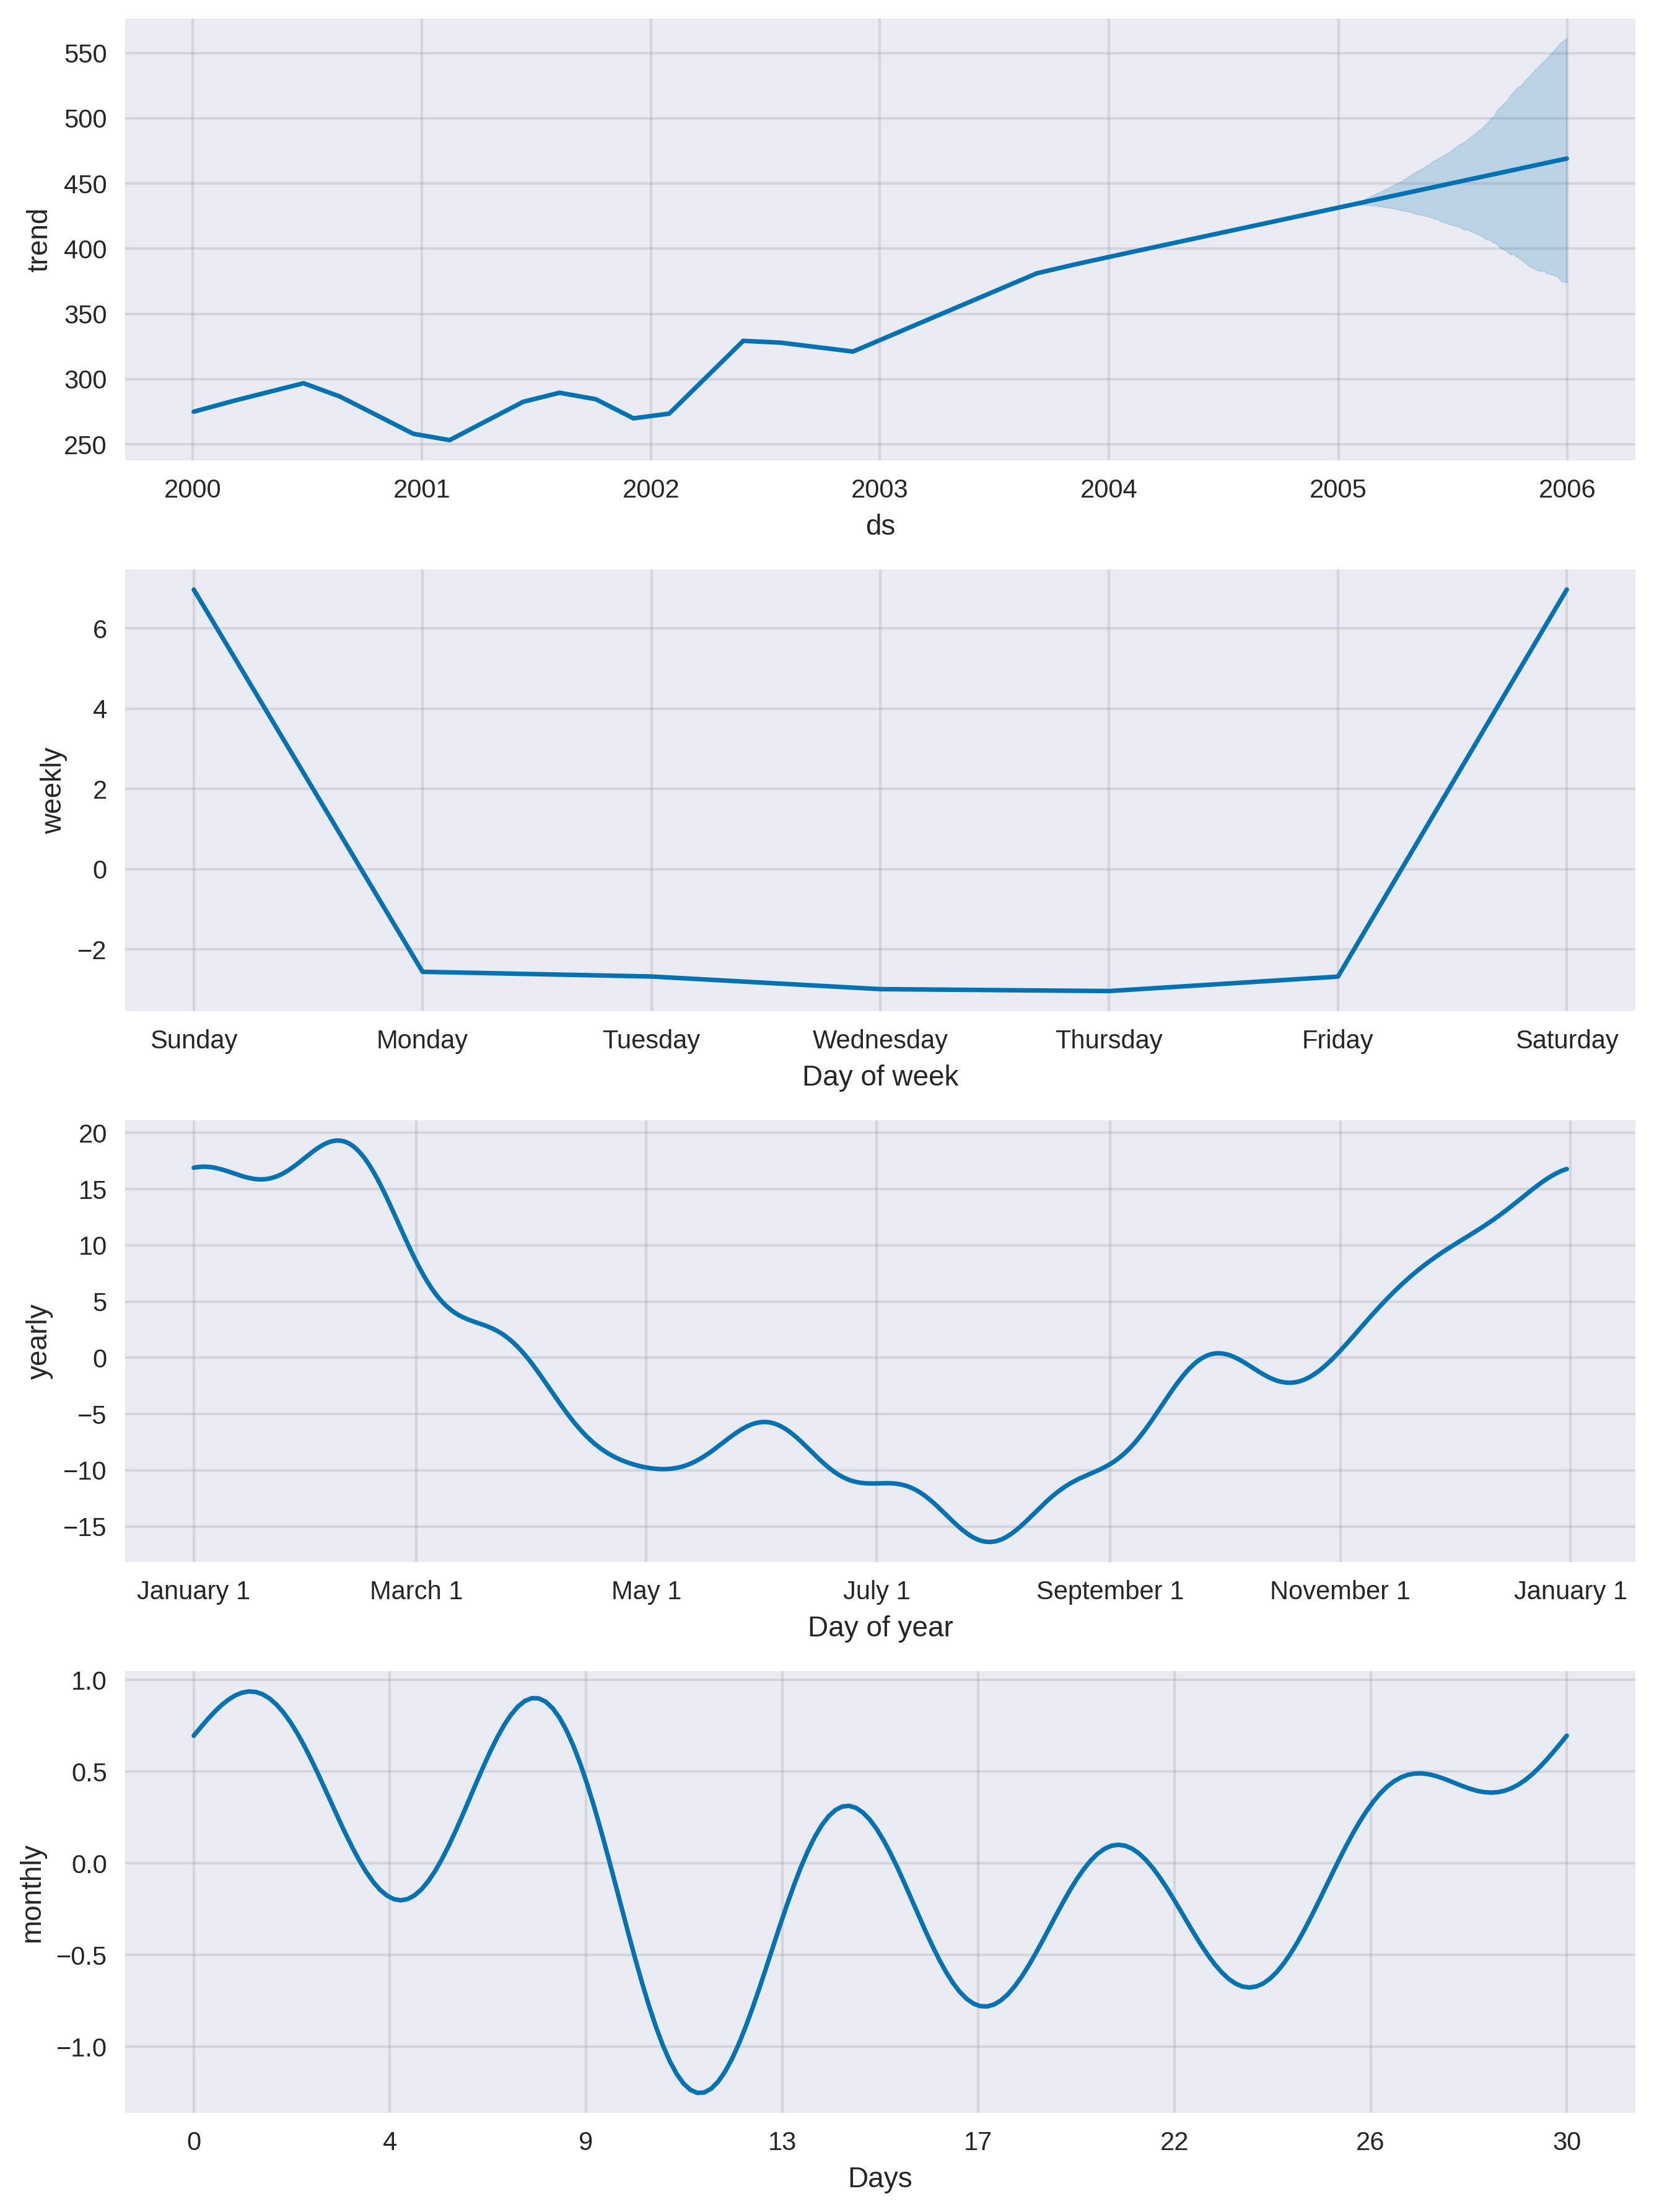

In [ ]:
# Inspect the decomposition of the time series
model_prophet.plot_components(df_pred)

plt.tight_layout() # automatically adjust subplot parameters to give specified padding
plt.show()

Upon closer inspection, we can see that the overall trend is increasing and that the gold price seems to be higher during the beginning and the end of the year, with a dip in the summer.

On the monthly level, there is some movement, but the scale is much smaller than in the case of the yearly pattern.

There is not a lot of movement in the weekly chart (we do not look at weekends as there are no prices for weekends), which makes sense because, with a decrease in the time scale, the noise starts to wash out the signal. For this reason, we might disable the weekly level altogether.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr9z9asj2/64jdbxfv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr9z9asj2/g1xpkpgy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25484', 'data', 'file=/tmp/tmpr9z9asj2/64jdbxfv.json', 'init=/tmp/tmpr9z9asj2/g1xpkpgy.json', 'output', 'file=/tmp/tmpr9z9asj2/prophet_model71fxypkz/prophet_model-20240221110341.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:03:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:03:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


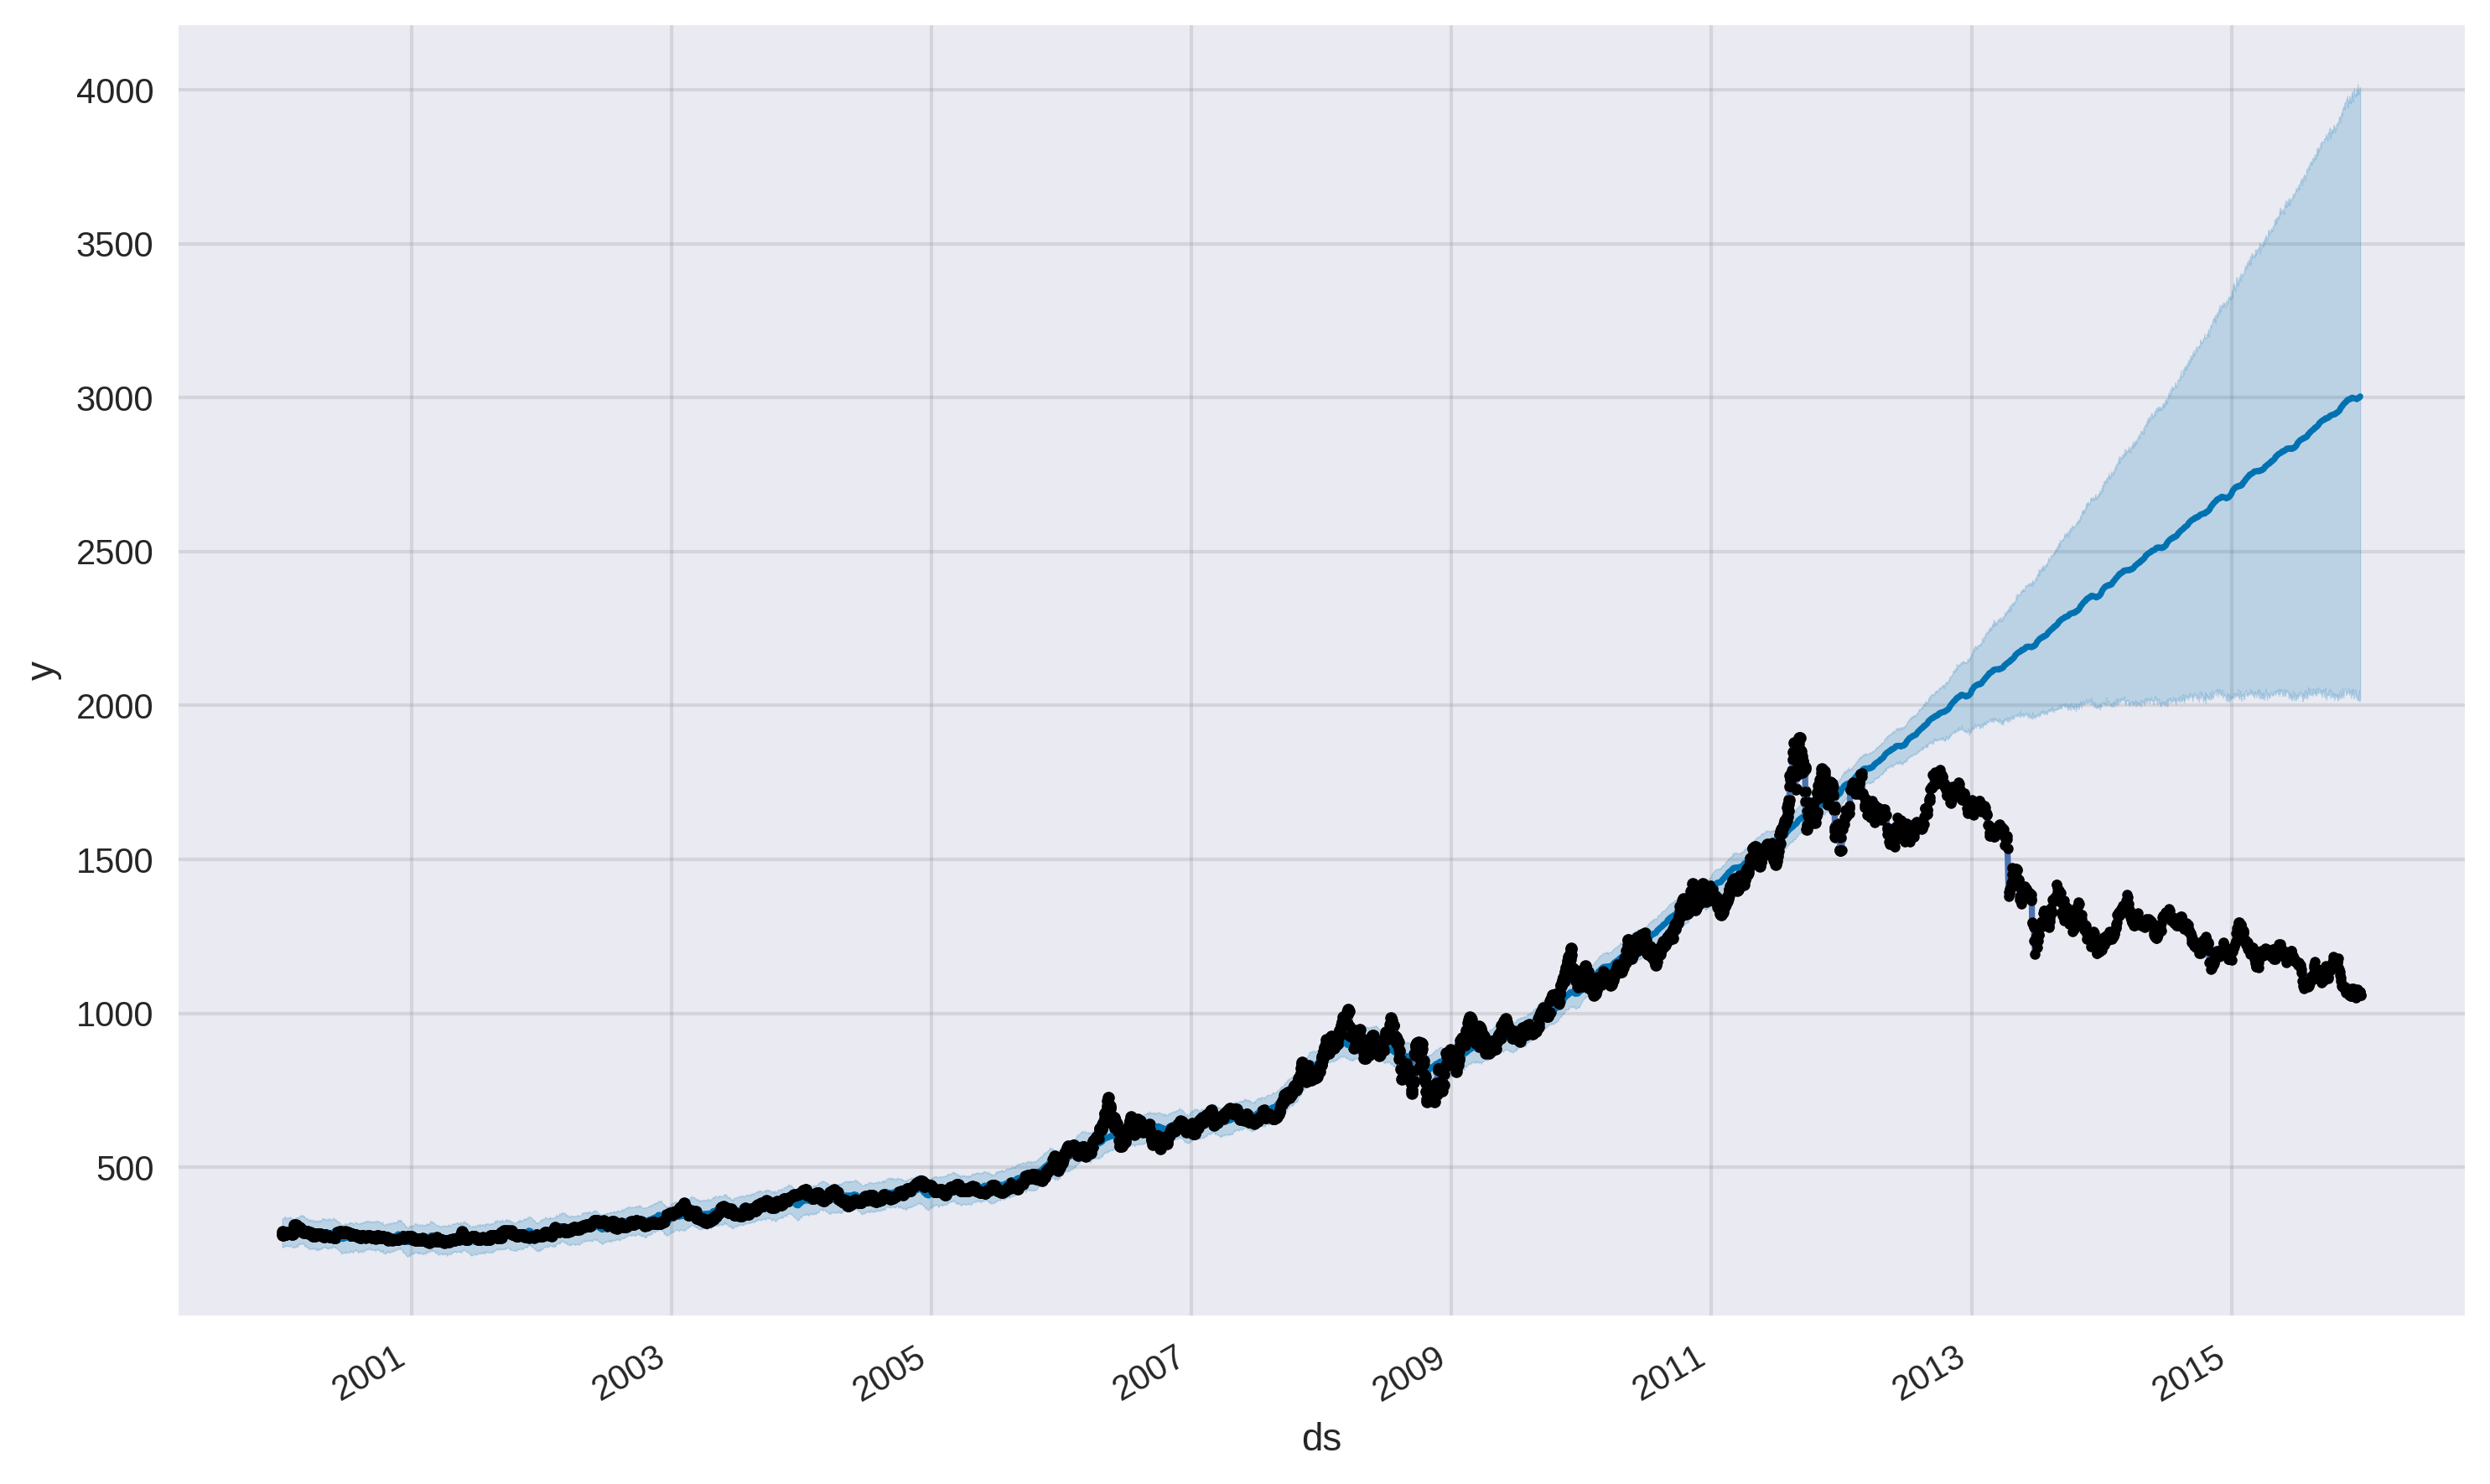

In [ ]:
ex_df = quandl.get(dataset='WGC/GOLD_DAILY_USD',
                start_date='2000-01-01',
                end_date='2015-12-31')
ex_df.reset_index(drop=False, inplace=True)
ex_df.rename(columns={'Date': 'ds', 'Value': 'y'}, inplace=True)
ex_train_indices = ex_df.ds.apply(lambda x: x.year).values < 2012
ex_df_train = ex_df.loc[ex_train_indices].dropna()
ex_df_test = ex_df.loc[~ex_train_indices].reset_index(drop=True)
ex_model_prophet = Prophet(seasonality_mode='additive')
ex_model_prophet.add_seasonality(name='monthly', period=30.5, fourier_order=5)
ex_model_prophet.fit(ex_df_train)
ex_df_future = ex_model_prophet.make_future_dataframe(periods=365*4)
ex_df_pred = ex_model_prophet.predict(ex_df_future)
ex_model_prophet.plot(ex_df_pred)
ddf=ex_df.set_index('ds', inplace=False)
ddf.y.plot()
plt.plot(ddf.index, ddf.y, 'o', color='black',markersize=3)

plt.tight_layout()
plt.show()

Remarks:
* Prophet was designed for analyzing time series with daily observations (which does not mean that there are no ways to use weekly or monthly data) that exhibit patterns on different time scales (weekly, monthly, yearly, and so on).

Summary:
1. We downloaded daily gold prices from Quandl and created a ```pandas``` DataFrame with two columns: ```ds```, indicating the timestamp, and ```y```, which is the target variable.
2. We split the DataFrame into training (years 2000-2004) and test (the year 2005) sets by slicing over time.
3. We instantiated the model with additive seasonality. Additionally, we added the monthly seasonality by using the ```add_seasonality``` method with values suggested by Prophet's documentation. To fit the model, we used the ```fit``` method, which is known from the popular ```scikit-learn``` library.
4. We used the fitted model for predictions. To create forecasts with Prophet, we had to create a ```future_dataframe``` by using the ```make_future_dataframe``` method and indicating how many periods we wanted to obtain (by default, this is measured in days). We created the predictions using the ```predict``` method of the fitted model.
5. We inspected the components of the model (the decomposition). To do so, we used the ```plot_components``` method with the prediction DataFrame as the argument.

## There's more...

In [ ]:
# Basic performance evaluation of the fitted model

# Merge the test set with the forecasts

# Select the relevant columns
selected_columns = ['ds', 'yhat_lower', 'yhat_upper', 'yhat']

# Reset the index starting from 0 and select the relevant columns
df_pred = df_pred.loc[:, selected_columns].reset_index(drop=True)

# Merge the test set with the prediction set with the join key 'ds'
df_test = df_test.merge(df_pred, on=['ds'], how='left')

Remarks:

* We merged the test set with the prediction `DataFrame`. We used a left join, which returns all the rows from the left table (test set) and the matched rows from the right table (prediction `DataFrame`) while leaving the unmatched rows empty.

* This way, we also kept only the dates that were in the test set (*Prophet* created predictions for the next 365 days, including weekends and potential holidays).

In [ ]:
# Convert 'ds' to datetime
df_test.ds = pd.to_datetime(df_test.ds)
# Set the DataFrame index using existing columns 'ds' and modify the DataFrame in place
df_test.set_index('ds', inplace=True)

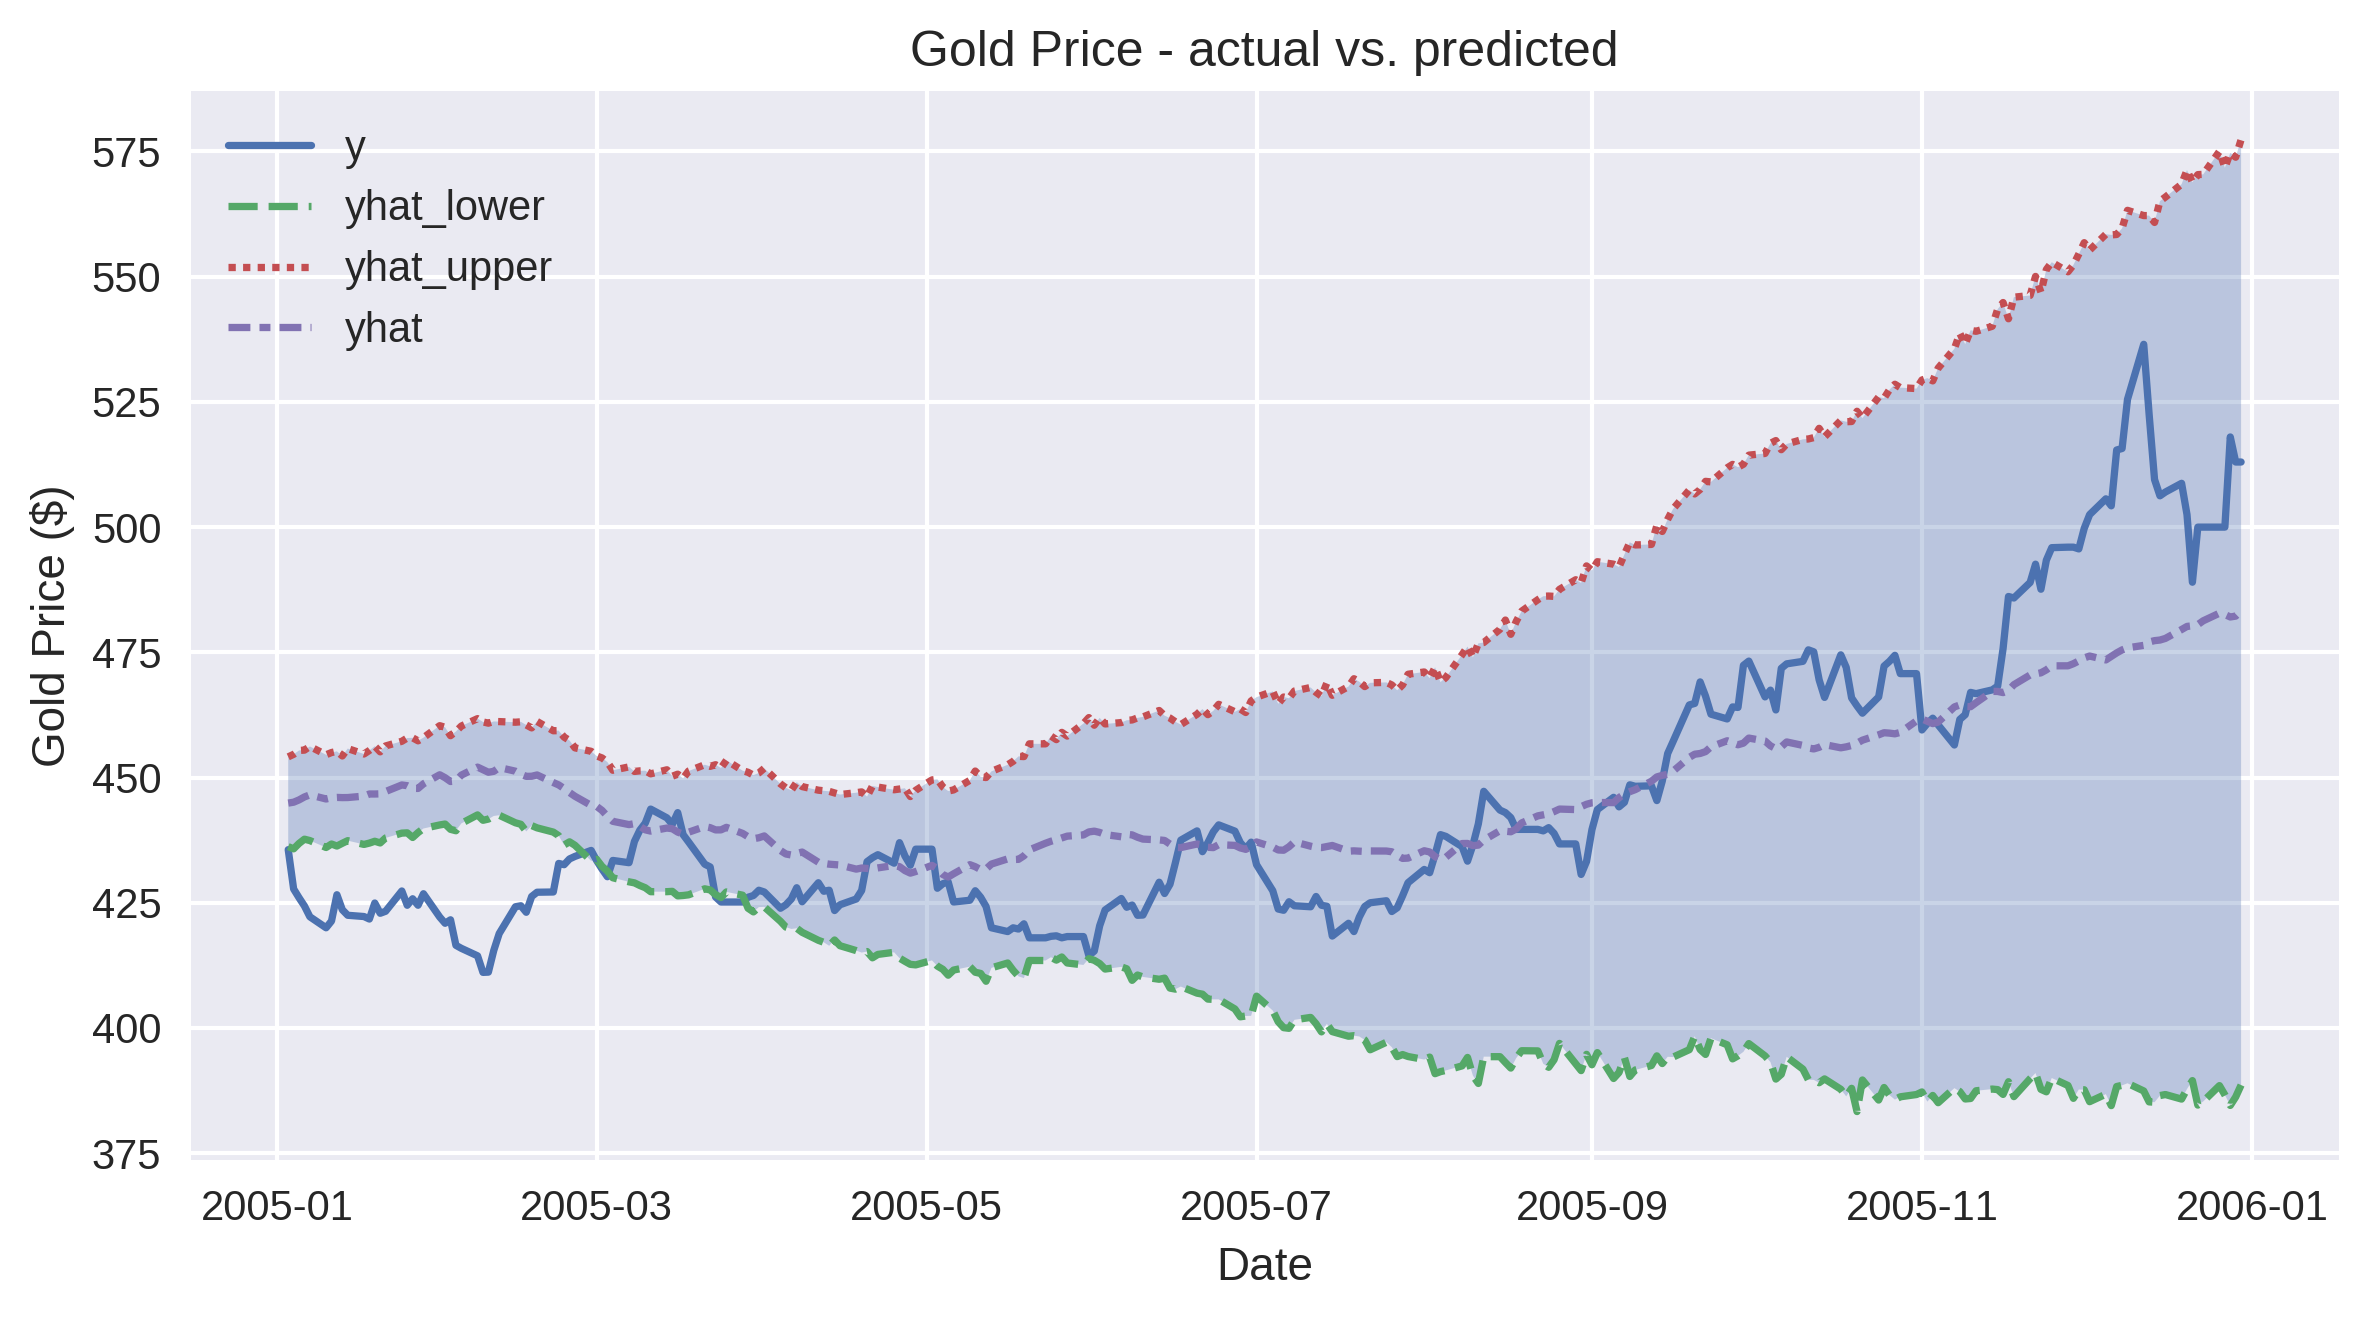

In [ ]:
# Plot the test values vs. predictions
fig, ax = plt.subplots(1, 1)

# plot the lines of test valus and predictions
ax = sns.lineplot(data=df_test[['y', 'yhat_lower',
                                'yhat_upper', 'yhat']])

# fill the area between two horizontal curves
ax.fill_between(df_test.index, # x: The x coordinates of the nodes defining the curves.
                df_test.yhat_lower, # y1: The y coordinates of the nodes defining the first curve.
                df_test.yhat_upper, # y2: The y coordinates of the nodes defining the second curve.
                alpha=0.3) # alpha: change the opacity of the lines

# add Title and axis labels
ax.set(title='Gold Price - actual vs. predicted',
       xlabel='Date',
       ylabel='Gold Price ($)')

plt.tight_layout()
plt.show()# display all created figures simultaneously

From the preceding plot, we can see that Prophet accurately (at least visually) predicted the price of gold over 2005.

It was only over the first two months that the observed prices were outside of the confidence interval.

## 3.3 Testing for stationarity in time series

A stationary time series is a series in which statistical properties such as mean, variance, and covariance are constant over time.

Stationarity is a desired characteristic of time series as it makes modeling and extrapolating (forecasting) into the future more feasible. Some drawbacks of non-stationary data are:

* Variance can be misspecified by the model
* Worse model fit
* Cannot leverage valuable time-dependent patterns in the data

In this recipe, we show you how to test the time series for stationarity. To do so, we employ the following methods:
* The **Augmented Dickey-Fuller (ADF)** test
* The **Kwiatkowski-Phillips-Schmidt-Shin (KPSS)** test
* Plots of the **(partial) autocorrelation function (PACF/ACF)**

Notes:
* Augmented Dickey-Fuller (ADF) test
  * $\Delta y_t = \alpha + \beta t + \gamma y_{t-1} + \delta_1 \Delta y_{t-1} + ... + \delta_{p-1} \Delta y_{t-p+1} + \epsilon_t $
  
      where,
    * $\alpha$ = a constant
    * $\beta$ = the coefficient on a time trend
    * $y_{t-1}$ = lag 1 of time series
    * $\Delta y_{t-i}$ = the first difference of the series at time $t-i$
    * $p$ = the lag order if the autoregressive process
    * $\epsilon_t$ = the noise term

  * Null hypothesis $H_0$ : $\gamma=0$

* See https://analyticsindiamag.com/complete-guide-to-dickey-fuller-test-in-time-series-analysis/
  

* Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test
  * $y_t = \beta t + \mu_t + \epsilon_t,\quad \mu_t = \mu_{t-1} + u_t, \quad u_t \overset{i.i.d.}{\backsim}(0, \sigma^2) $  
      
      where,
    * $\beta t$ = deterministic trend
    * $\mu_t$ = random walk
    * $\epsilon_t$ = stationary error
  * Null hypothesis $H_0$ : $\sigma^2=0$
  

We investigate the stationarity of monthly gold prices from the years 2000-2011.

Remarks:

* We will use the same data that we used in the *Decomposing time series* recipe. In the plot presenting the rolling mean and standard deviation of the gold prices, we have already seen that the statistics seem to increase over time, suggesting non-stationarity.

In [ ]:
# Preparation work in 3.1 Decomposing time series recipe
# Download the data
import pandas as pd
import quandl

# QUANDL_KEY = '{key}' # replace {key} with your own API key
QUANDL_KEY = '6J66VAfsNrsDn8n4xwUG'
quandl.ApiConfig.api_key = QUANDL_KEY

# download the data from Quandl
df = quandl.get(dataset='WGC/GOLD_MONAVG_USD',
                start_date='2000-01-01',
                end_date='2011-12-31')

# change the column name from 'Value' to 'price' and modify the DataFrame in place
df.rename(columns={'Value': 'price'}, inplace=True)
# Resample by month and only take the last available value
df = df.resample('M').last()

In [ ]:
# Import the libraries
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss

In [ ]:
# Define a function for running the ADF test
def adf_test(x):
    '''
    Function for performing the Augmented Dickey-Fuller test for stationarity

    Null Hypothesis: time series is not stationary
    Alternate Hypothesis: time series is stationary

    Parameters
    ----------
    x : pd.Series / np.array
        The time series to be checked for stationarity

    Returns
    -------
    results: pd.Series
        A Series with the ADF test's results
    '''

    indices = ['Test Statistic', 'p-value',
               '# of Lags Used', '# of Observations Used']

    # Perform the ADF test
    adf_test = adfuller(x, autolag='AIC')

    # Use a pandas Series to store the ADF test result and add row names
    results = pd.Series(adf_test[0:4], index=indices) # the first four items `adf_test` returned: test statistic, p-value, # of lags used,# of observations used

    # Change the row names of the critical values
    for key, value in adf_test[4].items(): # the fifth item `adf_test` returned: critical values
        # Add a new row in pandas Series results
        results[f'Critical Value ({key})'] = value

    return results

Notes:

 *  `statsmodels.tsa.stattools.adfuller`
      * `autolag: {“AIC”, “BIC”, “t-stat”, None}`
        * Method to use when automatically determining the lag length among the values 0, 1, …, maxlag.
        * We specified `autolag='AIC'` in the `adfuller` function, so the number of considered lags is automatically selected based on the Akaike Information Criterion (AIC).
        * The function will return a tuple to store the test result.
        * Return
            * adf : *float*. The test statistic.
            * pvalue : *float*.
            * usedlag : *int*. The number of lags used.
            * nobs : *int*. The number of observations used for the ADF regression and calculation of the critical values.
            * critical values : *dict*. Critical values for the test statistic at the 1 %, 5 %, and 10 % levels.

* *Python Collections (Arrays)*

    There are four built-in data types data types in the Python programming language:
    * **List** is a collection which is ordered and changeable. Allows duplicate members.
    * **Tuple** is a collection which is ordered and unchangeable. Allows duplicate members.
    * **Set** is a collection which is unordered and unindexed. No duplicate members.
    * **Dictionary** is a collection which is unordered and changeable. No duplicate members.
        * Dictionaries are used to store data values in `key:value` pairs.

In [ ]:
thislist = ['Test Statistic', 'p-value',
            '# of Lags Used', '# of Observations Used']
print(f'This is a list: {thislist}')

thistuple = ("apple", "banana", "cherry")
print(f'This is a tuple: {thistuple}')

#thattuple =adfuller(df.price, autolag='AIC')
#print(type(thattuple),thattuple)

thisset = {"apple", "banana", "cherry", "banana"}
print(f'This is a set: {thisset}')

thisdict = {
  "brand": "Ford",
  "model": "Mustang",
  "year": 1964
}
print(thisdict["brand"])

This is a list: ['Test Statistic', 'p-value', '# of Lags Used', '# of Observations Used']
This is a tuple: ('apple', 'banana', 'cherry')
This is a set: {'banana', 'apple', 'cherry'}
Ford


In [ ]:
# For loop for Dictionary
for key in thisdict.keys():
    print(f'Property: {key}')

for value in thisdict.values():
    print(f'Information: {value}')

for key, value in thisdict.items():
    print(f'Its {key} is {value}.')

Property: brand
Property: model
Property: year
Information: Ford
Information: Mustang
Information: 1964
Its brand is Ford.
Its model is Mustang.
Its year is 1964.


Notes:
* *Slice notation in Python*
    * ```a[start:stop]```  items ```start``` through ```stop-1```
    * ```a[start:]```      items ```start``` through the rest of the array
    * ```a[:stop]```       items from the beginning through ```stop-1```
    * ```a[:]```           a copy of the whole array

In [ ]:
# slice notation
p = ['P','y','t','h','o','n']

print(p[0:3])
print(p[1:])
print(p[:1])
print(p[:])

['P', 'y', 't']
['y', 't', 'h', 'o', 'n']
['P']
['P', 'y', 't', 'h', 'o', 'n']


In [ ]:
# perform ADF test
adf_test(df.price)

Test Statistic              3.510499
p-value                     1.000000
# of Lags Used             14.000000
# of Observations Used    129.000000
Critical Value (1%)        -3.482088
Critical Value (5%)        -2.884219
Critical Value (10%)       -2.578864
dtype: float64

Remarks:

* The null hypothesis of the ADF test states that the time series is not stationary.

With a p-value of 1 (or equivalently, the test statistic larger than the critical value for the selected confidence level), we have no reason to reject the null hypothesis, meaning that we can conclude that the series is not stationary.

In [ ]:
# Define a function for running the KPSS test
def kpss_test(x, h0_type='c'):
    '''
    Function for performing the Kwiatkowski-Phillips-Schmidt-Shin test for stationarity

    Null Hypothesis: time series is stationary
    Alternate Hypothesis: time series is not stationary

    Parameters
    ----------
    x: pd.Series / np.array
        The time series to be checked for stationarity
    h0_type: str{'c', 'ct'}
        Indicates the null hypothesis of the KPSS test:
            * 'c': The data is stationary around a constant(default)
            * 'ct': The data is stationary around a trend

    Returns
    -------
    results: pd.Series
        A Series with the KPSS test's results
    '''

    indices = ['Test Statistic', 'p-value', '# of Lags']

    # Perform the KPSS test
    kpss_test = kpss(x, regression=h0_type)

    # Use a pandas Series to store the KPSS test result and add row names
    results = pd.Series(kpss_test[0:3], index=indices)

     # Change the row names of the critical values
    for key, value in kpss_test[3].items():
        # Add a new row in pandas Series results
        results[f'Critical Value ({key})'] = value

    return results

Notes:

```statsmodels.tsa.stattools.kpss```
* ```regression``` argument
    * ```'c'``` corresponds to the null hypothesis stating that the series is level-stationary
    * ```'ct'``` corresponds to trend-stationary (removing the trend from the series would make it level-stationary)

In [ ]:
# perform kpss test
kpss_test(df.price)

<ipython-input-54-d6892be2f8d2>:27: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(x, regression=h0_type)


Test Statistic           1.539929
p-value                  0.010000
# of Lags                8.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64

Remarks:
* The null hypothesis of the KPSS test is that the time series is stationary.

With a p-value of 0.01 (or test statistic greater than the selected critical value), we have reasons to reject the null hypothesis in favor of the alternative one, meaning that the series is not stationary.

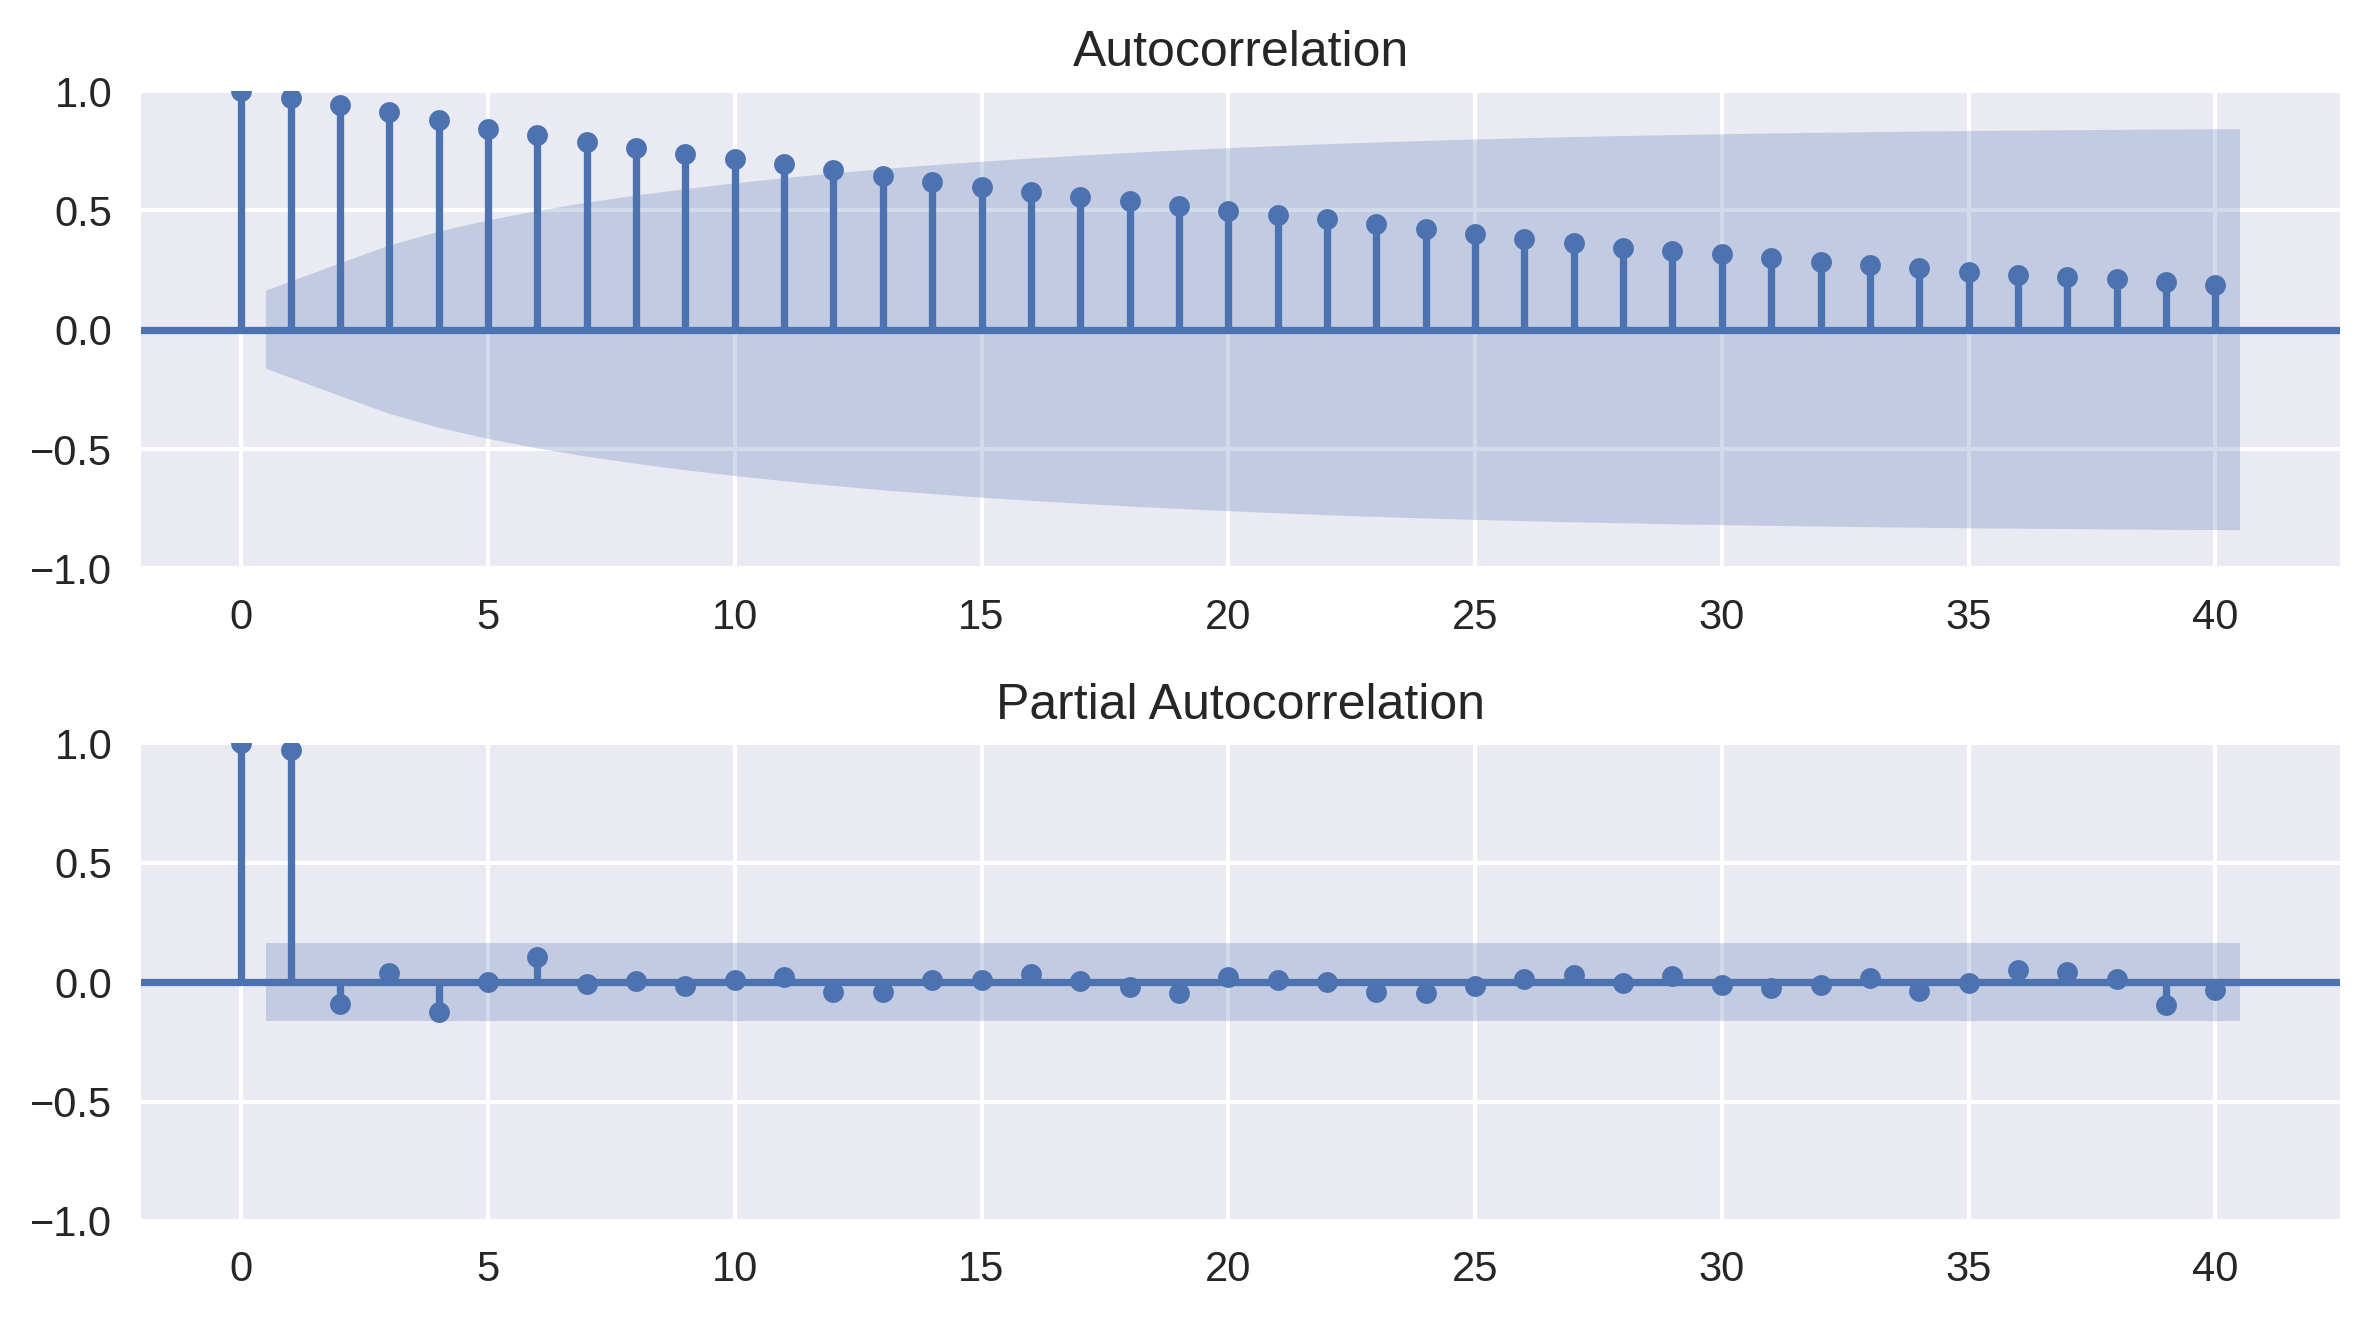

In [ ]:
# Generate the ACF/PACF plots

# Set the lag value, used on horizontal axis
N_LAGS = 40
SIGNIFICANCE_LEVEL = 0.05

# create a figure and a grid of subplots with two rows and one column
fig, ax = plt.subplots(2, 1)

# plot ACF on the first subplot
plot_acf(df.price, ax=ax[0], lags=N_LAGS, # ax: If given, this subplot is used to plot in instead of a new figure being created.
         alpha=SIGNIFICANCE_LEVEL) # 95% confidence intervals are returned

# plot PACF on the second subplot
plot_pacf(df.price, ax=ax[1], lags=N_LAGS,
          alpha=SIGNIFICANCE_LEVEL)

plt.tight_layout()
plt.show()

In the ACF plot, we can see that there are significant autocorrelations (above the 95% confidence interval, corresponding to the selected 5% significance level).

There are also some significant autocorrelations at lags 1 and 4 in the PACF plot.

See also https://medium.com/@tannyasharma21/comparision-study-of-adf-vs-kpss-test-c9d8dec4f62a#:~:text=ADF%20finds%20a%20unit%20root,rid%20it%20of%20its%20trend

https://www.statsmodels.org/dev/examples/notebooks/generated/stationarity_detrending_adf_kpss.html

## 3.4 Correcting for stationarity in time series

In this recipe, we investigate how to make a non-stationary time series stationary by using the following transformations:
* **Deflation**: Accounting for inflation in monetary series using the **Consumer Price Index (CPI)**
* **Natural logarithm**: Making the exponential trend closer to linear
* **Differencing**: Taking the difference between the current observation and a lagged value (observation x time points before it)

We use the same data that we used in the *Testing for stationarity in time series* recipe. The conclusion from that recipe was that the time series of monthly gold prices from 2000-2011 was not stationary.

In [ ]:
# Preparation work in 3.3 Testing for stationarity in time series recipe
import pandas as pd
import quandl
# QUANDL_KEY = '{key}' # replace {key} with your own API key
QUANDL_KEY = 'RBzUkrxykvxfbiUNxFHJ'
quandl.ApiConfig.api_key = QUANDL_KEY

# download the data from Quandl
df = quandl.get(dataset='WGC/GOLD_MONAVG_USD',
                start_date='2000-01-01',
                end_date='2011-12-31')

# change the column name from 'Value' to 'price' and modify the DataFrame in place
df.rename(columns={'Value': 'price'}, inplace=True)
# Resample by month and only take the last available value
df = df.resample('M').last()

In [ ]:
# Helper function for chapter 3

# Perform ADF test and KPSS test and plot the result
def test_autocorrelation(x, n_lags=40, alpha=0.05, h0_type='c'):
    '''
    Function for testing the stationarity of a series by using:
    * the ADF test
    * the KPSS test
    * ACF/PACF plots
    Parameters
    ----------
    x: pd.Series / np.array
        The time series to be checked for stationarity
    n_lags : int
        The number of lags for the ACF/PACF plots
    alpha : float
        Significance level for the ACF/PACF plots
    h0_type: str{'c', 'ct'}
        Indicates the null hypothesis of the KPSS test:
            * 'c': The data is stationary around a constant(default)
            * 'ct': The data is stationary around a trend
    Returns
    -------
    fig : matplotlib.figure.Figure
        Figure containing the ACF/PACF plot
    '''

    # perform ADF test
    adf_results = adf_test(x)
    # perform KPSS test
    kpss_results = kpss_test(x, h0_type=h0_type)

    # print the tests' results
    print('ADF test statistic: {:.2f} (p-val: {:.2f})'.format(adf_results['Test Statistic'],
                                                             adf_results['p-value']))
    print('KPSS test statistic: {:.2f} (p-val: {:.2f})'.format(kpss_results['Test Statistic'],
                                                              kpss_results['p-value']))

    # create a figure with 2 subplots and width 16 inches and height 8 inches
    fig, ax = plt.subplots(2, figsize=(16, 8))
    # plot ACF on the first subplot
    plot_acf(x, ax=ax[0], lags=n_lags, alpha=alpha)
    # plot PACF on the second subplot
    plot_pacf(x, ax=ax[1], lags=n_lags, alpha=alpha)

    return fig

Notes:
* `{:.2f}`
    *  `.2`: print only the first 2 digits after the decimal point.
    * `f`: the number (result) that will be printed will be a floating point type.
* `string.format(value1, value2...)`
    * The `format()` method formats the specified value(s) and insert them inside the string's placeholder.
    * The placeholders can be identified using named indexes `{price}`, numbered indexes `{0}`, or even empty placeholders `{}`.

In [ ]:
# format() method
txt1 = "My name is {fname}, I'm {age}".format(fname = "Jane", age = 12)
txt2 = "My name is {0}, I'm {1}".format("Jane",12)
txt3 = "My name is {}, I'm {}".format("Jane",12)

print(txt1)
print(txt2)
print(txt3)

My name is Jane, I'm 12
My name is Jane, I'm 12
My name is Jane, I'm 12


1. Import the libraries and update the inflation data

In [ ]:
pip install cpi;

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.5/31.5 MB 19.1 MB/s eta 0:00:00


In [ ]:
# Import the libraries and update the inflation data
import cpi
import pandas as pd
import numpy as np
from datetime import date
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
from chapter_3_utils import test_autocorrelation

# update the CPI data (if needed)
# cpi.update()

Notes:
* `cpi`
    * A Python library that quickly adjusts U.S. dollars for inflation using the Consumer Price Index (CPI).

Remarks:
* Import modules
    * Python Module Search Path
        * While importing a module, Python looks at several places. Interpreter first looks for a built-in module. Then(if built-in module not found), Python looks into a list of directories defined in `sys.path`.
        * The search is in this order:
            * The current directory.
            * PYTHONPATH (an environment variable with a list of directories).
            * The installation-dependent default directory.
    * Import custom modules in Python
        * `chapter_3_utils.py` contains the helper function for this chapter.
        * Download the file from https://github.com/PacktPublishing/Python-for-Finance-Cookbook and put it in your working directory.

In [ ]:
# check your own directory
import sys
sys.path

['/content/notebooks',
 '/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/root/.ipython']

2. Deflate the gold prices (to 2011-12-31 USD values) and plot the results:

In [ ]:
# Deflate the gold prices (to 2011-12-31 USD values)

# Create a datetime date value
DEFL_DATE = date(2011, 12, 31)

# Create an index column containing dates (datetime.date)
df['dt_index'] = df.index.map(lambda x: x.to_pydatetime().date())

# Adjust gold price for deflation to 2011-12-31 USD values
df['price_deflated'] = df.apply(lambda x: cpi.inflate(x.price, # the gold price we want to adjust
                                                      x.dt_index, # the date that the gold price come from
                                                      DEFL_DATE), # the date (2011-12-31) we want to adjust to
                                axis=1)

Notes:

* `pandas.Timestamp.to_pydatetime()`
    * Convert a `Timestamp` object to a native Python `datetime` object.

* `cpi.inflate(value, year_or_month, to)`
    * `value`: The dollar value we want to adjust.
    * `year_or_month`: The date that the dollar value comes from. (`datetime.date` object)
    * `to`: Optionally, the date we want to adjust to. If we don't provide this argument, the function will adjust to the most recent year.
   
* `pandas.DataFrame.apply(func, axis=0)`
    * `axis`: *{0 or ‘index’, 1 or ‘columns’}, default 0*
        * Axis along which the function is applied:
            * `0` or `‘index’`: apply function to each column.
            * `1` or `‘columns’`: apply function to each row.
    
Remarks:
* We could also adjust the gold prices to another point of time, as long as it is the same point for the entire series.    

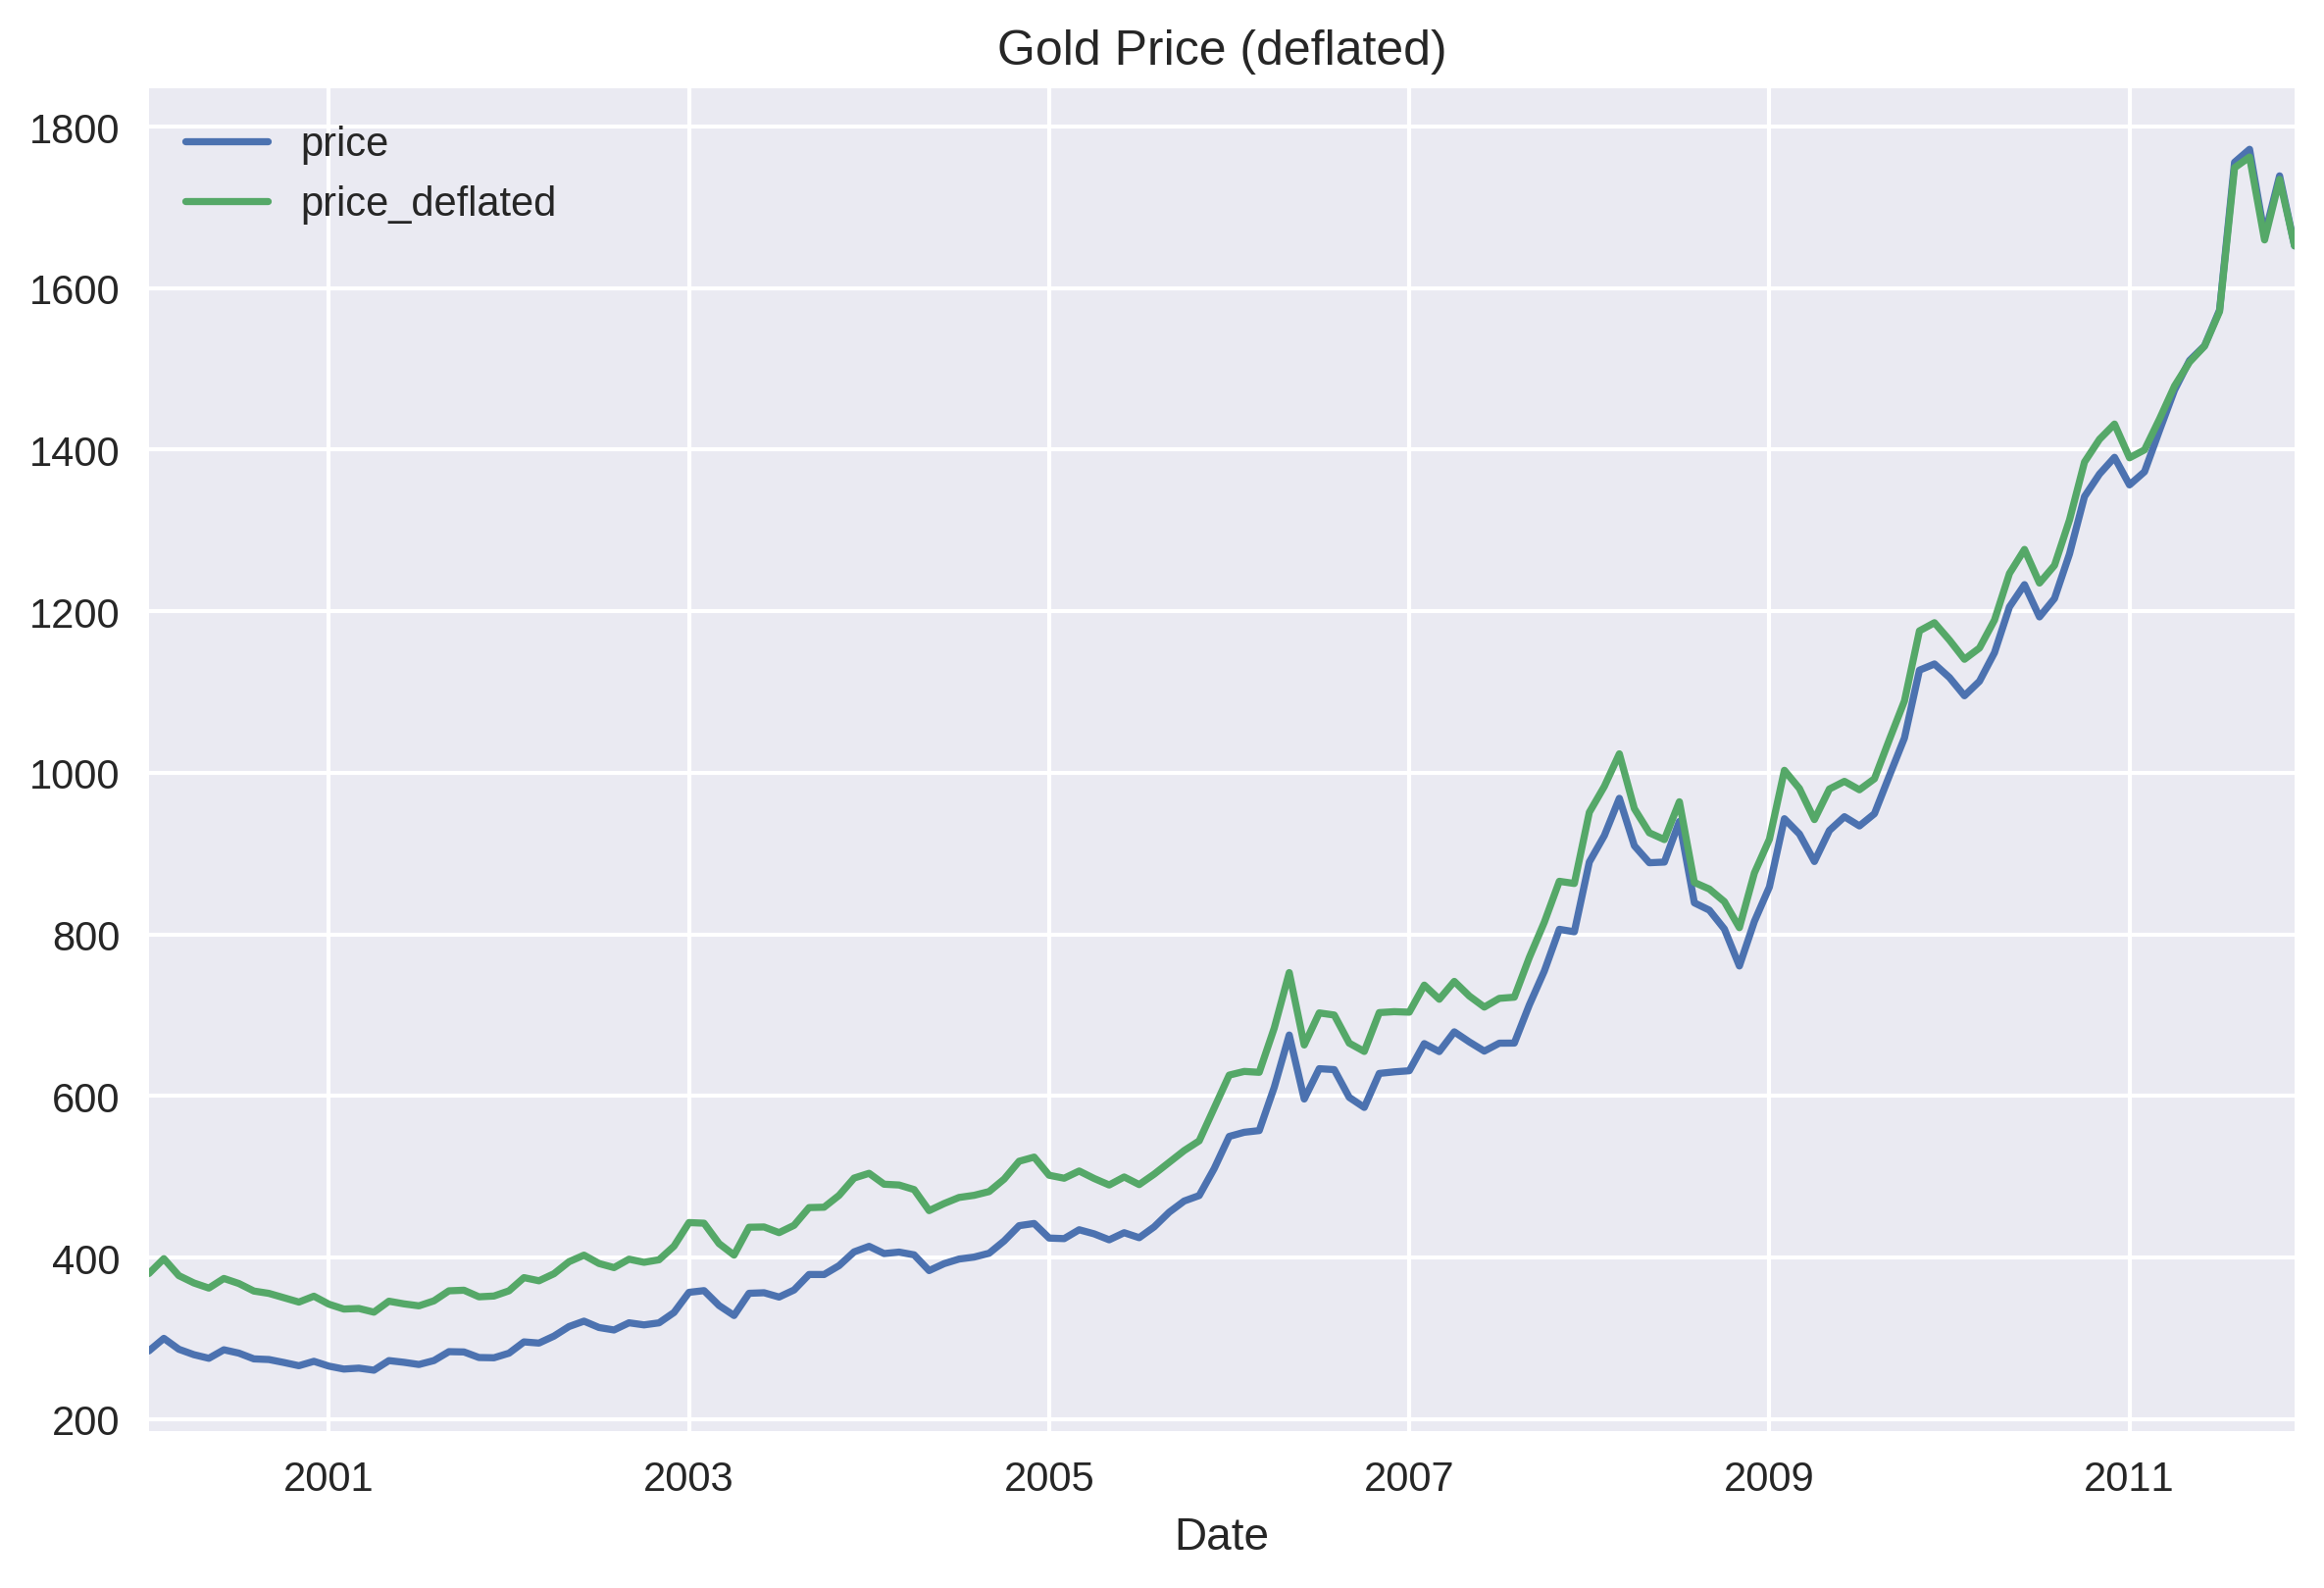

In [ ]:
# Plot the price and adjusted price
df[['price', 'price_deflated']].plot(title='Gold Price (deflated)')

plt.tight_layout()
plt.show()

3. Deflate the series using natural logarithm and plot it together with the rolling metrics:

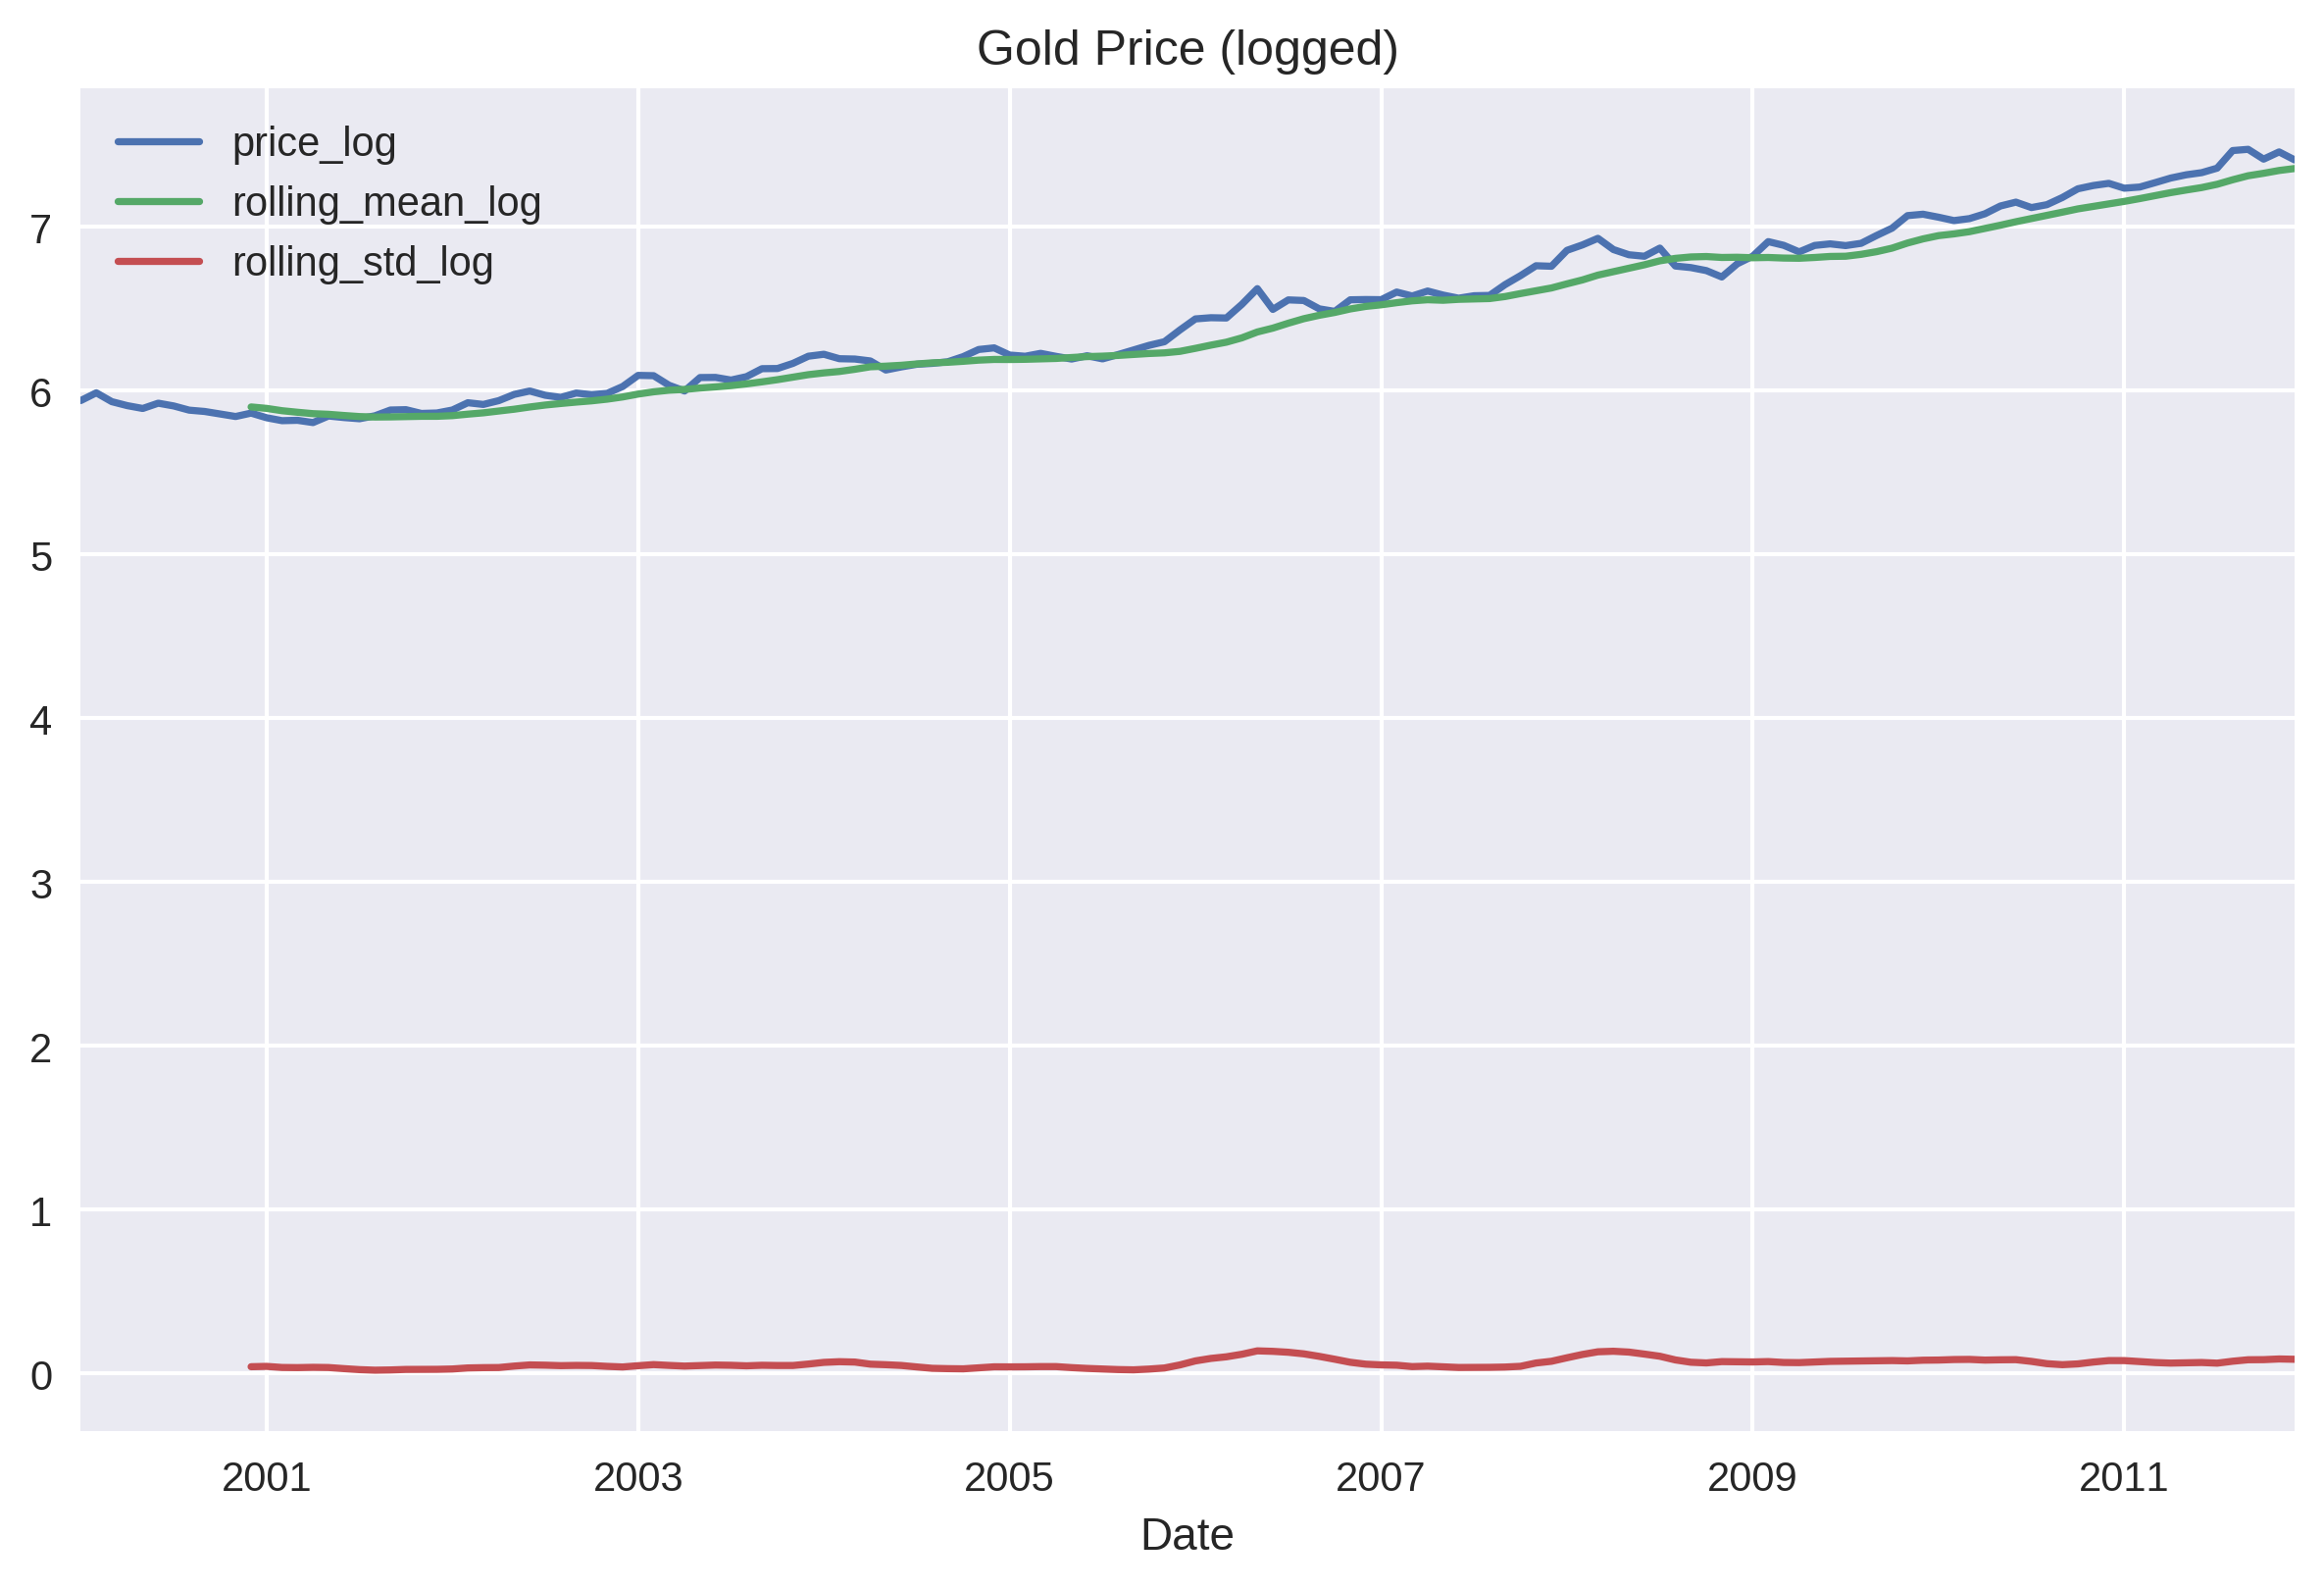

In [ ]:
# Deflate the series using natural logarithm and plot it together with the rolling metrics
WINDOW = 12
selected_columns = ['price_log', 'rolling_mean_log',
                    'rolling_std_log']

# Deflate the series using natural logarithm
df['price_log'] = np.log(df.price_deflated)

# Add rolling metrics
df['rolling_mean_log'] = df.price_log.rolling(WINDOW).mean() # mean
df['rolling_std_log'] = df.price_log.rolling(WINDOW).std() # standard deviation

# Plot the series
df[selected_columns].plot(title='Gold Price (logged)')

plt.tight_layout()
plt.show()

From the preceding plot, we can see that the log transformation did its job, that is, it made the exponential trend linear.

4. Use the `test_autocorrelation` (helper function for this chapter) to investigate if the series became stationary:

ADF test statistic: 0.89 (p-val: 0.99)
KPSS test statistic: 1.66 (p-val: 0.01)


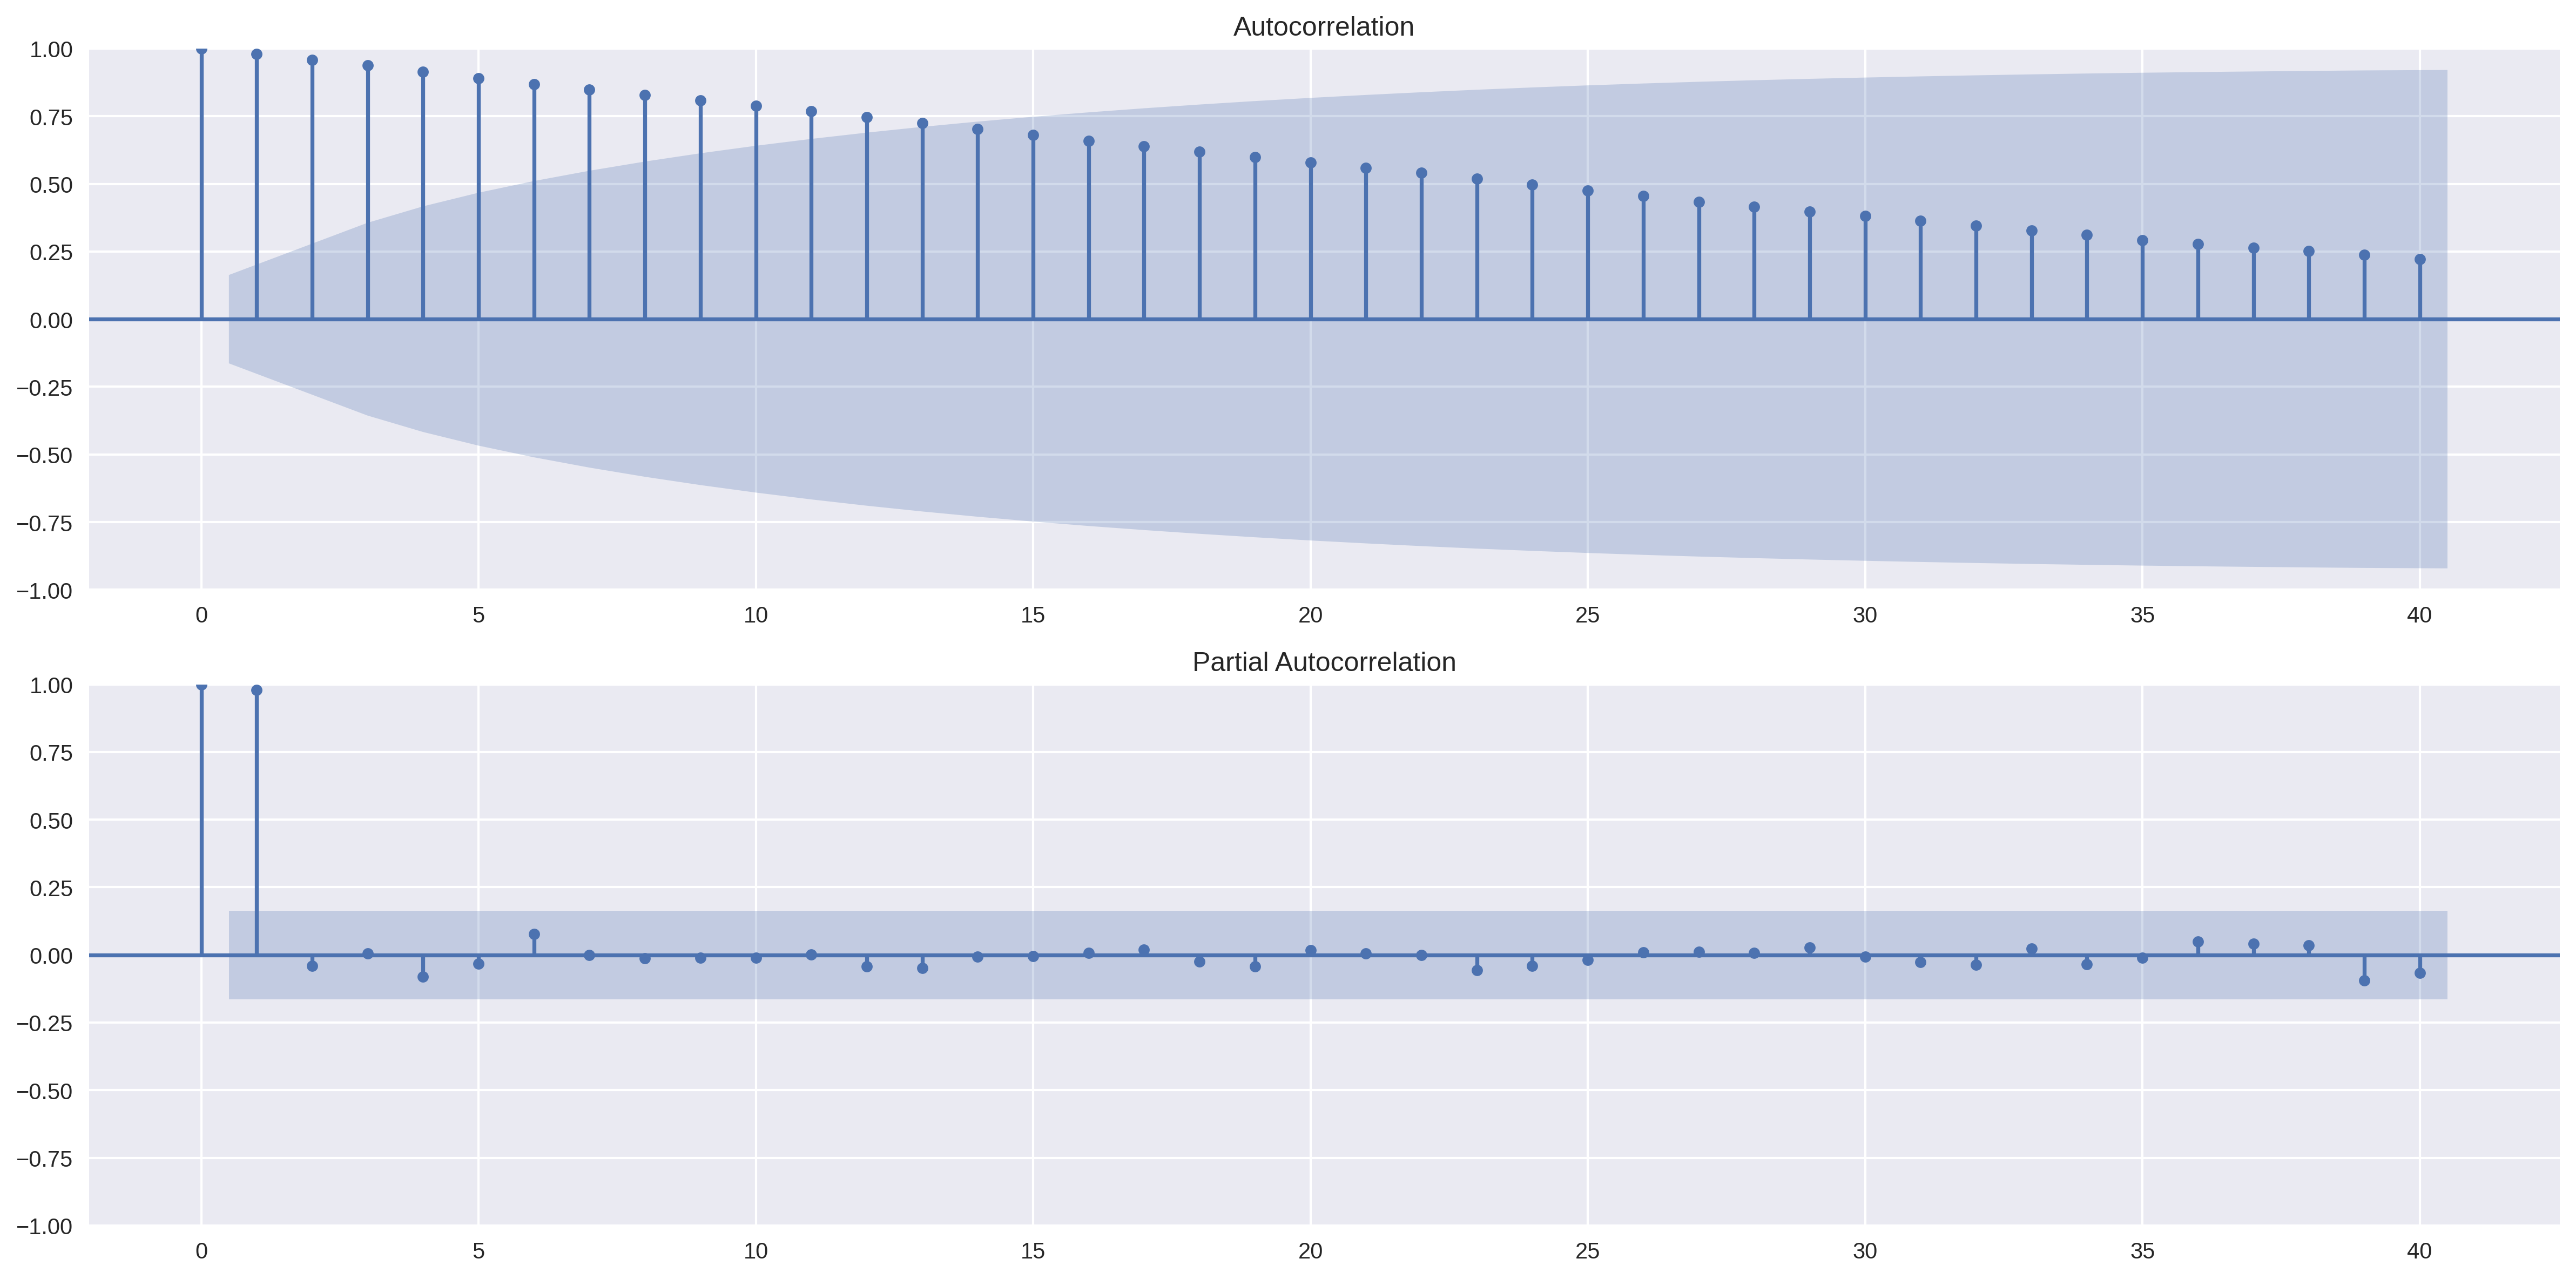

In [ ]:
# Use the `test_autocorrelation` (helper function for this chapter) to investigate if the series became stationary
fig = test_autocorrelation(df.price_log)

plt.tight_layout()
plt.show()

After inspecting the results of the statistical tests and the ACF/PACF plots, we can conclude that deflation and a natural algorithm were not enough to make the gold prices stationary.

5. Apply differencing to the series and plot the results:

In [ ]:
selected_columns = ['price_log_diff', 'roll_mean_log_diff',
                    'roll_std_log_diff']

# Apply first differencing to the series
df['price_log_diff'] = df.price_log.diff(1)

Notes:
* `Series.diff(periods=1)`
    * Calculates the difference of a Series element compared with another element in the Series.
    * The default setting corresponds to the first difference. We can specify a different number by changing the `period` argument.

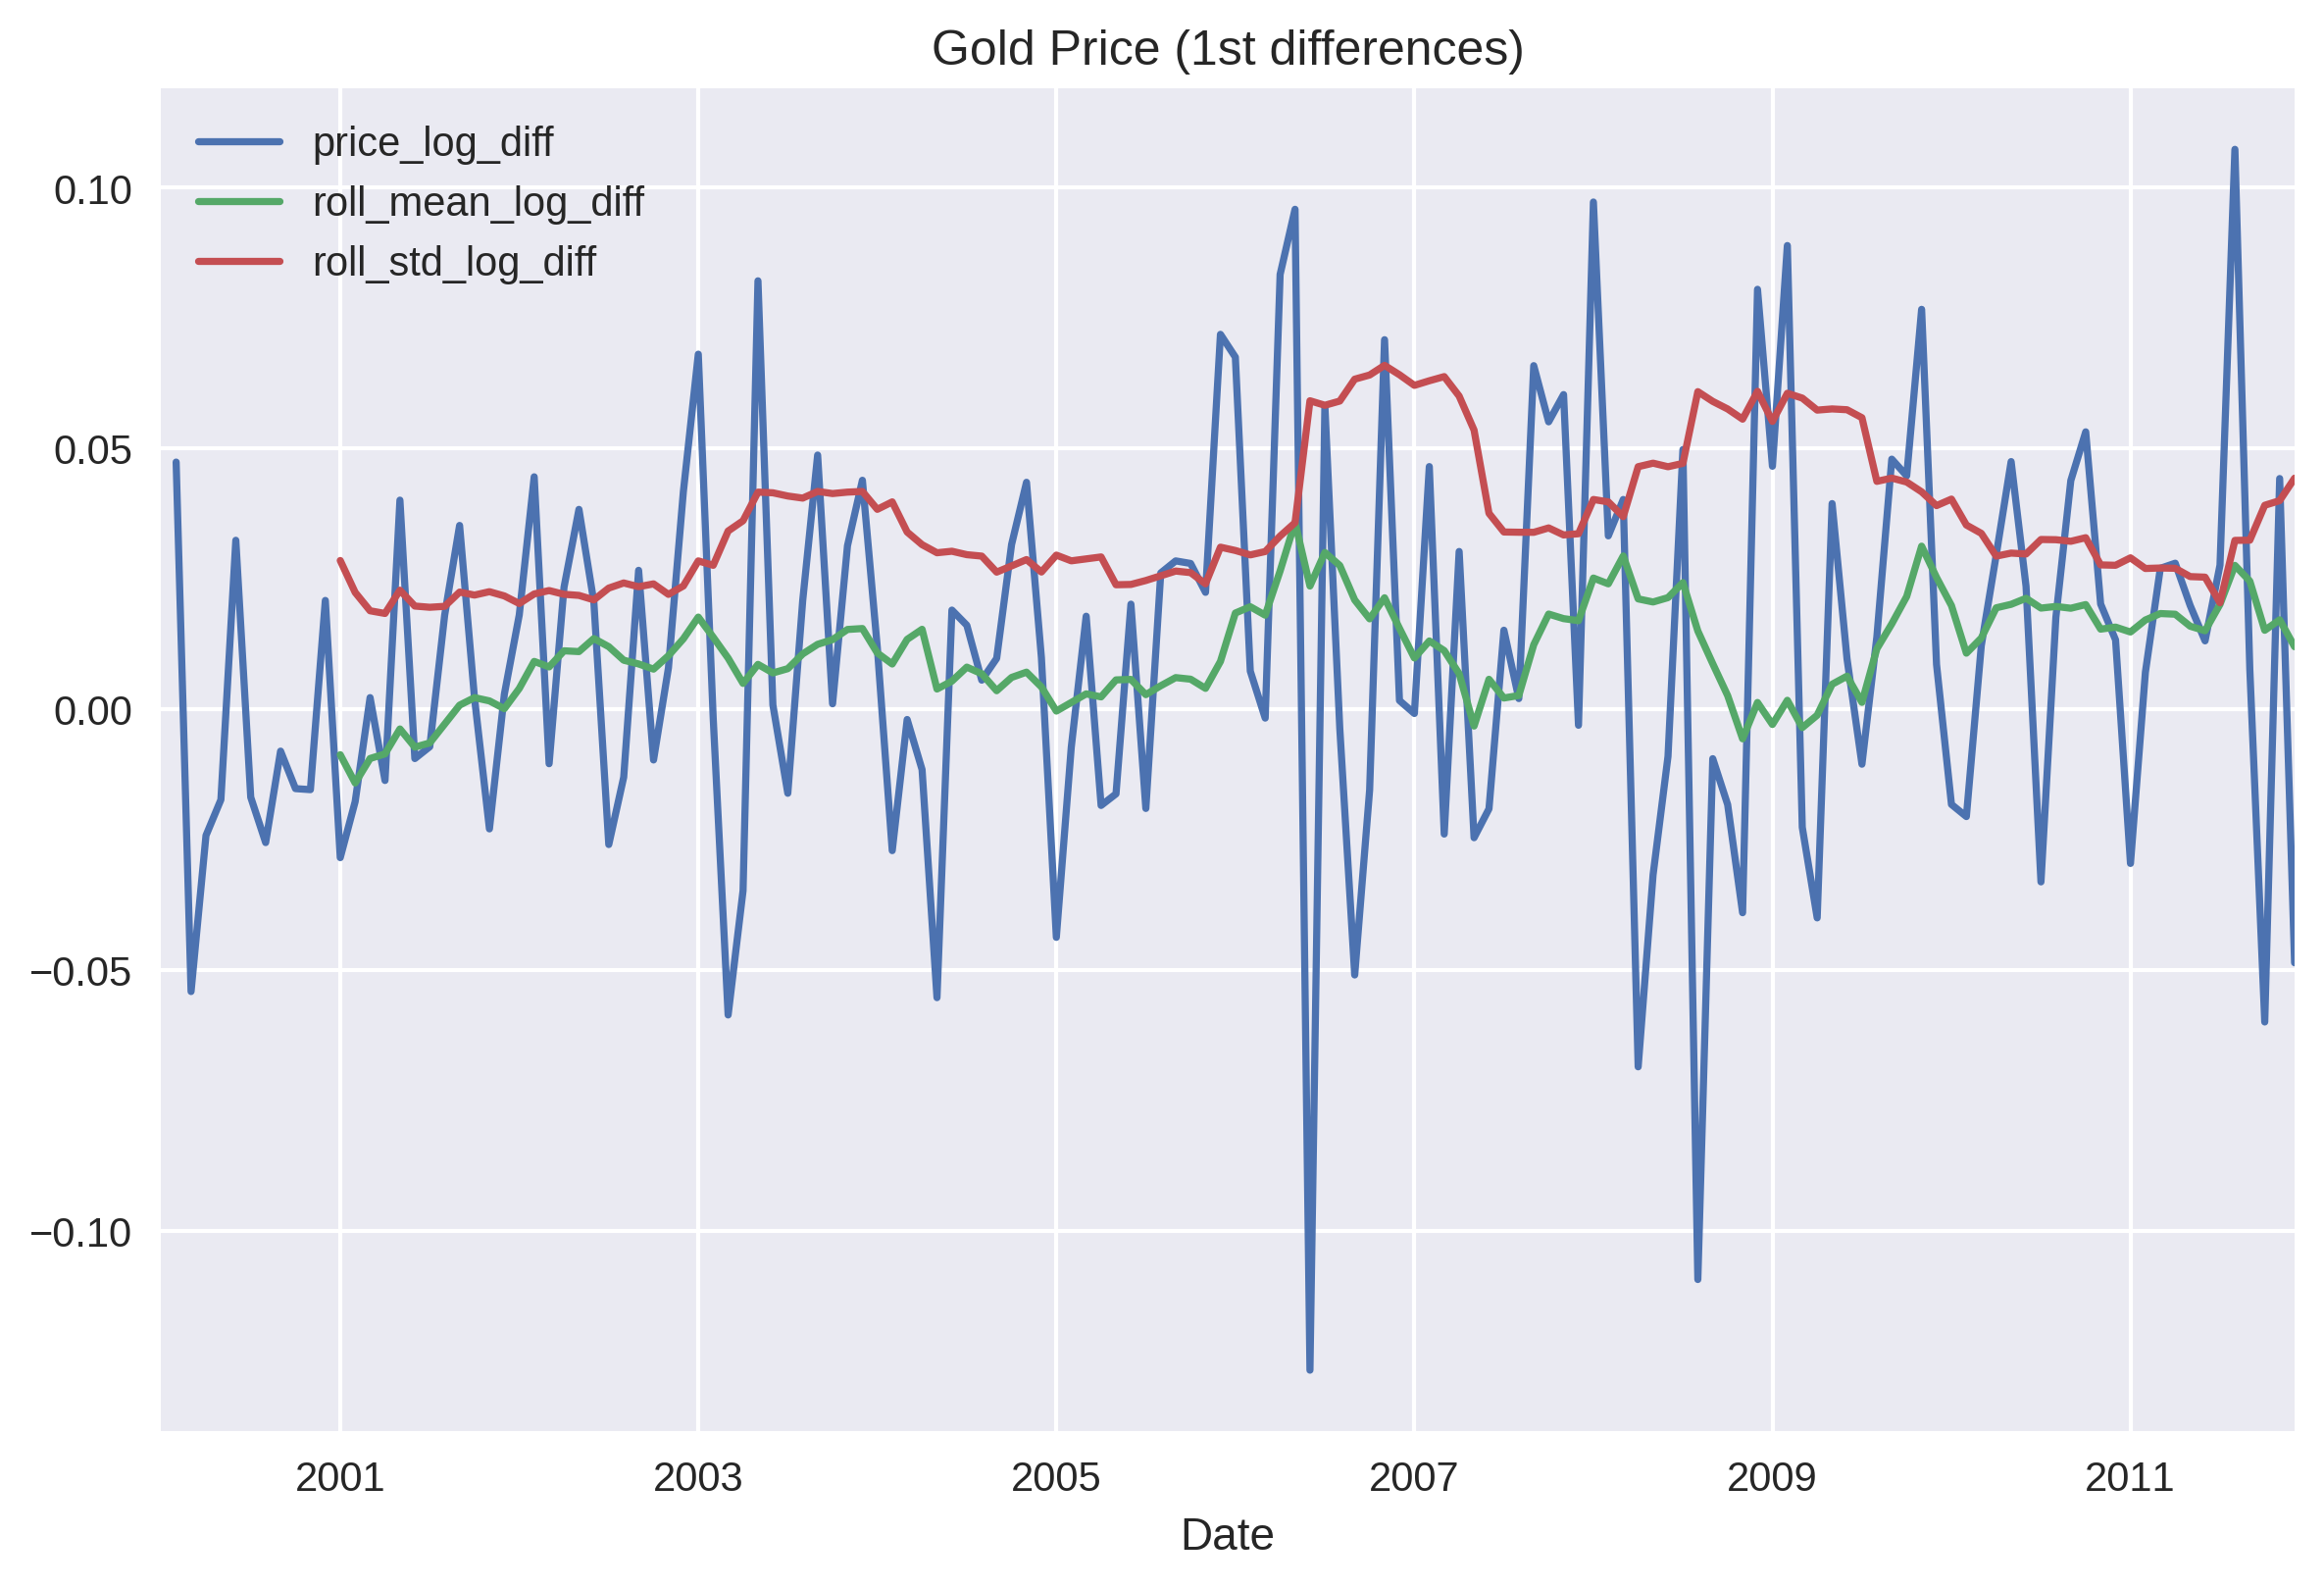

In [ ]:
# Add rolling metrics
df['roll_mean_log_diff'] = df.price_log_diff.rolling(WINDOW).mean()
df['roll_std_log_diff'] = df.price_log_diff.rolling(WINDOW).std()

# plot the results and set the title
df[selected_columns].plot(title='Gold Price (1st differences)')

plt.tight_layout()
plt.show()

The transformed gold prices make the impression of being stationary – the series oscillates around 0 with more or less constant variance. At least there is no visible trend.

6. Test if the series became stationary:

ADF test statistic: -9.13 (p-val: 0.00)
KPSS test statistic: 0.26 (p-val: 0.10)


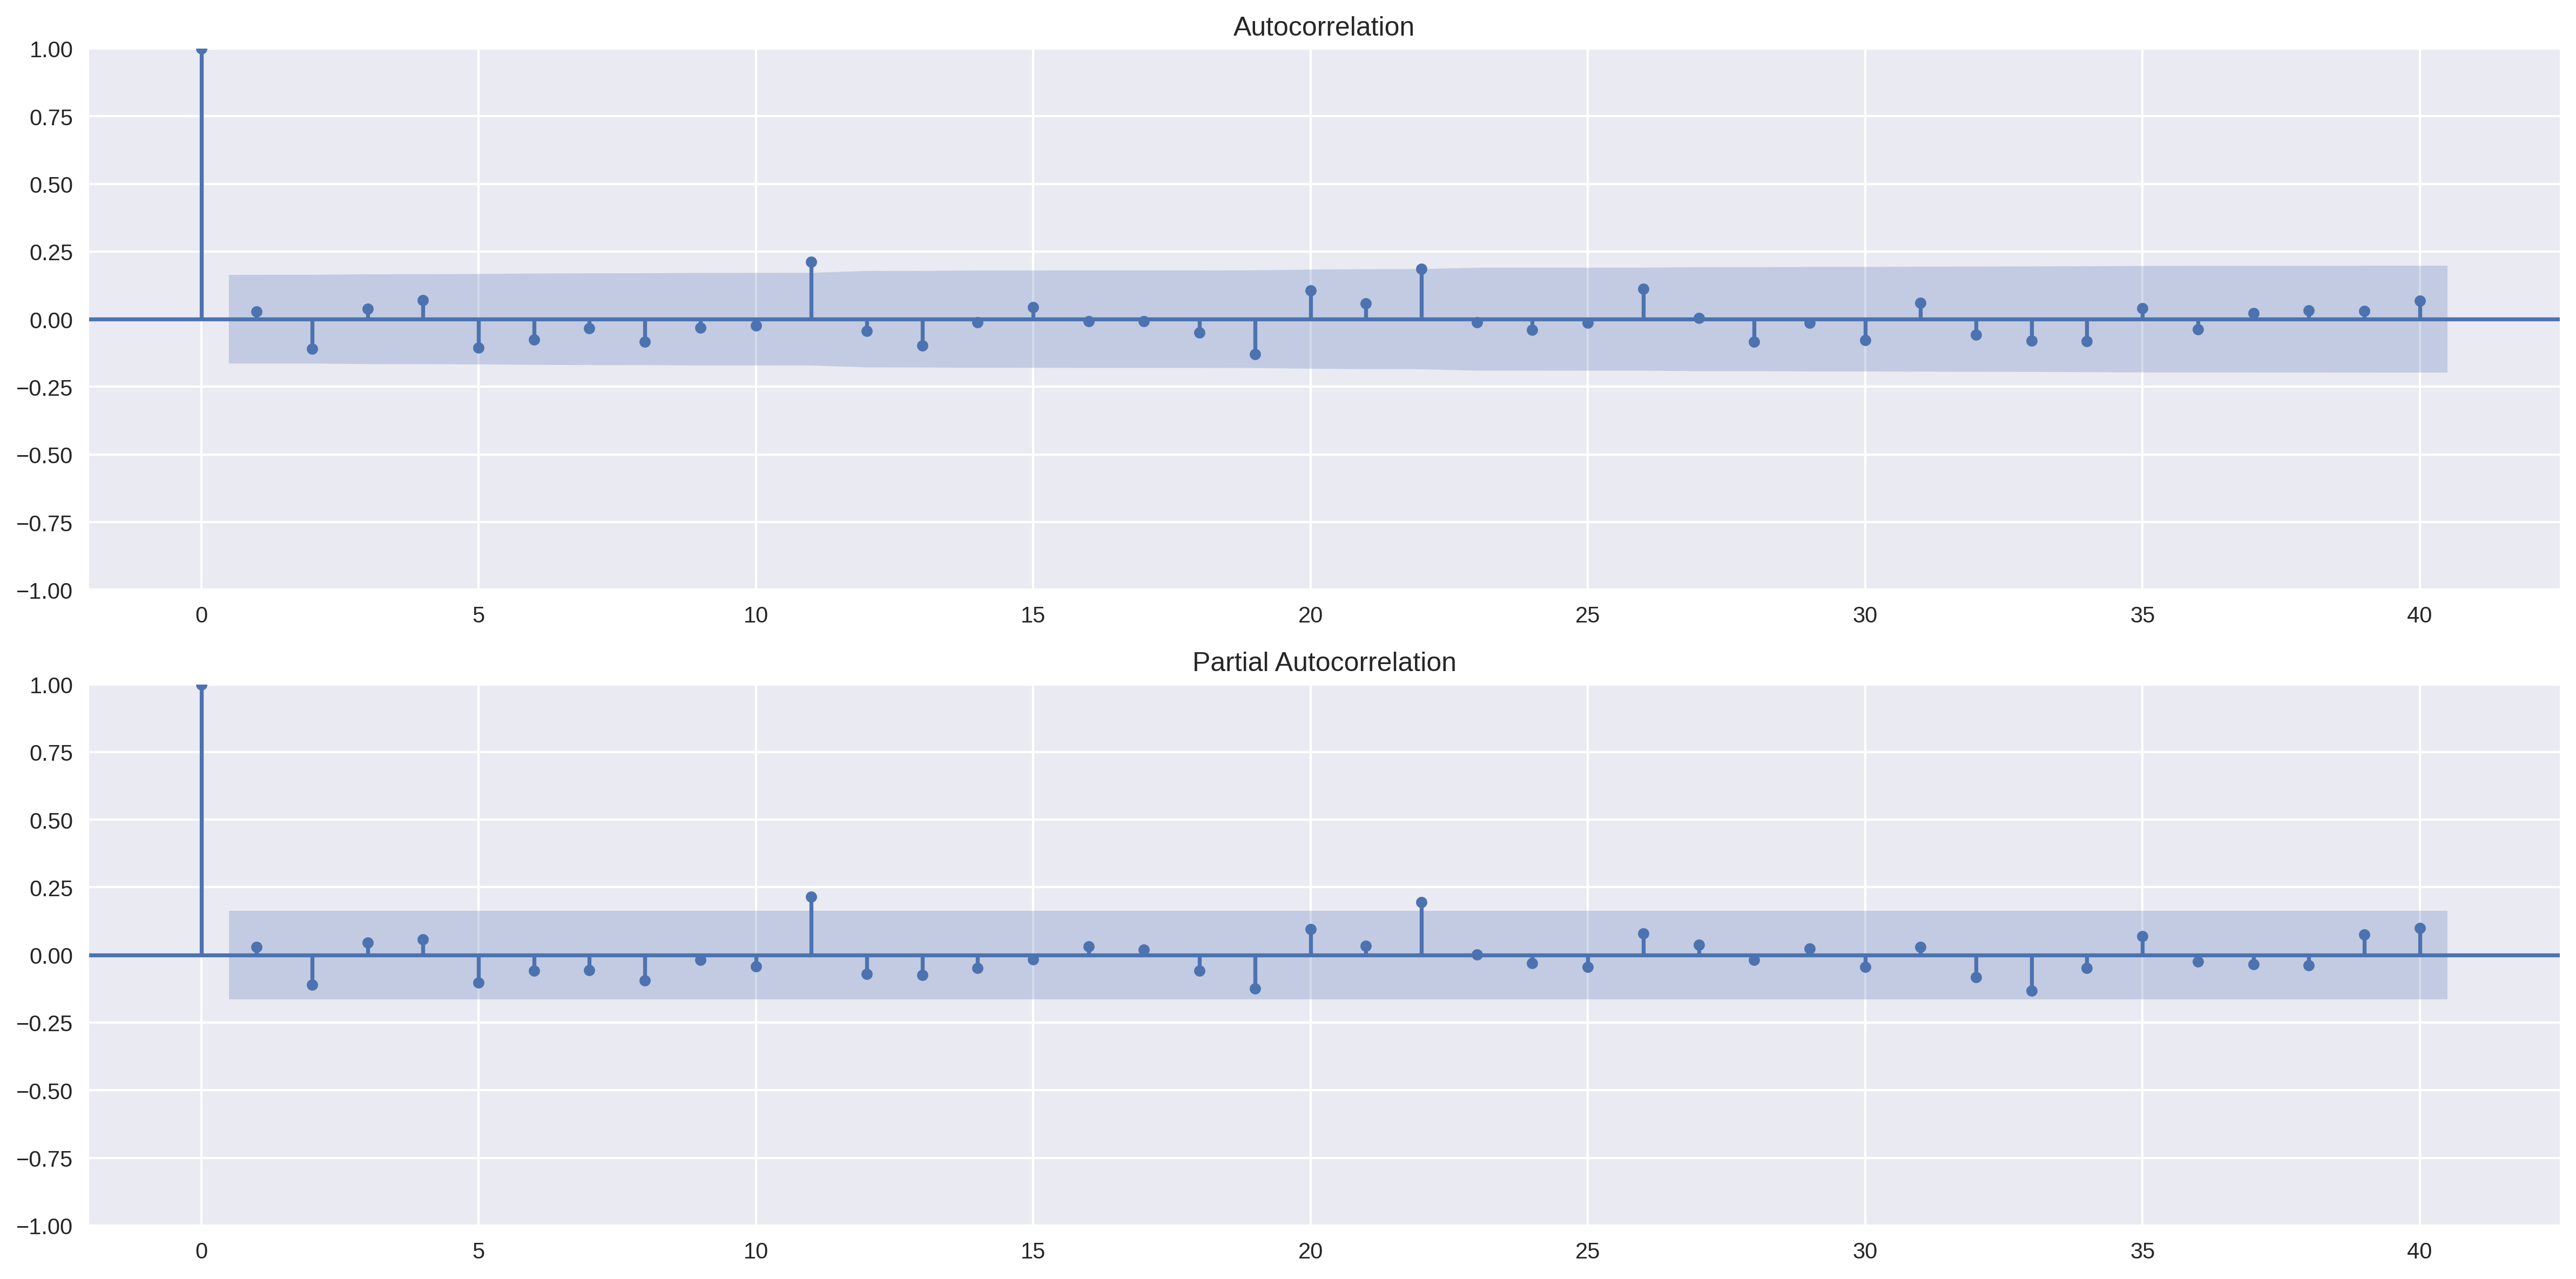

In [ ]:
# Test if the series became stationary use the function `test_autocorrelation`

# Drop NaN (the first row will be NaN as difference starts from the second row)
fig = test_autocorrelation(df.price_log_diff.dropna())

plt.tight_layout()
plt.show()

After applying the first differences, the series became stationary at the 5% significance level (according to both tests).

In the ACF/PACF plots, we can see that there was a significant value of the function at lag 11 and 22. This might indicate some kind of seasonality or simply be a false signal.

Using a 5% significance level means that 5% of the values might lie outside the 95% confidence interval – even when the underlying process does not show any autocorrelation or partial autocorrelation.

Summary:

1. Deflation
    * We used the ```cpi``` library to account for inflation in the US dollar. The library relies on the CPI-U index recommended by the Bureau of Labor Statistics.
    * To make it work, we created an artificial index column containing dates as objects of the ```datetime.date``` class.

2. Log transformation
    * We applied the natural logarithm (```np.log```) to all the values to make the exponential trend linear. This operation was applied to prices that had already been corrected for inflation.

3. Taking the first difference
    * We used the ```diff``` method to calculate the difference between the value in time ```t``` and time ```t-1```.

### There's more...

The considered gold prices do not contain obvious seasonality. However, if the dataset shows seasonal patterns, there are a few potential solutions:

* **Adjustment by differencing**
    * Instead of using the first order differencing, use a higher-order one, for example, if there is yearly seasonality in monthly data, use `diff(12)`.

* **Adjustment by modeling**
    * We can directly model the seasonality and then remove it from the series.
    * One possibility is to extract the seasonal component from `seasonal_decompose` or another more advanced automatic decomposition algorithm. In this case, we should subtract the seasonal component when using the additive model or divide by it if the model is multiplicative.
    * Another solution is to use `np.polyfit()` to fit the best polynomial of a chosen order to the selected time series and then subtract it from the original series.

The **Box-Cox transformation** is another type of adjustment we can use on the time series data. It combines different exponential transformation functions to make the distribution more similar to the Normal (Gaussian) distribution. We can use `boxcox` from `scipy`, which allows us to automatically find the value of the `lambda` parameter for the best fit. One condition to be aware of is that all the values in the series must be positive, the transformation should not be used after 1st differences or any transformations that introduce negative values to the series.

A library called `pmdarima` (more on this library can be found in the Modeling time series with *ARIMA class models* recipe) contains two functions that employ statistical tests to determine how many times we should differentiate the series in order to achieve stationarity (and also remove seasonality, that is, seasonal stationarity).

We can employ the following tests to investigate stationarity: ADF, KPSS, and **Phillips–Perron (PP)**:

Notes:
* Phillips–Perron test
  * $y_t = c + \delta t + a y_{t-1} + e(t) $
  
      where,
    * drift coefficient $c$
    * deterministic trend coefficient $\delta$
    * $y_{t-1}$ = lag 1 of time series
    * $e(t)$ is the innovations process

  * Null hypothesis $H_0$ : $a=1$ ($y$ is a non-stationary time series)
  * Phillips-Perron tests assess the null hypothesis of a unit root in a univariate time series $y$.

In [ ]:
pip install pmdarima;

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.4 MB/s eta 0:00:00


In [ ]:
from pmdarima.arima import ndiffs, nsdiffs

In [ ]:
# employ statistical tests to determine how many times we should differentiate the series to achieve stationarity
print(f"Suggested # of differences (ADF): {ndiffs(df.price, test='adf')}")
print(f"Suggested # of differences (KPSS): {ndiffs(df.price, test='kpss')}")
print(f"Suggested # of differences (PP): {ndiffs(df.price, test='pp')}")

Suggested # of differences (ADF): 1
Suggested # of differences (KPSS): 2
Suggested # of differences (PP): 1


Remarks:
* For the KPSS test, we can also specify what type of null hypothesis we want to test against. The default is level stationarity (`null='level'`).

The results of the tests suggest that the series (without any differencing) is not stationary.

The library also contains two tests for seasonal differences:
* **Osborn, Chui, Smith, and Birchenhall (OCSB)**
* **Canova-Hansen (CH)**

To run them, we also need to specify the frequency of our data (12, in our case) as we are working with monthly data:

In [ ]:
# estimate the number of seasonal differences required to make a given time series stationary
print(f"Suggested # of differences (OSCB): {nsdiffs(df.price, m=12, test='ocsb')}")
print(f"Suggested # of differences (CH): {nsdiffs(df.price, m=12, test='ch')}")

Suggested # of differences (OSCB): 0
Suggested # of differences (CH): 0


The results suggest no seasonality in gold prices.

## 3.5 Modeling time series with exponential smoothing methods

Exponential smoothing methods are suitable for non-stationary data (that is, data with a trend and/or seasonality) and work similarly to exponential moving averages. The forecasts are weighted averages of past observations. These models put more emphasis on recent observations as the weights become exponentially smaller with time.

Smoothing methods are popular because they are fast (not a lot of computations are required) and relatively reliable when it comes to forecasts:
* **Simple exponential smoothing**
    * The most basic model is called Simple Exponential Smoothing (SES). This class of models is most apt for cases when the considered time series does not exhibit any trend or seasonality. They also work well with series with only a few data points.
    * The model is parameterized by a smoothing parameter $\alpha$ with values between 0 and 1. The higher the value, the more weight is put to recent observations. When  $\alpha = 0$, the forecasts for the future are equal to the average of historical data (the one that the model was fitted to). When  $\alpha = 1$, all the forecasts have the same value as the last observation in the training data.
    * Simple Exponential Smoothing's forecast function is flat, that is, all the forecasts, regardless of the time horizon, are equal to the same value—the last level component. That is why this method is only suitable for series with neither trend nor seasonality.

* **Holt's linear trend method**
    * Holt's model is an extension of SES that accounts for a trend in the series by adding the trend component into the model specification. This model should be used when there is a trend in the data, but no seasonality.

    * One issue with Holt's model is that the trend is constant in the future, which means that it increases/decreases indefinitely. That is why an extension of the model dampens the trend by adding the dampening parameter, $\varphi$. It makes the trend converge to a constant value in the future, effectively flattening it. Hyndman and Athanasopoulos (2018) state that $\varphi$ is rarely smaller than 0.8, as the dampening has a very strong effect for smaller values of $\varphi$.

    * The best practice is to restrict the values of $\varphi$ so that they lie between 0.8 and 0.98, because for $\varphi = 1$ the damped model is equivalent to the model without dampening.

In this recipe, we show you how to apply smoothing methods to Google's monthly stock prices (non-stationary data with a trend and no visible seasonality). We fit the model to the prices from 2010-2017 and make forecasts for 2018.

In [ ]:
import seaborn as sns

# Set the default colormap
plt.set_cmap('cubehelix')
# Set the matplotlib color cycle using a seaborn palette
sns.set_palette('cubehelix')

# Define certain colors
COLORS = [plt.cm.cubehelix(x) for x in [0.1, 0.3, 0.5, 0.7]]

<Figure size 2400x1650 with 0 Axes>

Notes:
* List Comprehensions
    * `[expression for item in list]`

    * List comprehension is an elegant way to define and create lists based on existing lists.
    * List comprehension is generally more compact and faster than normal functions and loops for creating list.

In [ ]:
# for loop
h_letters = []
for letter in 'Python':
    h_letters.append(letter)
print(h_letters)

# list comprehension
h_letters = [letter for letter in 'Python']
print( h_letters)

['P', 'y', 't', 'h', 'o', 'n']
['P', 'y', 't', 'h', 'o', 'n']


Remarks:
* In the following recipes, we will be plotting multiple lines on the same plots, each of them representing a different model specification. That is why we want to make sure these lines are clearly distinguishable, especially in black and white. For that reason, from now until the last recipe of this chapter, we will be using a different color palette for the plots, that is, `cubehelix`.
* In the preceding code, we defined a list of four colors. We will use these instead of using the standard color codes (red/green/blue/gray).

In [ ]:
pip install yfinance;

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import date
from statsmodels.tsa.holtwinters import (ExponentialSmoothing,
                                         SimpleExpSmoothing,
                                         Holt)

1. Import the libraries:

Notes:

`yfinance`

* yfinance offers a reliable, threaded, and Pythonic way to download historical market data from Yahoo! finance.

    * `yf.download(start, end, auto_adjust, progress)`
        * The `download` module is for rapidly downloading the historical data of multiple tickers at once.
        * `auto_adjust` will adjust all OHLC automatically.
        * `progress` will show a progress bar.

2. Download the adjusted stock prices of Google:

In [ ]:
# Download the adjusted stock prices of Google from Yahoo! finance
df = yf.download('GOOG',
                 start='2010-01-01',
                 end='2018-12-31',
                 progress=False)

print(f'Downloaded {df.shape[0]} rows of data.')

Downloaded 2263 rows of data.


Remarks:
* `yf.download` will automatically download both close price and adjusted close price.

3. Aggregate to monthly frequency:

In [ ]:
# Aggregate to monthly frequency and rename the adjusted close column
goog = df.resample('M') \
         .last() \
         .rename(columns={'Adj Close': 'adj_close'}) \
         .adj_close

In [ ]:
goog.head()

Date
2010-01-31    13.199027
2010-02-28    13.120820
2010-03-31    14.125056
2010-04-30    13.093423
2010-05-31    12.095413
Freq: M, Name: adj_close, dtype: float64

4. Create the training/test split:

In [ ]:
# Data before 2018 will be used as training data
train_indices = goog.index.year < 2018

# Create the training/test split
goog_train = goog[train_indices]
goog_test = goog[~train_indices]

# The prediction length will be the same as the length of test data
test_length = len(goog_test)

5. Plot the prices:

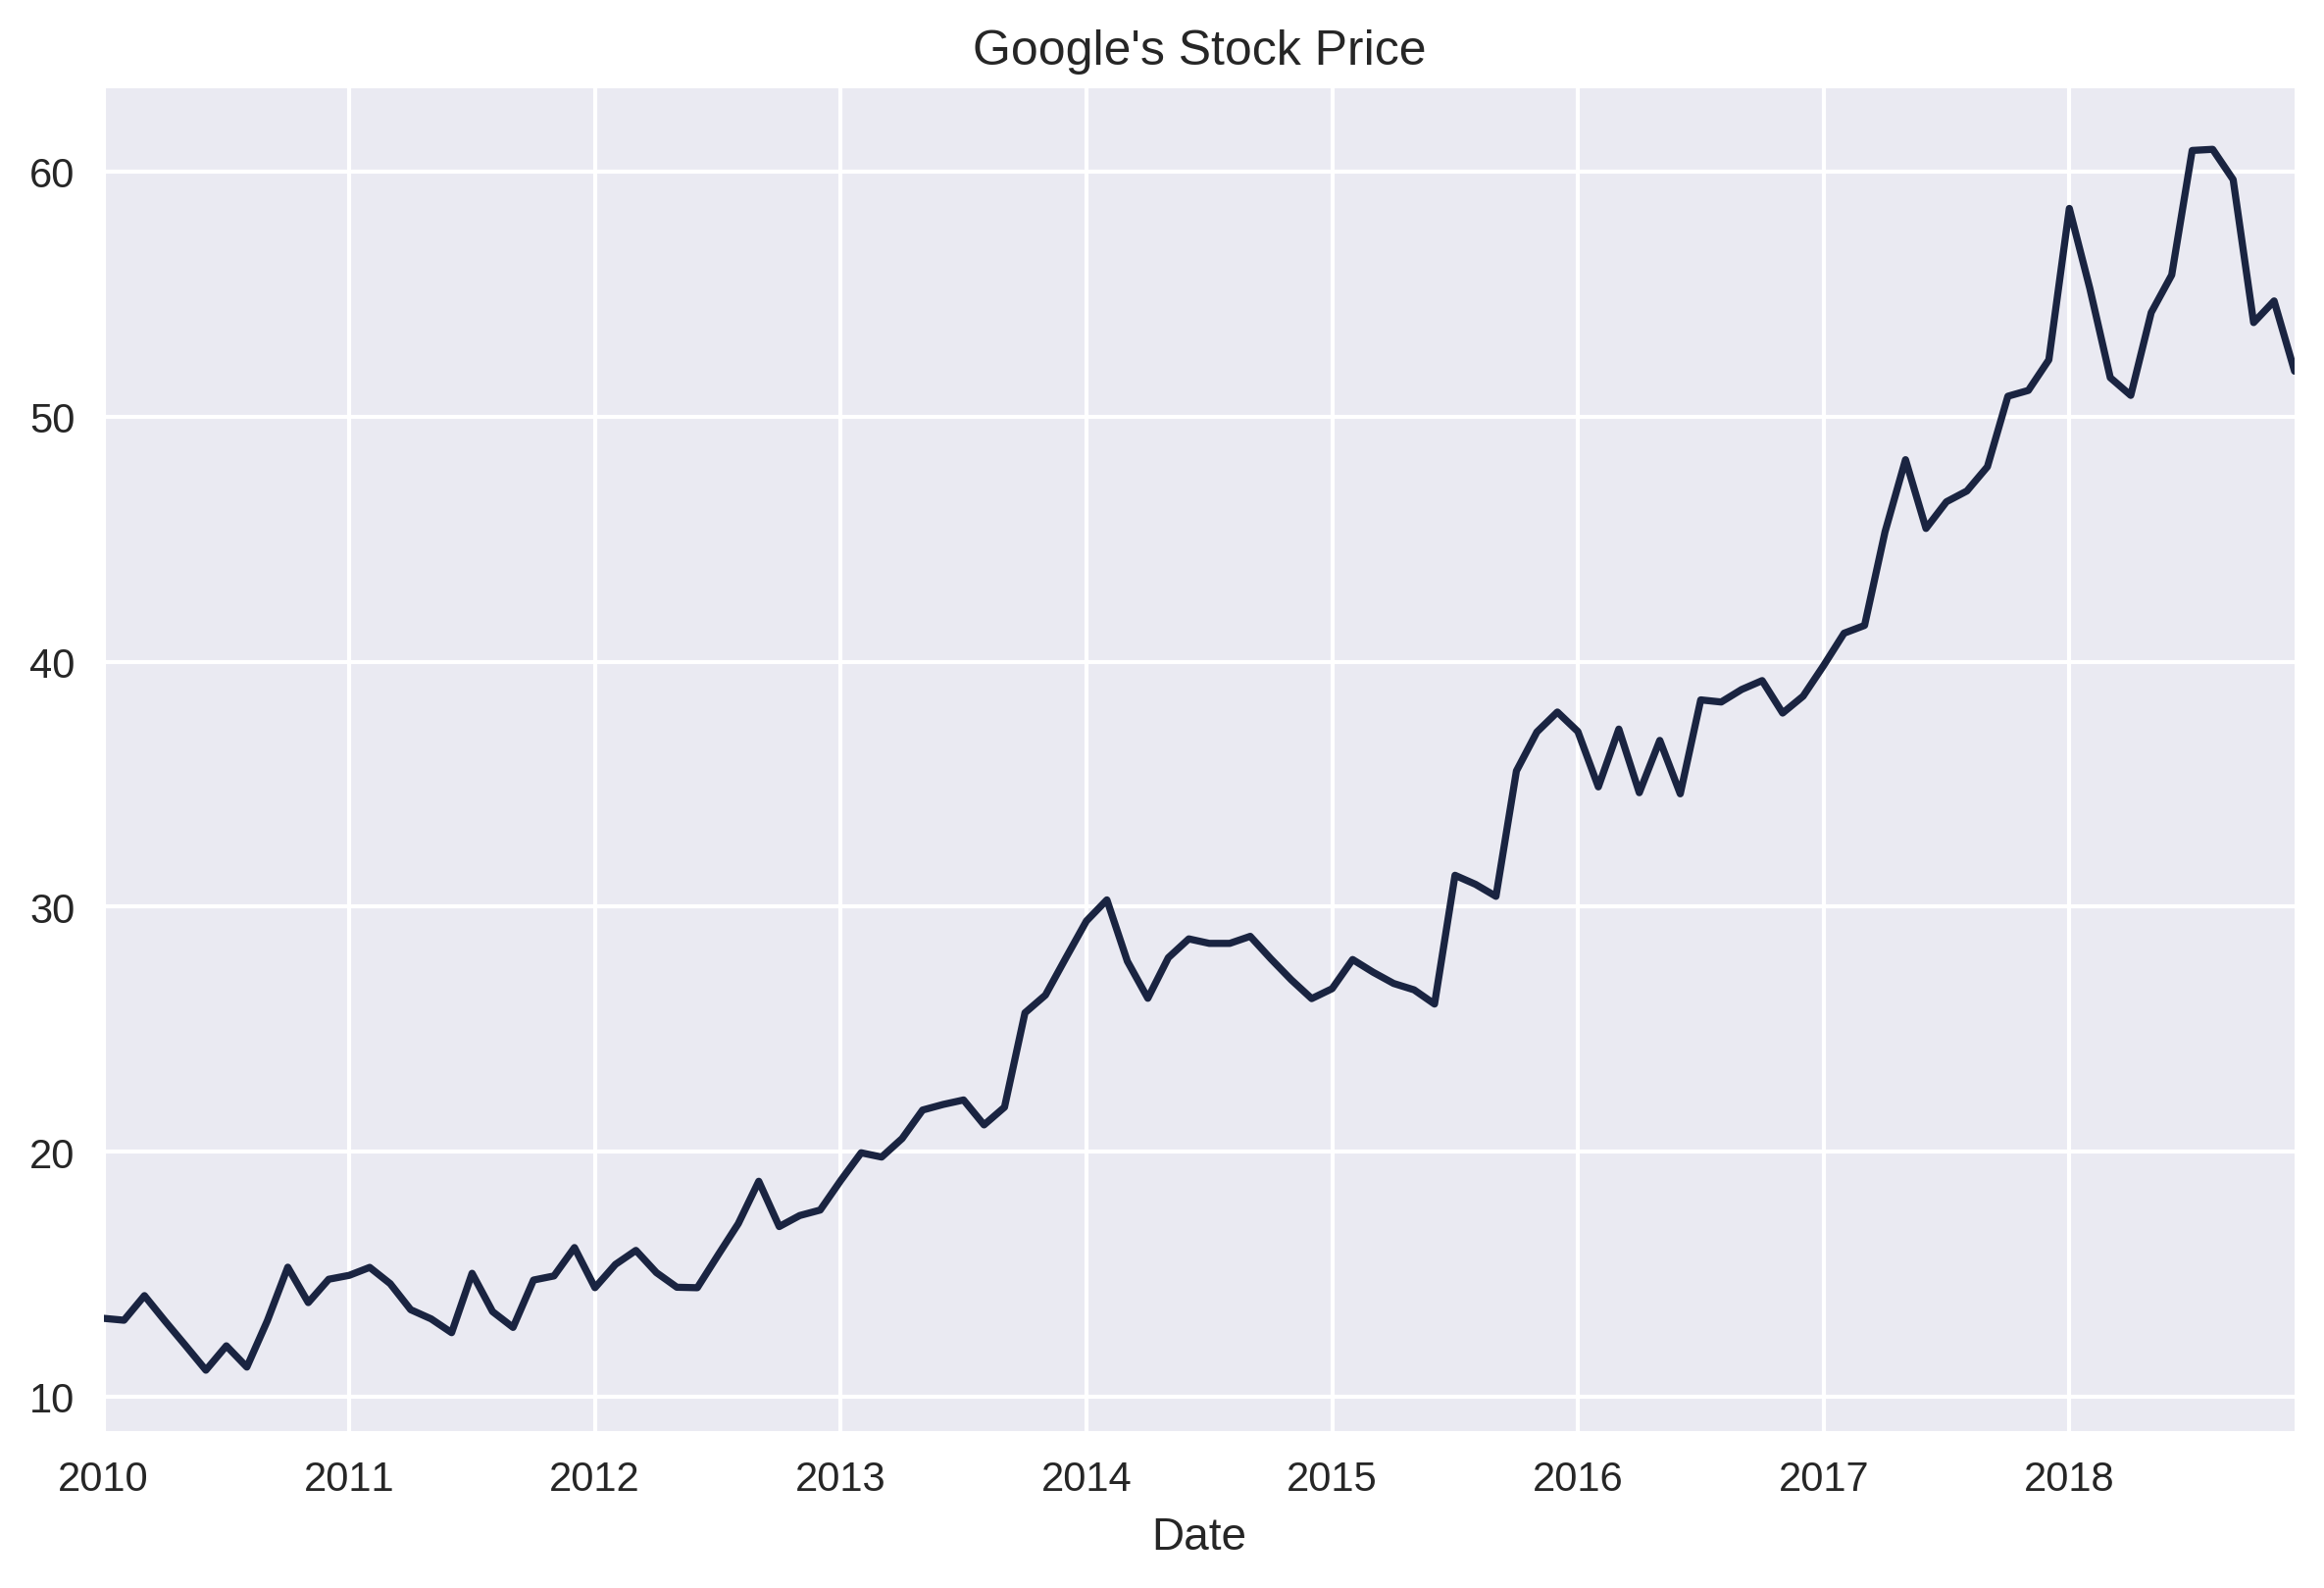

In [ ]:
# Plot the prices and add the title
goog.plot(title="Google's Stock Price")

plt.tight_layout()
plt.show()

6. Fit 3 Simple Exponential Smoothing models and create forecasts:

In [ ]:
goog_train.head()


Date
2010-01-31    13.199027
2010-02-28    13.120820
2010-03-31    14.125056
2010-04-30    13.093423
2010-05-31    12.095413
Freq: M, Name: adj_close, dtype: float64

In [ ]:
# Fit 3 Simple Exponential Smoothing models using the training data and create forecasts for prices in 2018

#For fitting, we only used the training data.
# Manually set the value of the smoothing parameter as 0.2
ses_1 = SimpleExpSmoothing(goog_train).fit(smoothing_level=0.2)
# use model 1 to create forecasts
ses_forecast_1 = ses_1.forecast(test_length)

# Manually set the value of the smoothing parameter as 0.5
ses_2 = SimpleExpSmoothing(goog_train).fit(smoothing_level=0.5)
# use model 2 to create forecasts
ses_forecast_2 = ses_2.forecast(test_length)

# Estimate model parameters by maximizing the log-likelihood
ses_3 = SimpleExpSmoothing(goog_train).fit() # `.fit()`: use `statsmodels` to select the best fit
# Get the optimal parameter alpha
alpha = ses_3.model.params['smoothing_level']
# use model 3 to create forecasts
ses_forecast_3 = ses_3.forecast(test_length)

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


Notes:

* `SimpleExpSmoothing.fit(smoothing_level=None, optimized=True)`
    * `smoothing_level`: The smoothing_level value of the simple exponential smoothing.
    * `optimized`: Estimate model parameters by maximizing the log-likelihood. This optimization is done by minimizing the sum of squared residuals (errors).
    * Returns `HoltWintersResults`
    

* `HoltWintersResults.forecast(steps=1)`
    * Out-of-sample forecasts
    * `steps`: The number of out of sample forecasts from the end of the sample.
    * It is the number of periods we want to forecast for (which is equal to the length of the test set).

7. Plot the original prices together with the models' results:

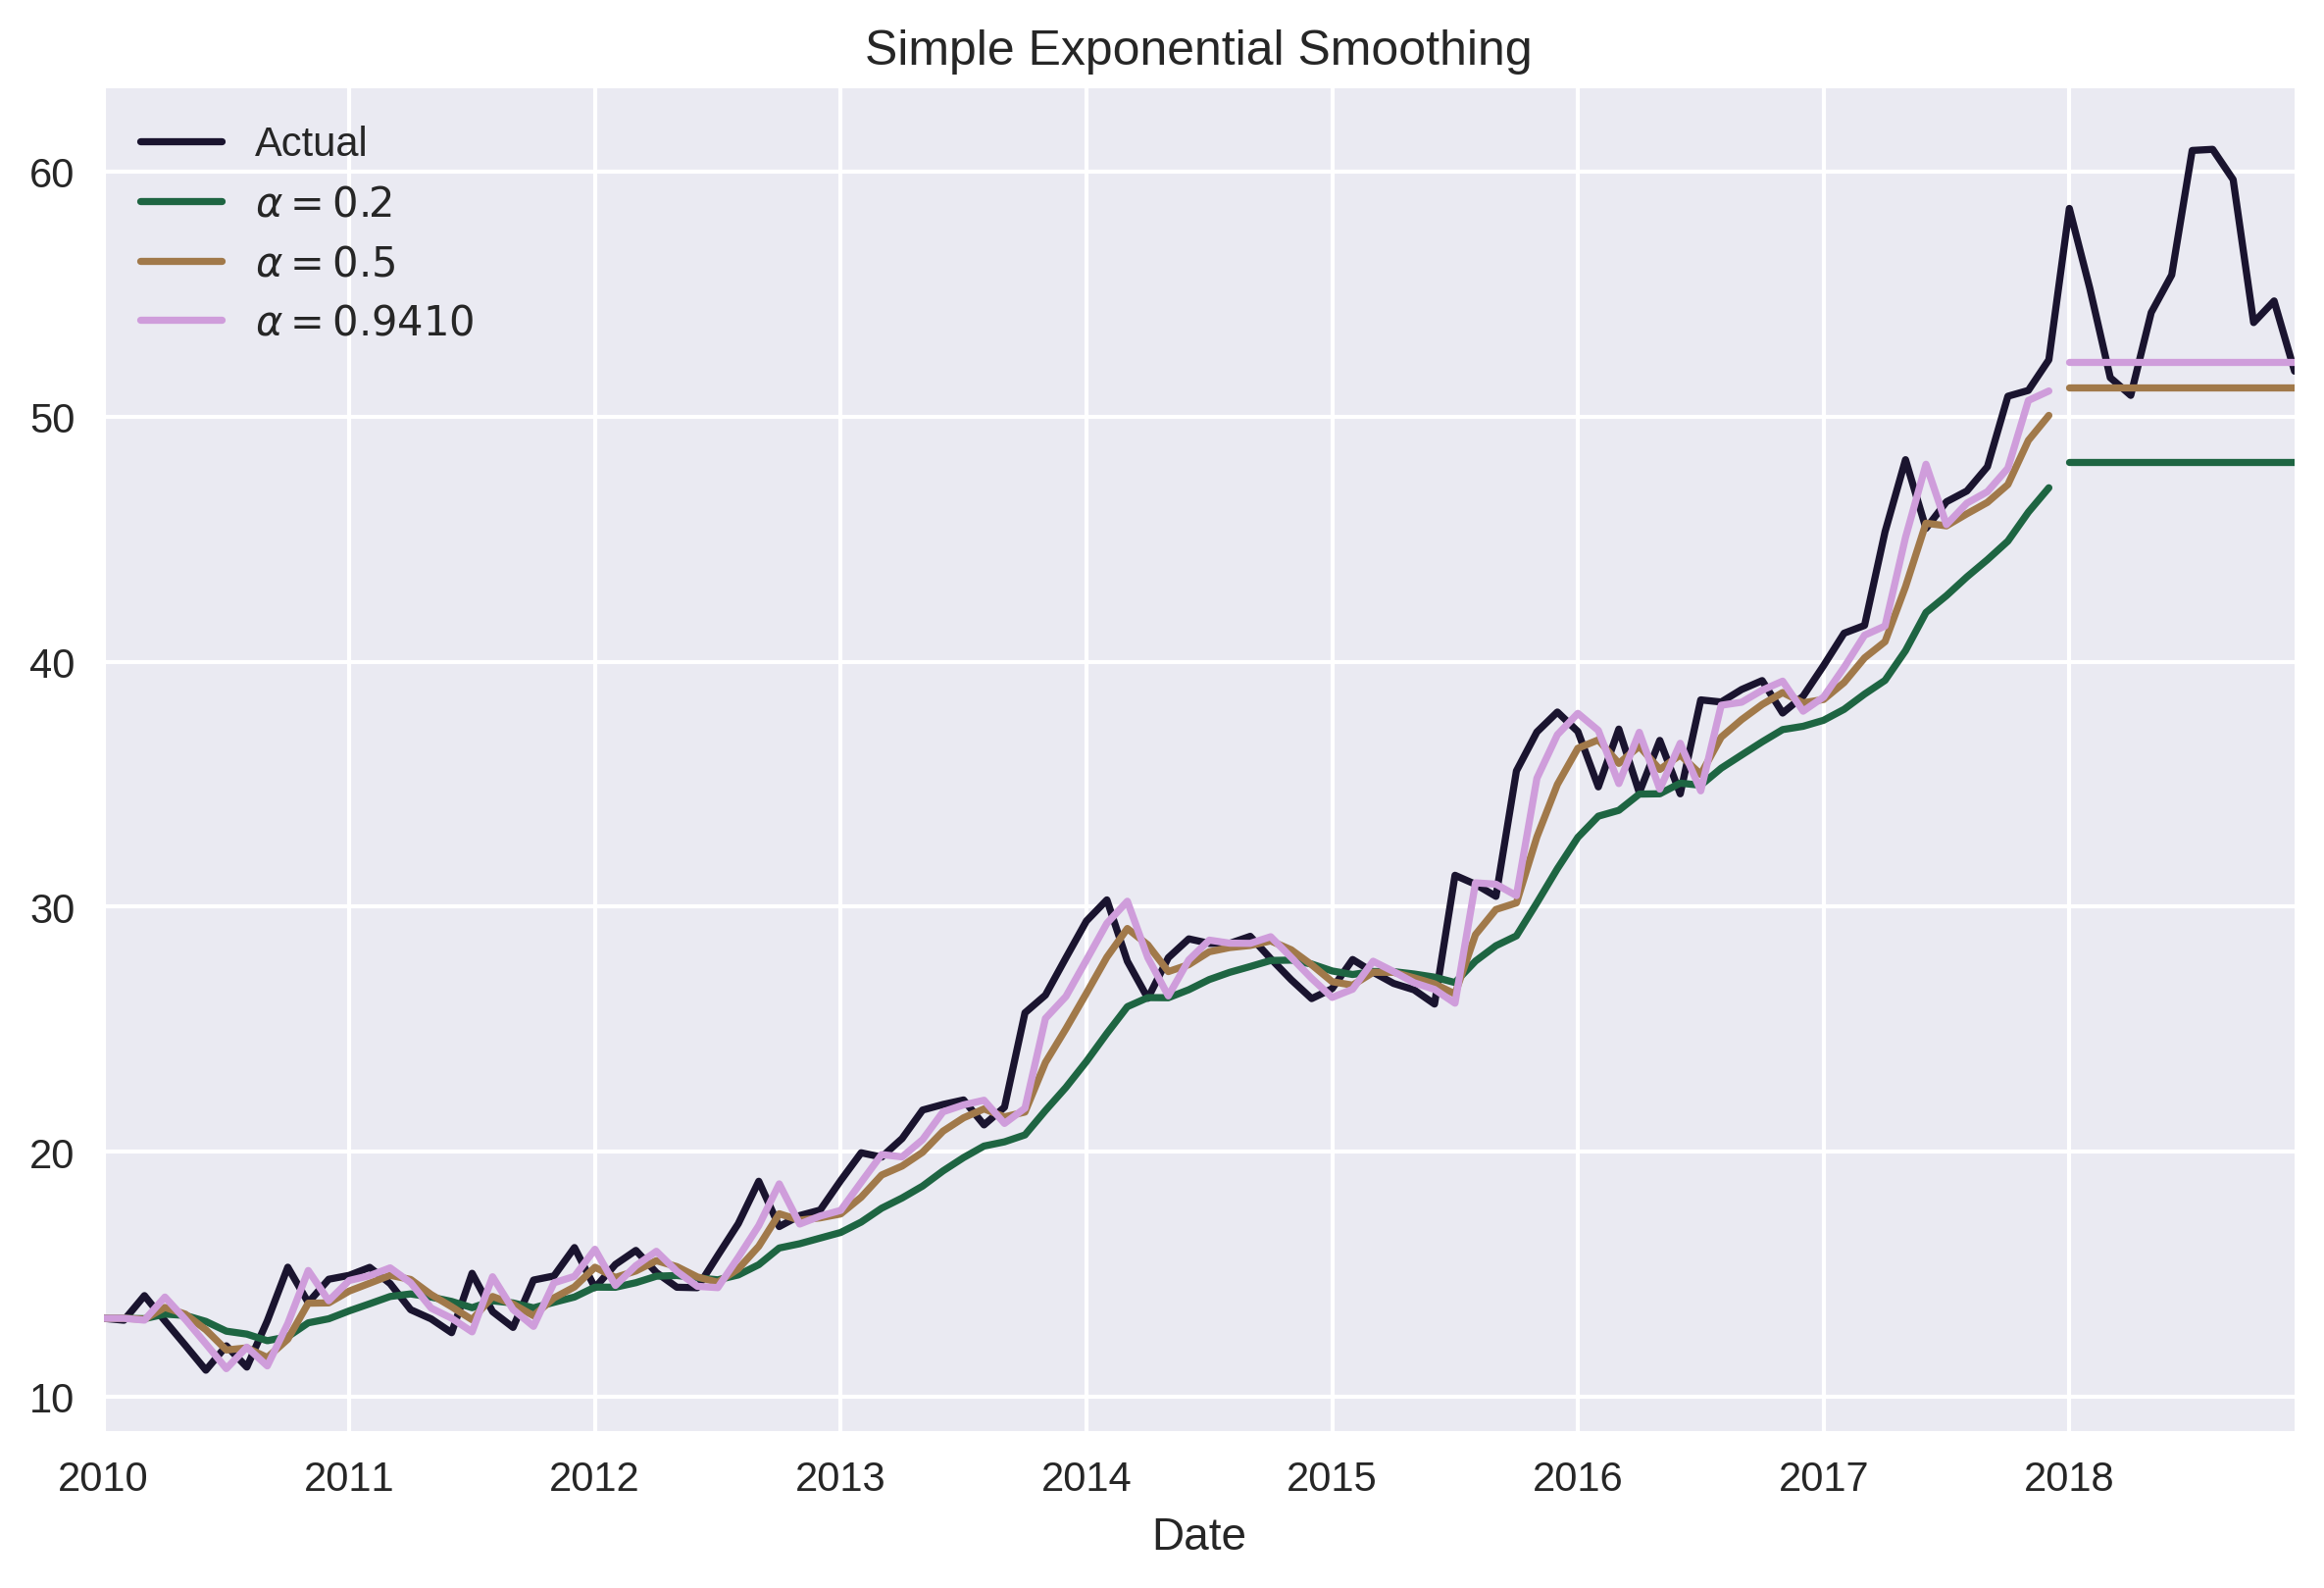

In [ ]:
# Visualize the results and compare them to the actual stock prices.
# Plot the original prices
goog.plot(color=COLORS[0],
          title='Simple Exponential Smoothing',
          label='Actual',
          legend=True)

# plot the models' results
# Extract the fitted values of the model by using the `fittedvalues` method of the fitted model.
ses_1.fittedvalues.plot(color=COLORS[1])
ses_2.fittedvalues.plot(color=COLORS[2])
ses_3.fittedvalues.plot(color=COLORS[3])

# Plot the models' forecasting results
ses_forecast_1.plot(color=COLORS[1], legend=True,
                    label=r'$\alpha=0.2$')
#ses_1.fittedvalues.plot(color=COLORS[1])

ses_forecast_2.plot(color=COLORS[2], legend=True,
                    label=r'$\alpha=0.5$')
#ses_2.fittedvalues.plot(color=COLORS[2])

ses_forecast_3.plot(color=COLORS[3], legend=True,
                    label=r'$\alpha={0:.4f}$'.format(alpha))
#ses_3.fittedvalues.plot(color=COLORS[3])

plt.tight_layout()
plt.show()

In the preceding plot, we can see the characteristic of the SES we described in the introduction to this recipe—the forecast is a flat line.

We can also see that the optimal value that was selected by the `statsmodels` optimization routine is close to 1. Additionally, the fitted line of the third model is effectively the line of the observed prices shifted to the right.

Notes:

* `r-string`
   * A raw string is prefixed with a `r` or `R`.
   * This treats characters such as backslash (‘\’) as a literal character. This also means that this character will not be treated as a escape character. It ignores escape characters.
   * You would use an `r-string` if you're passing the string into something else that uses weird characters or does its own escaping so that you don't have to worry about backslashes.

In [ ]:
print('Hello\nWorld!')
print(r'Hello\nWorld!')

Hello
World!
Hello\nWorld!


In [ ]:
from IPython.display import display, Math, Latex
display(Math('$\\alpha > \\beta$'))
display(Math(r'$\alpha > \beta$'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

8. Fit 3 variants of the Holt's Smoothing models and create forecasts:

In [ ]:
# Fit 3 variants of the Holt's Smoothing models and create forecasts
# Holt's model with linear trend
hs_1 = Holt(goog_train).fit()
# use model 1 to create forecasts
hs_forecast_1 = hs_1.forecast(test_length)

# Holt's model with exponential trend
hs_2 = Holt(goog_train, exponential=True).fit() # equivalent to ExponentialSmoothing(goog_train, trend='mul').fit()
# use model 2 to create forecasts
hs_forecast_2 = hs_2.forecast(test_length)

# Holt's model with exponential trend and damping
hs_3 = Holt(goog_train, exponential=False,
damped=True).fit(damping_slope=0.99)
hs_forecast_3 = hs_3.forecast(test_length)


#https://otexts.com/fpp2/holt.html


Notes:

* `Holt(goog_train, exponential=True)`
    * It is equivalent to `ExponentialSmoothing(goog_train, trend='mul')`.
    * `Holt` is a restricted version of class`ExponentialSmoothing`.
    * By default, the trend in the model is linear, but we can make it exponential by specifying `exponential=True` and add dampening with `damped_trend=True`.

* `.fit()`
    * Using the fit method with no arguments results in running the optimization routine to determine the optimal value of the parameter.

9. Plot the original prices together with the models' results:

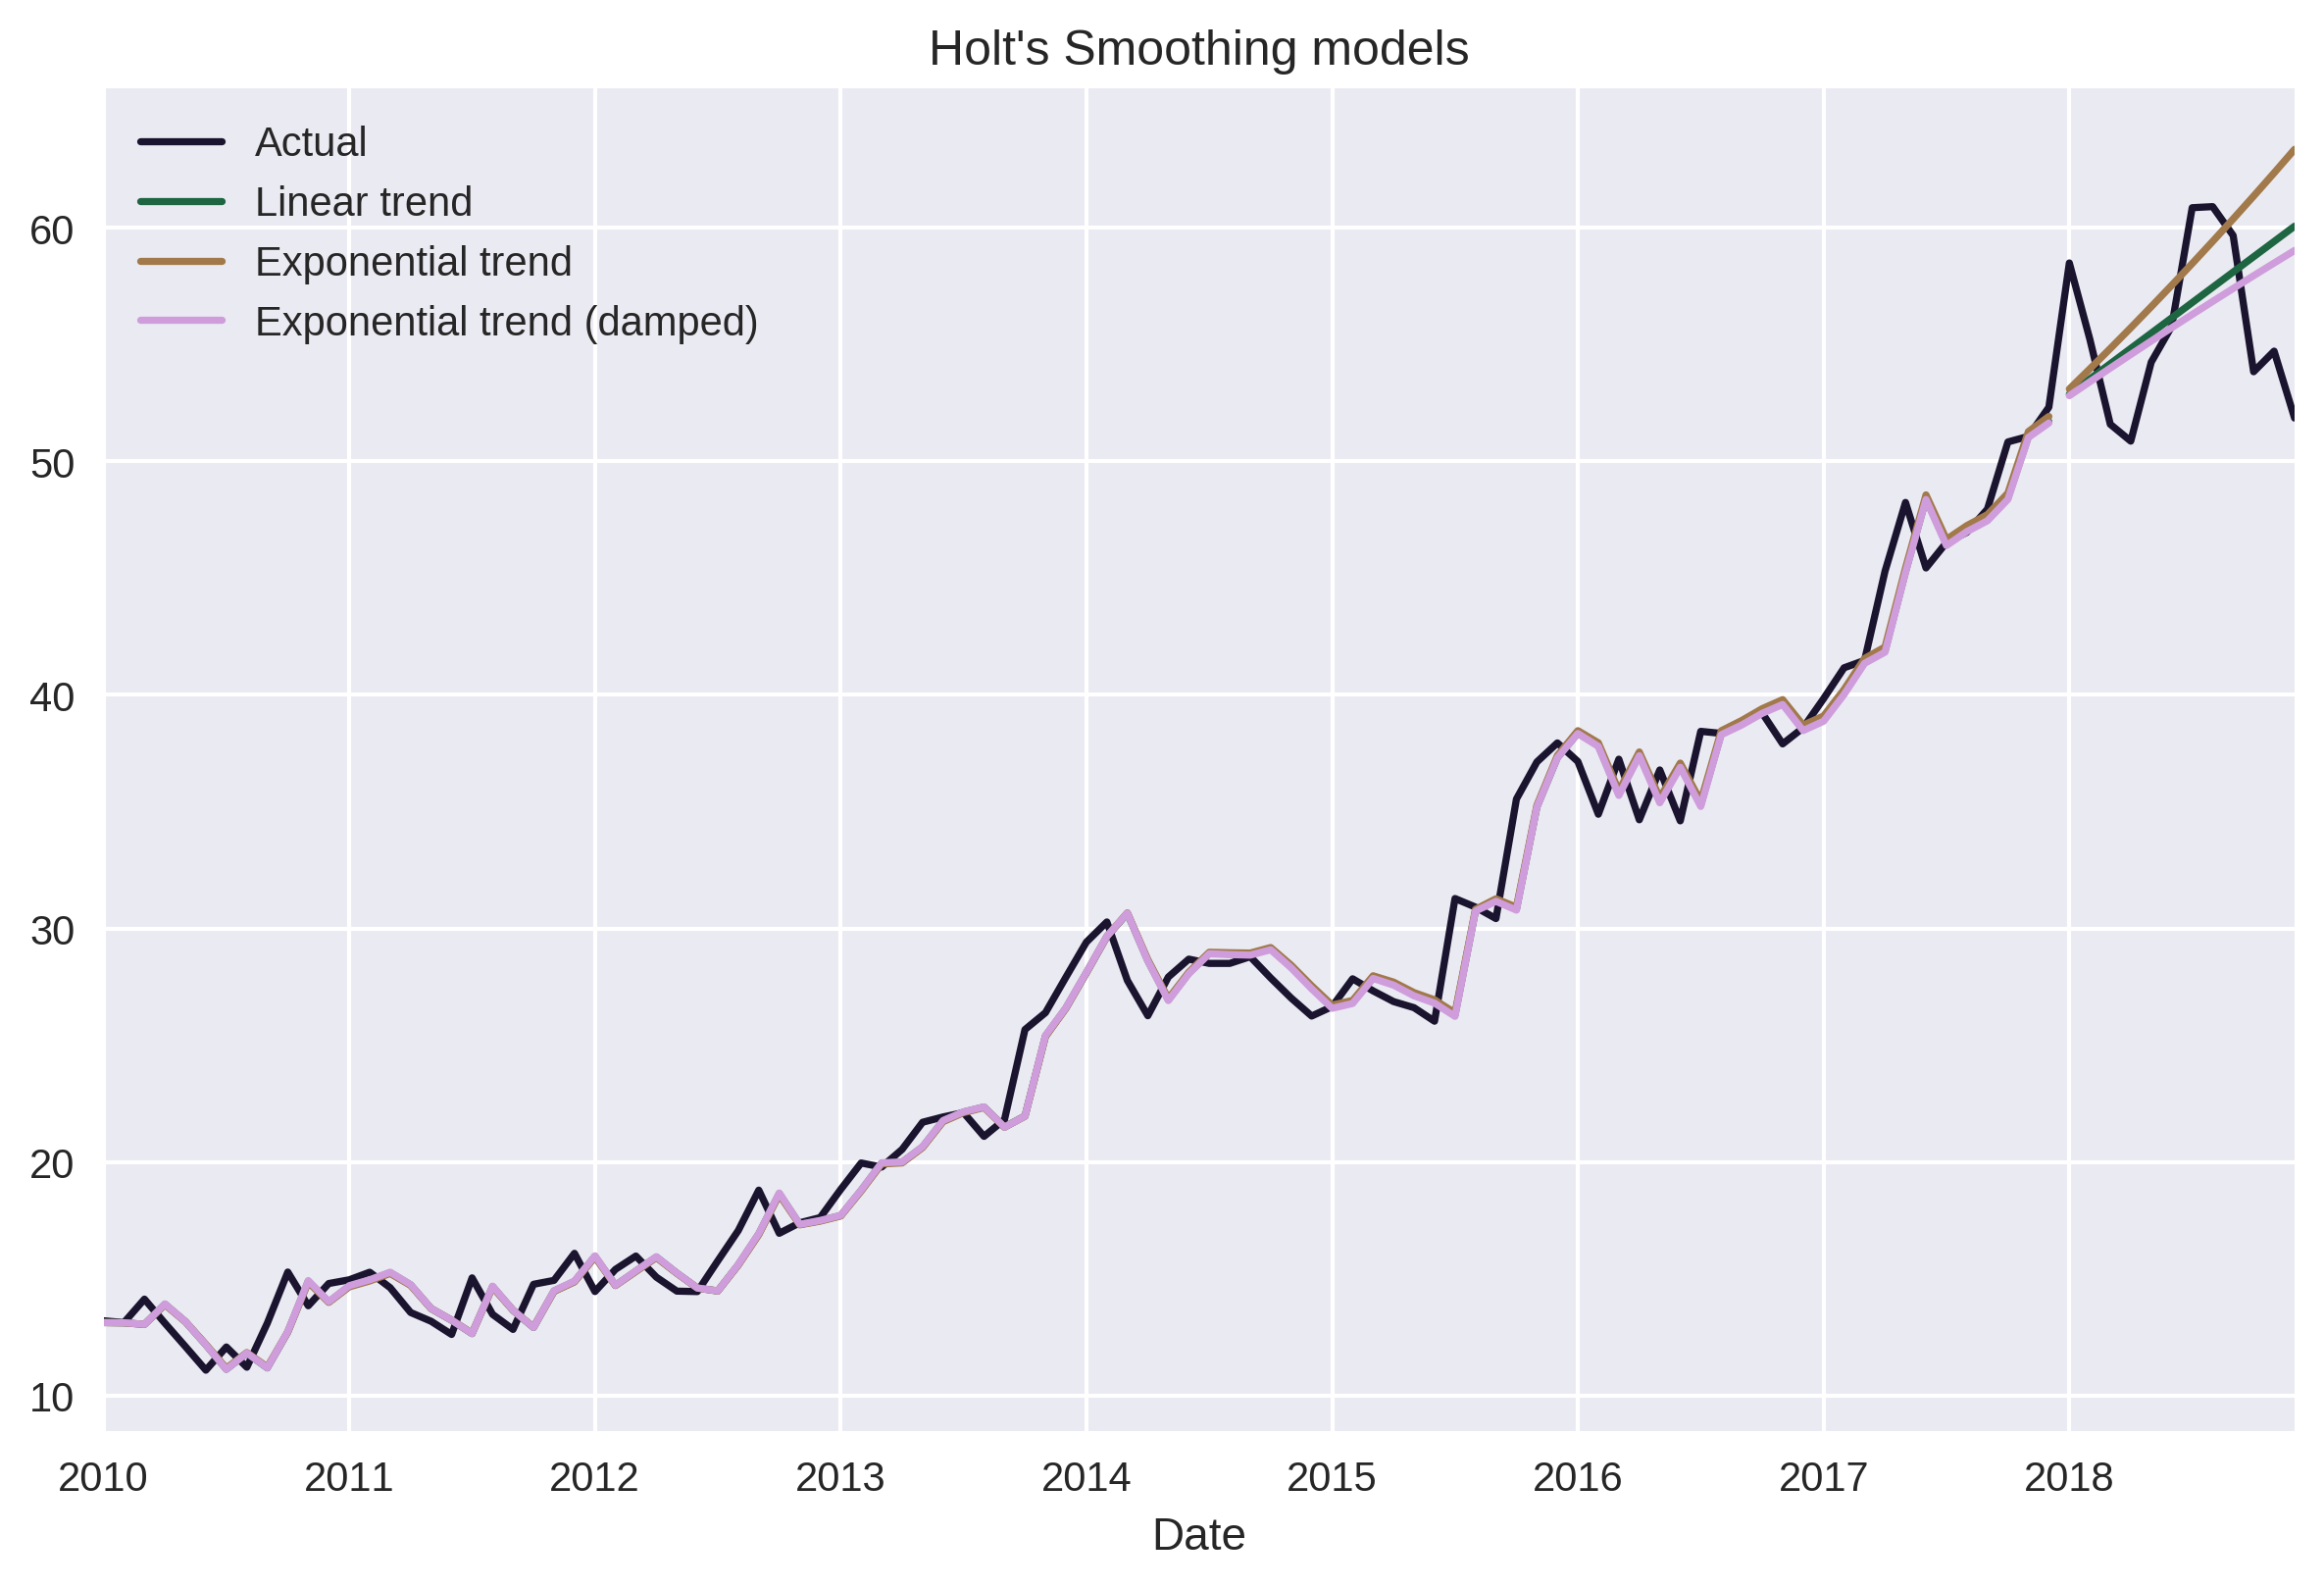

In [ ]:
# Plot the original prices
goog.plot(color=COLORS[0],
          title="Holt's Smoothing models",
          label='Actual',
          legend=True)

# Plot the models' results
hs_1.fittedvalues.plot(color=COLORS[1])
hs_2.fittedvalues.plot(color=COLORS[2])
hs_3.fittedvalues.plot(color=COLORS[3])

# Plot the models' forecasting results
hs_forecast_1.plot(color=COLORS[1], legend=True,
                   label='Linear trend')

hs_forecast_2.plot(color=COLORS[2], legend=True,
                   label='Exponential trend')

#hs_3.fittedvalues.plot(color=COLORS[3])
hs_forecast_3.plot(color=COLORS[3], legend=True,
                   label='Exponential trend (damped)')

plt.tight_layout()
plt.show()


We can already observe an improvement since the lines are not flat anymore, as compared to SES.

Summary:

1. In Steps 2 to 5, we downloaded Google's stock prices from 2010-2018, resampled the values to a monthly frequency, split the data into training (2010-2017) and test (2018) sets, and plotted the series.

2. In Step 6, we fitted three different SES models using the `SimpleExpSmoothing` class and its `fit` method. For fitting, we only used the training data. We could have manually selected the value of the smoothing parameter (`smoothing_level`), however, the best practice is to let `statsmodels` optimize it for the best fit. We created the forecasts using the `forecast` method.

3. In Step 7, we visualized the results and compared them to the actual stock prices. We extracted the fitted values of the model by using the `fittedvalues` method of the fitted model.

4. In Step 8, we used the `Holt` class (which is a wrapper around the more general `ExponentialSmoothing` class) to fit Holt's linear trend model. By default, the trend in the model is linear, but we can make it exponential by specifying `exponential=True` and add dampening with `damped_trend=True`. As in the case of SES, using the `fit` method with no arguments results in running the optimization routine to determine the optimal value of the parameter. We can access it by running `fitted_model.params.` In our example, we manually specified the value of the dampening parameter to be 0.99, as the optimizer selected 1 to be the optimal value, and this would be indistinguishable on the plot.

5. In Step 9, we visualized the results.

### There's more...

There is an extension of Holt's method called **Holt-Winter's Seasonal Smoothing**. It accounts for seasonality in the time series. There is no separate class for this model, but we can tune the `ExponentialSmoothing` class by adding the `seasonal` and `seasonal_periods` arguments.

* `ExponentialSmoothing(endog,trend=None,damped_trend=False,seasonal=None,seasonal_periods=None)`
    * By adding the `seasonal` and `seasonal_periods` arguments, this method is most suitable for data with trend and seasonality.
    * `endog` : *array_like*. The time series to model.
    * `trend` : *{"add", "mul", "additive", "multiplicative", None}, optional*. Type of trend component.
    * `damped_trend` : *bool, optional*. Should the trend component be damped.
    * `seasonal` : *{"add", "mul", "additive", "multiplicative", None}, optional*. Type of seasonal component.
    * `seasonal_periods` : *int, optional*. The number of periods in a complete seasonal cycle, e.g., 4 for quarterly data or 7 for daily data with a weekly cycle.

There are two variants of this model and they have either additive or multiplicative seasonalities. In the former one, the seasonal variations are more or less constant throughout the time series. In the latter one, the variations change in proportion to the passing of time.

In [ ]:
# set the seasonal period as 12 months
SEASONAL_PERIODS = 12

# Holt-Winter's model with exponential trend
hw_1 = ExponentialSmoothing(goog_train,
                            trend='mul',
                            seasonal='add',
                            seasonal_periods=SEASONAL_PERIODS).fit()
# use model 1 to make predictions
hw_forecast_1 = hw_1.forecast(test_length)

# Holt-Winter's model with exponential trend and damping
hw_2 = ExponentialSmoothing(goog_train,
                            trend='mul',
                            seasonal='add',
                            seasonal_periods=SEASONAL_PERIODS,
                            damped_trend=True).fit()
# use model 2 to make predictions
hw_forecast_2 = hw_2.forecast(test_length)

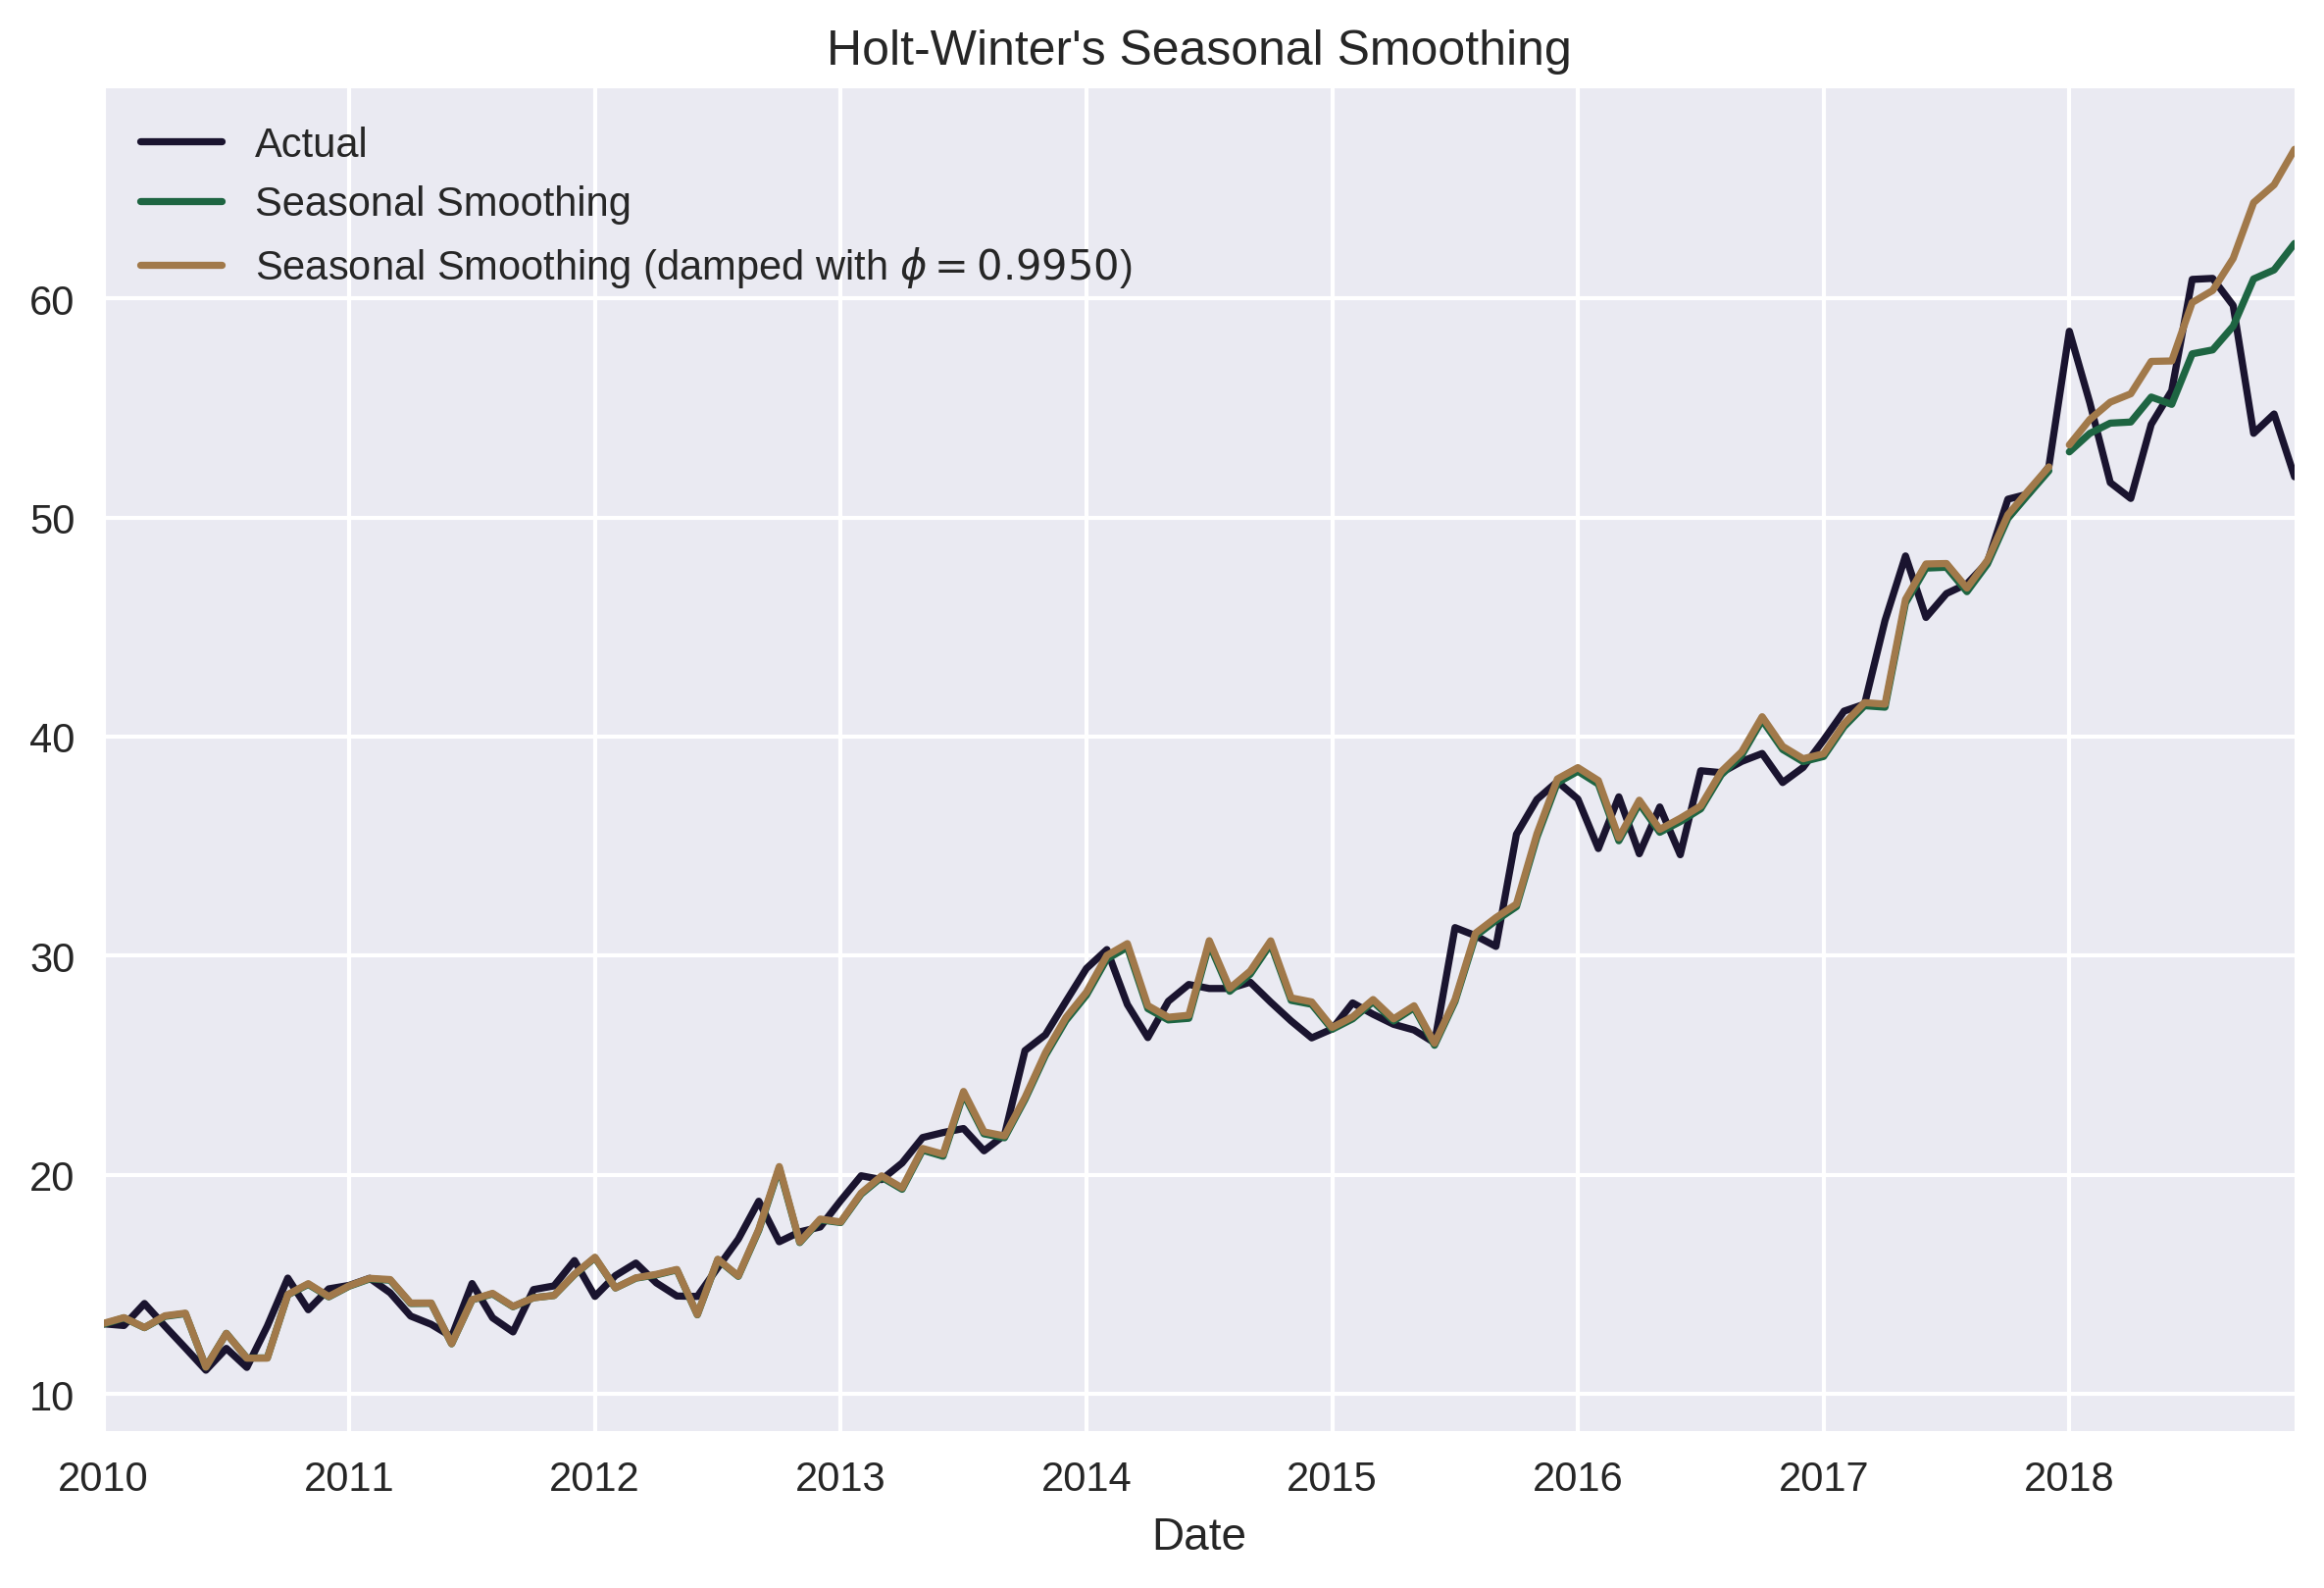

In [ ]:
goog.plot(color=COLORS[0],
          title="Holt-Winter's Seasonal Smoothing",
          label='Actual',
          legend=True)

# plot the models' result
hw_1.fittedvalues.plot(color=COLORS[1])
hw_2.fittedvalues.plot(color=COLORS[2])

hw_forecast_1.plot(color=COLORS[1], legend=True,
                   label='Seasonal Smoothing')

phi = hw_2.model.params['damping_trend']
plot_label = f'Seasonal Smoothing (damped with $\phi={phi:.4f}$)'

#hw_2.fittedvalues.plot(color=COLORS[2])
hw_forecast_2.plot(color=COLORS[2], legend=True,
                   label=plot_label)

plt.tight_layout()
plt.show()

From the plotted forecasts, we can see that the model is more flexible in comparison to SES and Holt's linear trend models.

The extreme fitted values at the beginning of the series are a result of not having enough observations to look back on (we selected `seasonal_periods=12` as we are dealing with monthly data).

## 3.6 Modeling time series with ARIMA class models

ARIMA models are a class of statistical models that are used for analyzing and forecasting time series data. They aim to do so by describing the autocorrelations in the data. ARIMA stands for Autoregressive Integrated Moving Average and is an extension of a simpler ARMA model.

The goal of the additional integration component is to ensure stationarity of the series, because, in contrast to the exponential smoothing models, the ARIMA class requires the time series to be stationary. In the next few paragraphs, we briefly go over the building blocks of ARIMA models.

**AR (autoregressive) model:**

* This kind of model uses the relationship between an observation and its lagged values.
* In the financial context, the autoregressive model tries to account for the momentum and mean reversion effects.

**I (integration):**

* Integration, in this case, refers to differencing the original time series (subtracting the value from the previous period from the current period's value) to make it stationary.
* The parameter responsible for integration is d (called degree/order of differencing) and indicates the number of times we need to apply differencing.

**MA (moving average) model:**

* This kind of model uses the relationship between an observation and the white noise terms (shocks that occurred in the last q observations).
* In the financial context, the moving average models try to account for the unpredictable shocks (observed in the residuals) that influence the observed time series. Some examples of such shocks could be natural disasters, breaking news connected to a certain company, and so on.

All of these components fit together and are directly specified in the commonly used notation known as ARIMA (p,d,q).

    By setting the parameters of the ARIMA model, we can obtain some special cases:
    - ARIMA (0,0,0): White noise
    - ARIMA (0,1,0) without constant: Random walk
    - ARIMA (p,0,q): ARMA(p, q)
    - ARIMA (p, 0, 0): AR(p) model
    - ARIMA (0, 0, q): MA(q) model
    - ARIMA (0,1,2): Damped Holt's model
    - ARIMA (0,1,1) without constant: SES model
    - ARIMA (0,2,2): Holt's linear method with additive errors

One of the known weaknesses of the ARIMA class models in the financial context is their inability to capture volatility clustering that is observed in most of the financial assets.

In this recipe, we go through all the necessary steps to correctly estimate an ARIMA model and learn how to verify that it is a proper fit to the data. For this example, we use Google's weekly stock prices from 2015-2018.

### How to do it...

1. Import the libraries:

In [ ]:
# Import the libraries
import yfinance as yf
import pandas as pd
import numpy as np
#from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox
import scipy.stats as scs
from chapter_3_utils import test_autocorrelation

Notes:
* `scipy`
    * SciPy (pronounced “Sigh Pie”) is a Python-based ecosystem of open-source software for mathematics, science, and engineering.

2. Download Google's stock prices and resample to weekly frequency:

In [ ]:
# Download Google's stock prices
df = yf.download('GOOG',
                 start='2015-01-01',
                 end='2018-12-31',
                 #adjusted=True,
                 progress=False)

# resample to weekly frequency and choose the last available price per month
goog = df.resample('W') \
         .last() \
         .rename(columns={'Adj Close': 'adj_close'}) \
         .adj_close

3. Apply the first differences to the price series and plot them together:

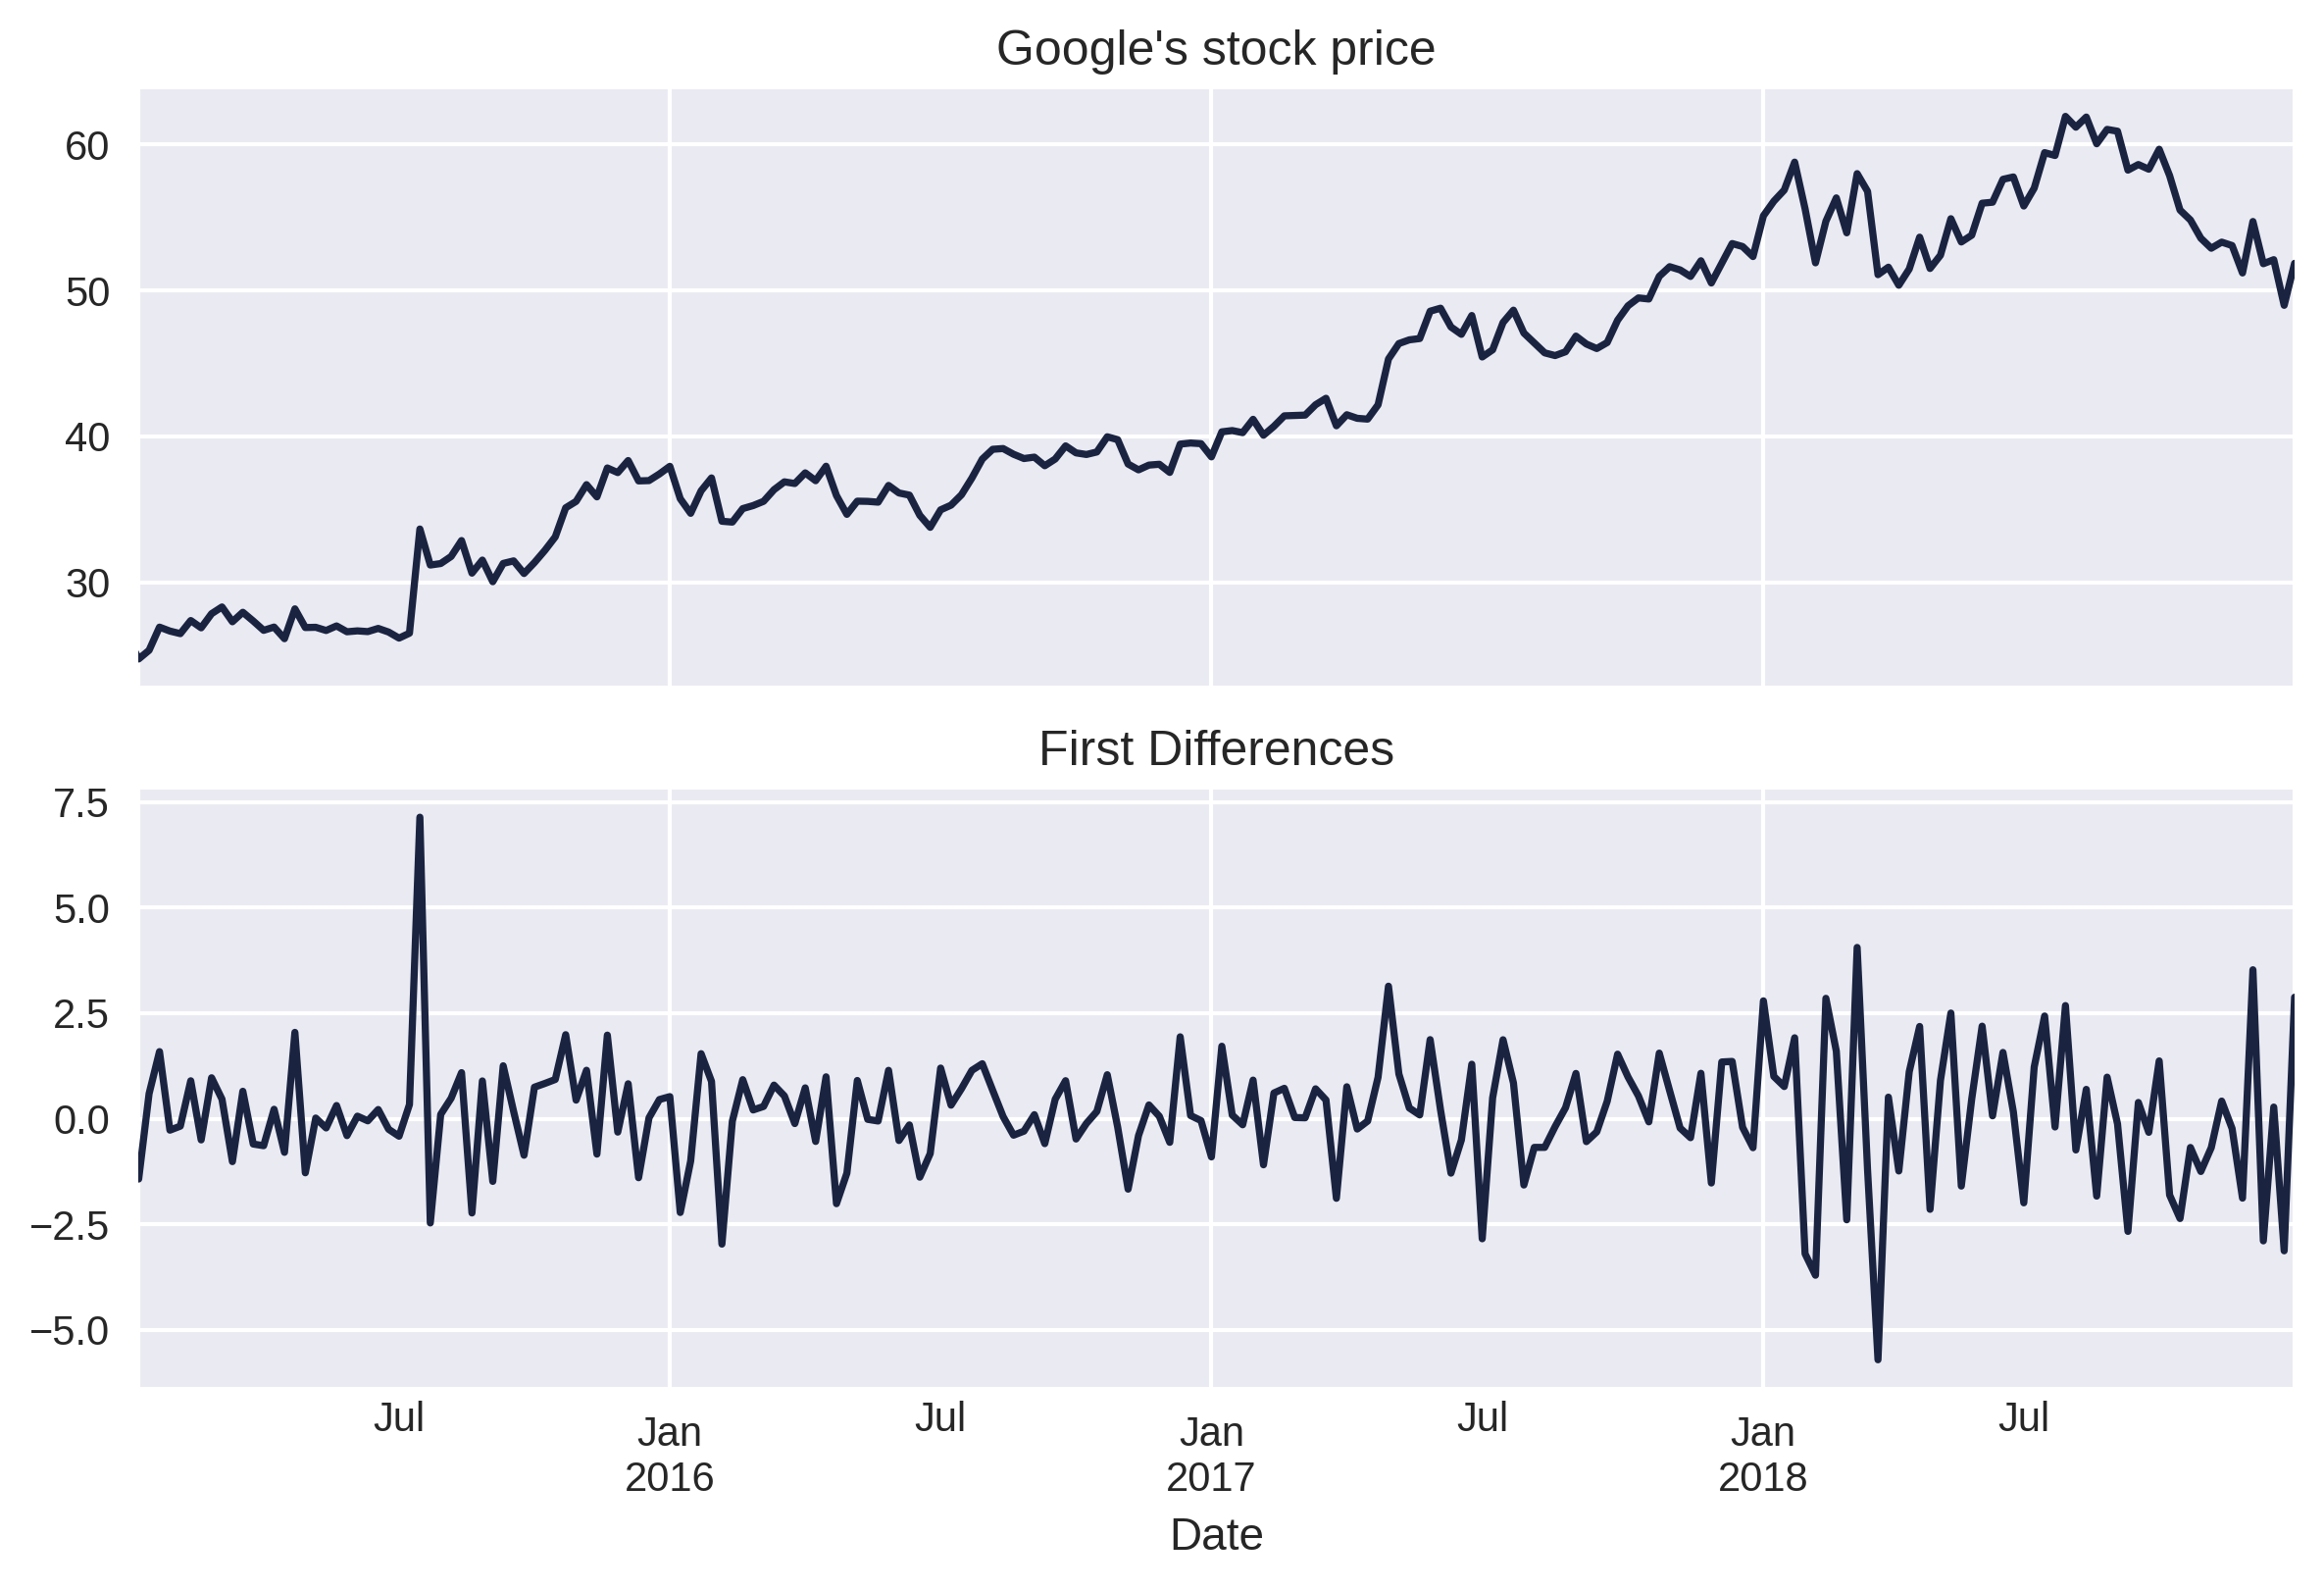

In [ ]:
# Apply the first differences to the price series and drop NaNs caused by differencing
goog_diff = goog.diff().dropna()

fig, ax = plt.subplots(2, sharex=True) # x-axis will be shared among all subplots.
goog.plot(title = "Google's stock price", ax=ax[0]) # plot the original price on the first subplot
goog_diff.plot(title='First Differences',ax=ax[1]) # plot the first differencing price on the second subplot

plt.tight_layout()
plt.show()

Remarks:

* In the above plot, we can see a more or less linear trend in Google's stock price, which indicates non-stationarity.

Notes:

* If we want to difference a given series more than once, we should use the `np.diff` function as it implements recursive differencing. Using the `diff` method of a `DataFrame/Series` with `periods > 1` results in taking the difference between the current observations and the one from that many periods before.

In [ ]:
# diff()
example=pd.Series(list(range(1, 10, 2)))
print(example)
print(example.diff(2))

0    1
1    3
2    5
3    7
4    9
dtype: int64
0    NaN
1    NaN
2    4.0
3    4.0
4    4.0
dtype: float64


4. Test the differenced series for stationarity:

ADF test statistic: -12.79 (p-val: 0.00)
KPSS test statistic: 0.08 (p-val: 0.10)


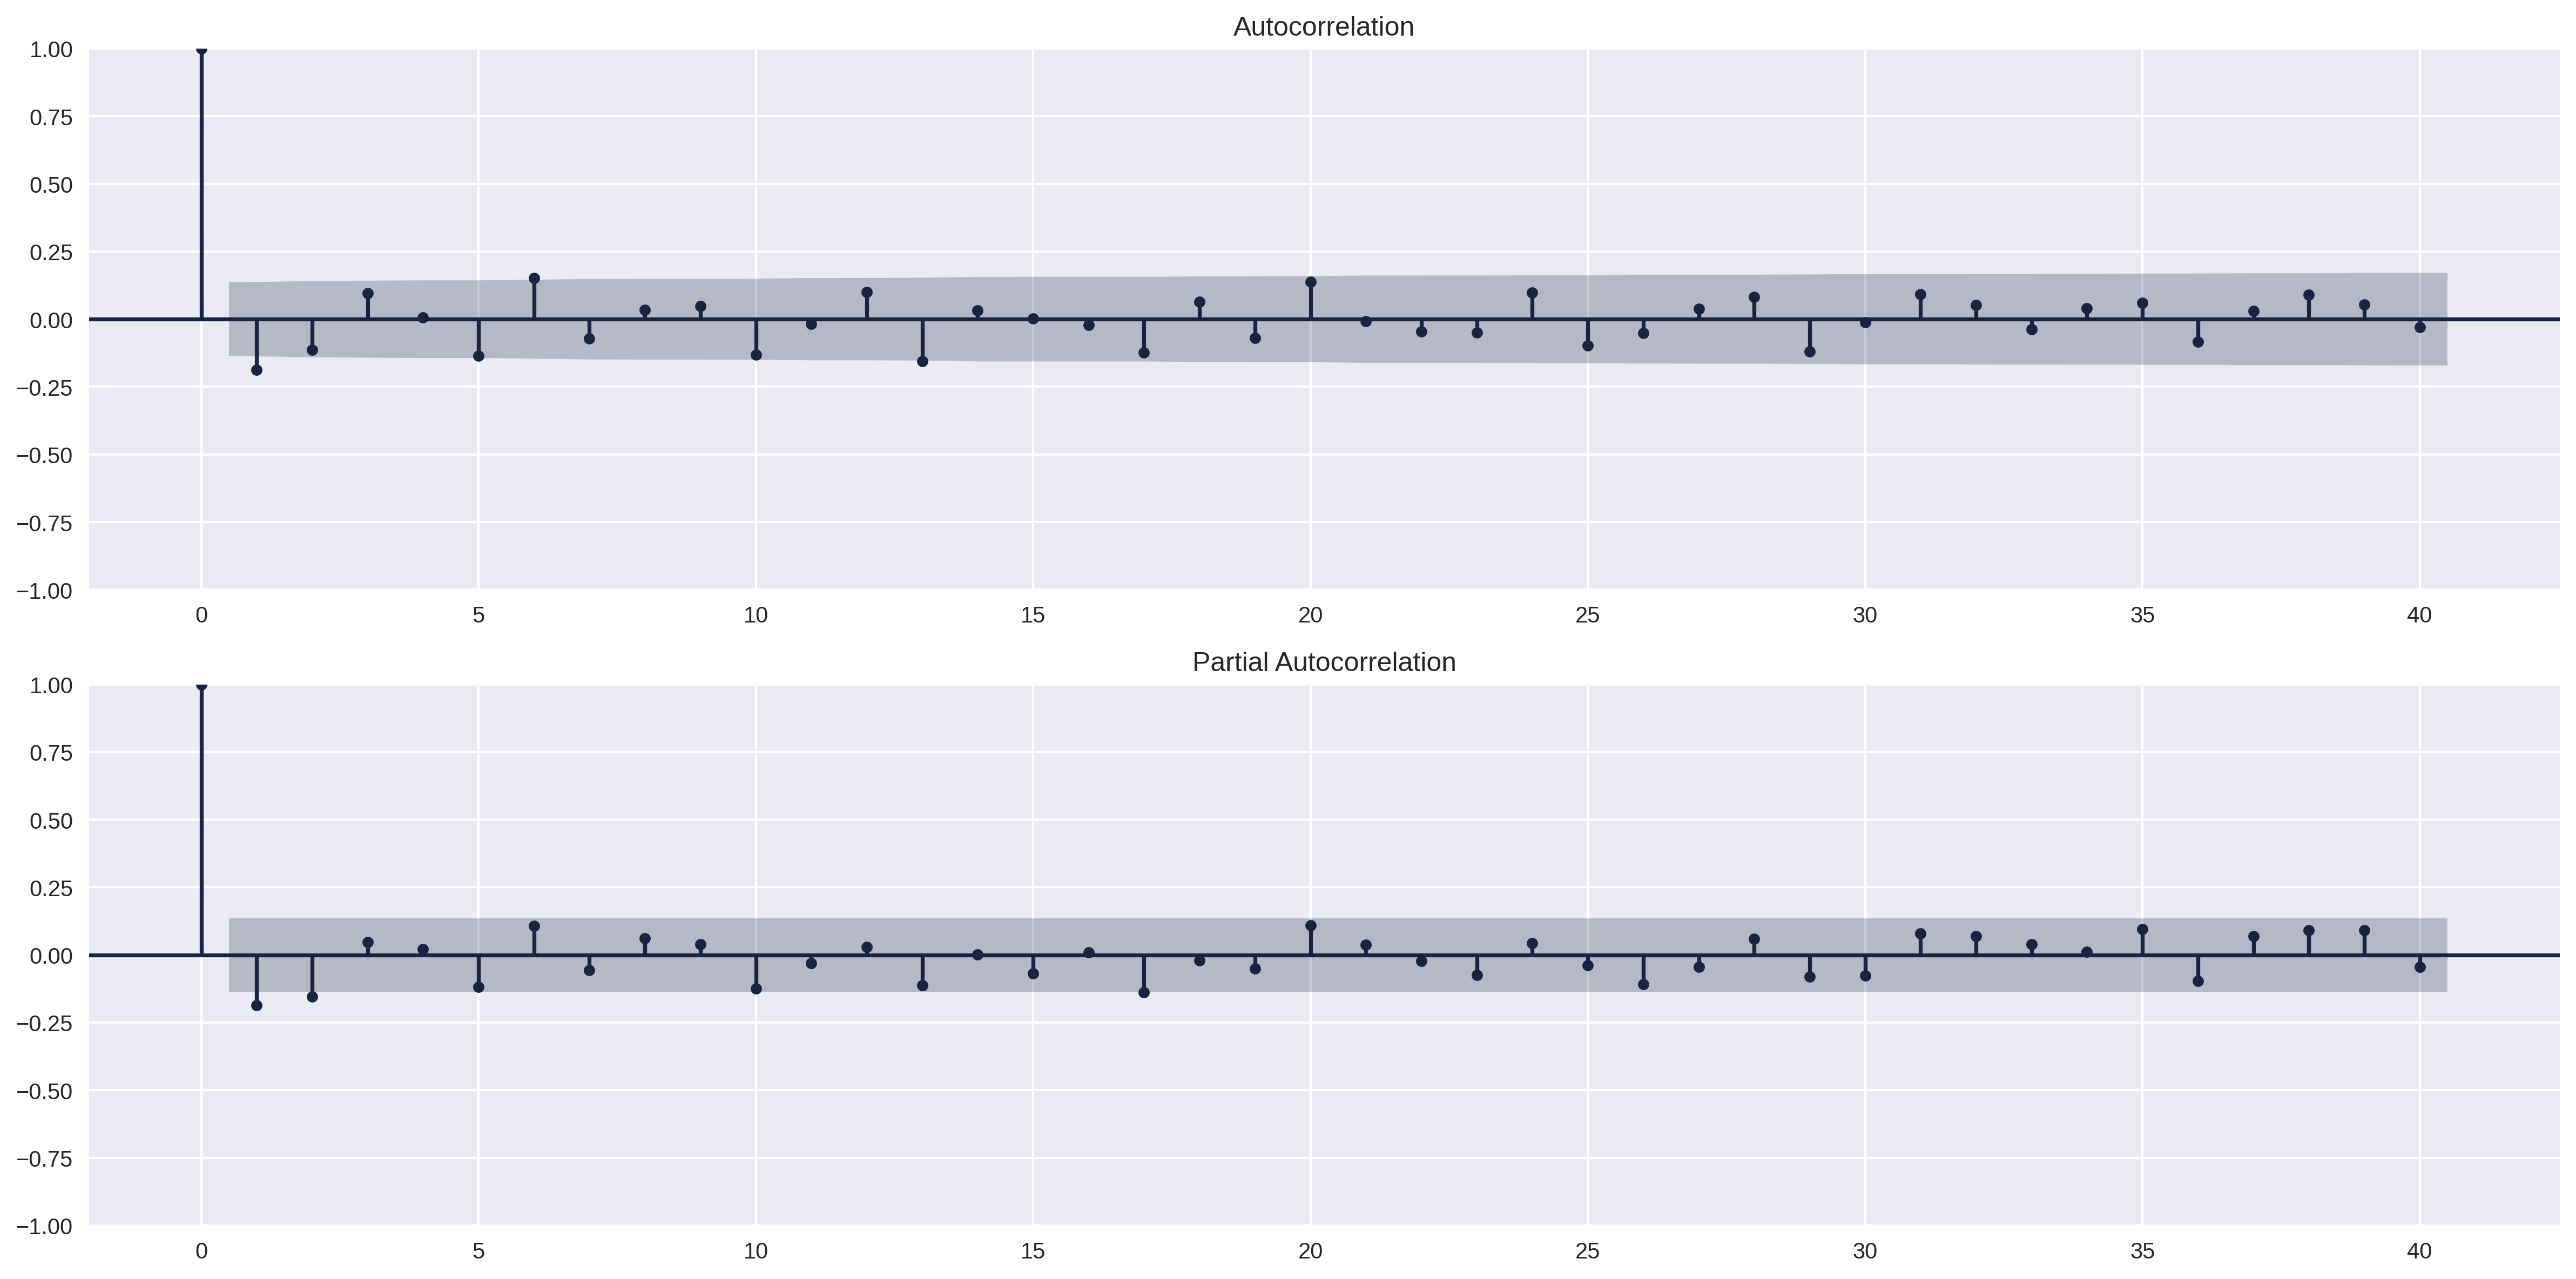

In [ ]:
# Test the differenced series for stationarity
fig = test_autocorrelation(goog_diff) # Use the help function `test_autocorrelation`

plt.tight_layout()
plt.show()

Remarks:

The results indicate that the differenced prices are stationary. So the order of integration was d=1.

As the last lag after the PACF function crossed the confidence interval, the suggested lag order (p) was p=2.

Analogically, for the moving average order, we looked at the ACF plot to determine q=1.

Hence, the model should be ARIMA(2,1,1).

5. Based on the results of the tests, specify the ARIMA model and fit it to the data:

In [ ]:
arima = ARIMA(goog, order=(2, 1, 1)).fit()
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              adj_close   No. Observations:                  209
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -365.554
Date:                Wed, 21 Feb 2024   AIC                            739.108
Time:                        11:05:50   BIC                            752.458
Sample:                    01-04-2015   HQIC                           744.506
                         - 12-30-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4062      0.397     -1.024      0.306      -1.184       0.371
ar.L2         -0.1833      0.082     -2.241      0.025      -0.344      -0.023
ma.L1          0.2051      0.405      0.507      0.612      -0.588       0.999
sigma2         1.9673      0.122     16.108      0.000       1.728       2.207
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               107.22
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               1.81   Skew:                             0.11
Prob(H) (two-sided):                  0.02   Kurtosis:                         6.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

6. Prepare a function for diagnosing the fit of the model based on its residuals:

In [ ]:
# Prepare a function for diagnosing the fit of the model based on its residuals
def arima_diagnostics(resids, n_lags=40):
    '''
    Function for diagnosing the fit of an ARIMA model by investigating the residuals.

    Parameters
    ----------
    resids : np.array
        An array containing the residuals of a fitted model
    n_lags : int
        Number of lags for autocorrelation plot

    Returns
    -------
    fig : matplotlib.figure.Figure
        Created figure
    '''

    # create a figure and a placeholder subplots
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

    r = resids
    # calculate the standardized residuals
    resids = (r - np.nanmean(r)) / np.nanstd(r)
    resids_nonmissing = resids[~(np.isnan(resids))]

    # plot residuals over time
    sns.lineplot(x=np.arange(len(resids)), y=resids, ax=ax1)
    ax1.set_title('Standardized residuals')

    # normal distribution
    x_lim = (-1.96 * 2, 1.96 * 2)
    r_range = np.linspace(x_lim[0], x_lim[1]) # generate a sequence of 50 numbers (by default) evenly spaced over the interval
    # probability density function evaluated at x and return a 1d-array
    norm_pdf = scs.norm.pdf(r_range)

    # plot distribution of residuals
    sns.distplot(resids_nonmissing, hist=True, kde=True, # plot a normed histogram and a gaussian kernel density estimate
                 norm_hist=True, ax=ax2)
    # plot normal distribution
    ax2.plot(r_range, norm_pdf, 'g', lw=2, label='N(0,1)') # 'g' means color green  `lw` means linewidth
    ax2.set_title('Distribution of standardized residuals') # set the title
    ax2.set_xlim(x_lim) # set the x-axis view limits
    ax2.legend() # place a legend on the axes

    # Q-Q plot
    qq = sm.qqplot(resids_nonmissing, line='s', ax=ax3) #line='s': standardized line
    ax3.set_title('Q-Q plot')

    # ACF plot
    plot_acf(resids, ax=ax4, lags=n_lags, alpha=0.05) # alpha: significance level
    ax4.set_title('ACF plot')

    return fig

Notes:

* `scipy.stats.distplot(a, hist=True, kde=True, norm_hist=True, ax=ax2)`
    * `a`: *Series, 1d-array, or list*. Observed data. If this is a Series object with a name attribute, the name will be used to label the data axis.
    * `hist`: *bool, optional*. Whether to plot a (normed) histogram.
    * `kde`: *bool, optional*. Whether to plot a gaussian kernel density estimate.
    * `norm_hist`: *bool, optional*. If True, the histogram height shows a density rather than a count. This is implied if a KDE or fitted density is plotted.
    * `ax`: *matplotlib axis, optional*. If provided, plot on this axis.

Notes:

*Generating a sequence of numbers*
* `numpy.linspace(start, stop, num=50)`
    * Return evenly spaced numbers over a specified interval.
    * `num`: *int, optional*. Number of samples to generate. Default is 50. Must be non-negative.

* `numpy.arange([start, ]stop, [step, ])`
    * Return evenly spaced values within a given interval.
    * `start` : *optional*. Start of interval range. By default start = 0
    * `step`  : *optional*. Step size of interval. By default step size = 1
    
* `range([start, ]stop, [step, ])`
    * `stop`: *integer*. Before which the sequence of integers is to be returned. The range of integers ends at stop - 1.
    * `step`: *optional*. It is an integer value which determines the increment between each integer in the sequence


In [ ]:
# linespace
# If dtype is not given, the data type is inferred from start and stop.
# The inferred dtype will never be an integer; float is chosen even if the arguments would produce an array of integers.
print(np.linspace(1, 5, num=5))

[1. 2. 3. 4. 5.]


In [ ]:
# arange
# default start is 0
print(np.arange(3))
# default step is 1
print(np.arange(3,7))
print(np.arange(3,7,2))

[0 1 2]
[3 4 5 6]
[3 5]


In [ ]:
# range
# empty range
print(list(range(0)))
# using range(stop)
print(list(range(10)))
# using range(start, stop)
print(list(range(1, 10)))
# using range(start, stop, step)
print(list(range(1, 10, 3)))

[]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 4, 7]


7. Test the residuals of the fitted ARIMA model:

<ipython-input-98-119d848dfc5d>:38: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resids_nonmissing, hist=True, kde=True, # plot a normed histogram and a gaussian kernel density estimate


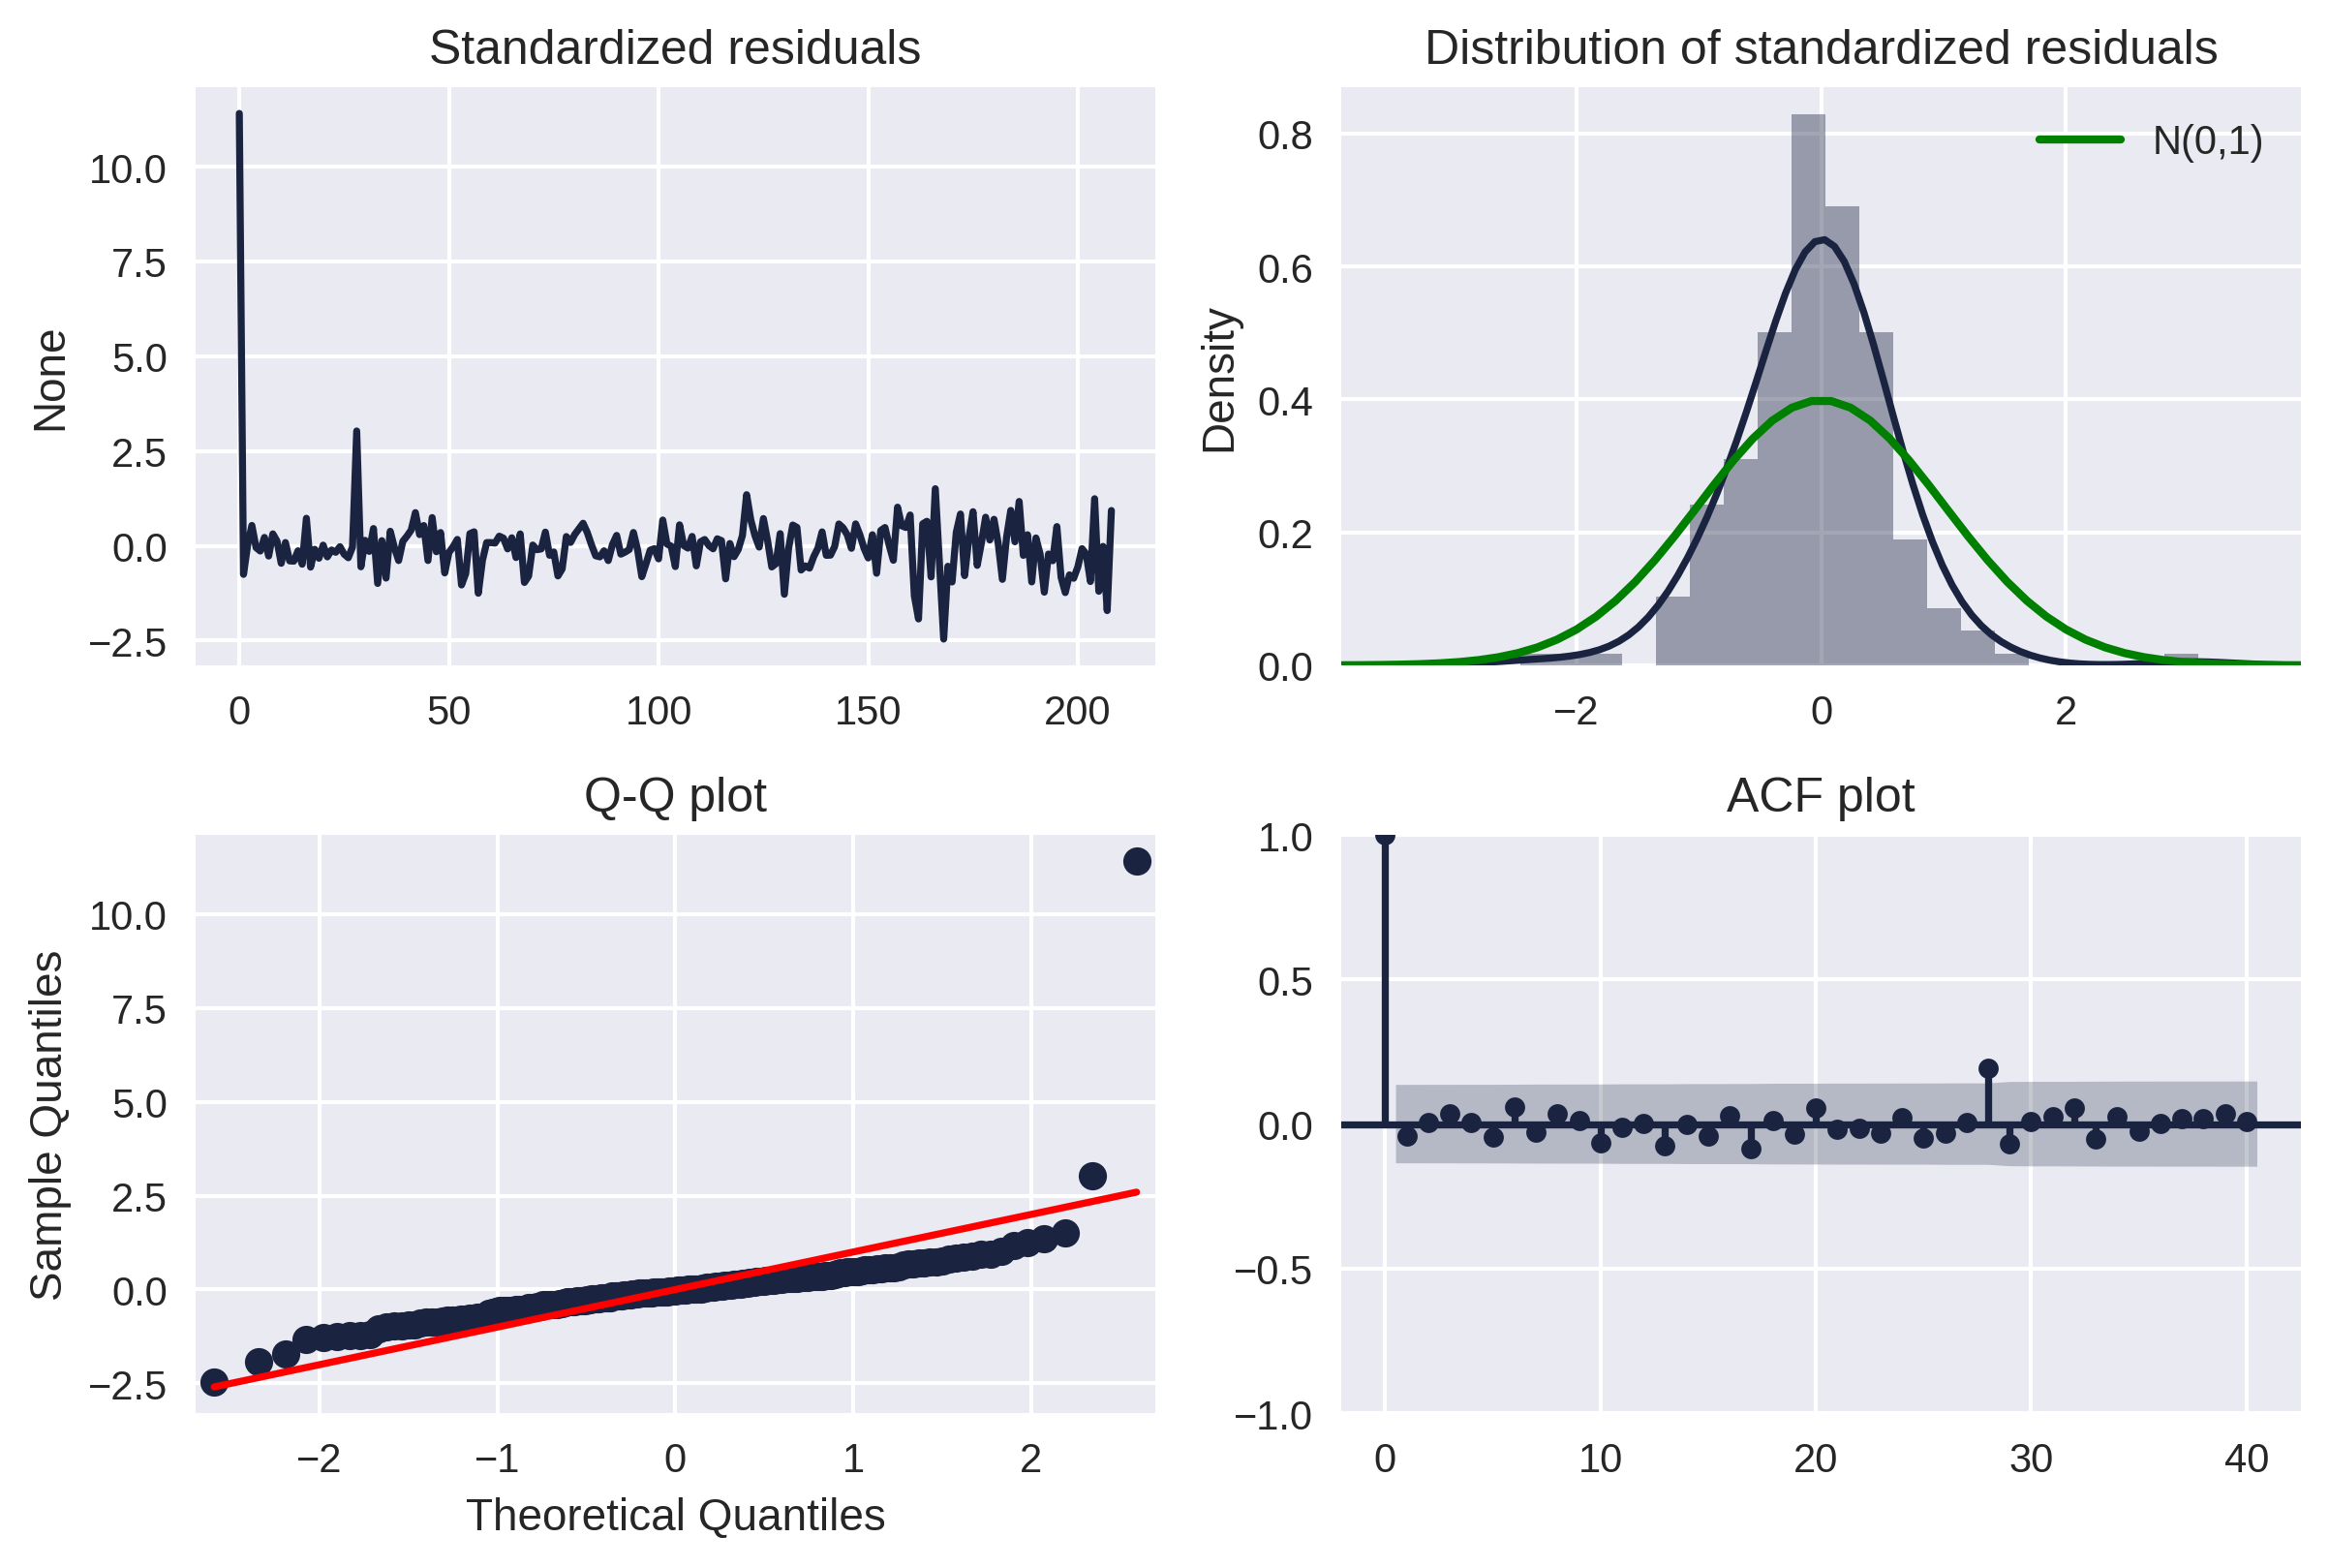

In [ ]:
# Test the residuals of the fitted ARIMA model using the function we defined earlier
arima_diagnostics(arima.resid, 40)
plt.tight_layout()
plt.show()

If the fit is good, the residuals should be similar to the white noise.

The distribution of the standardized residuals does resemble the Normal distribution.

The average of the residuals is close to 0 (-0.05), and inspecting the ACF plot leads to the conclusion that the residuals are not correlated. These two characteristics speak in favor of a good fit.

However, the tails of the distribution are slightly heavier than under normality, which we can observe in the Q-Q plot.

8. Apply the Ljung-Box's test for no autocorrelation in the residuals and plot the results:

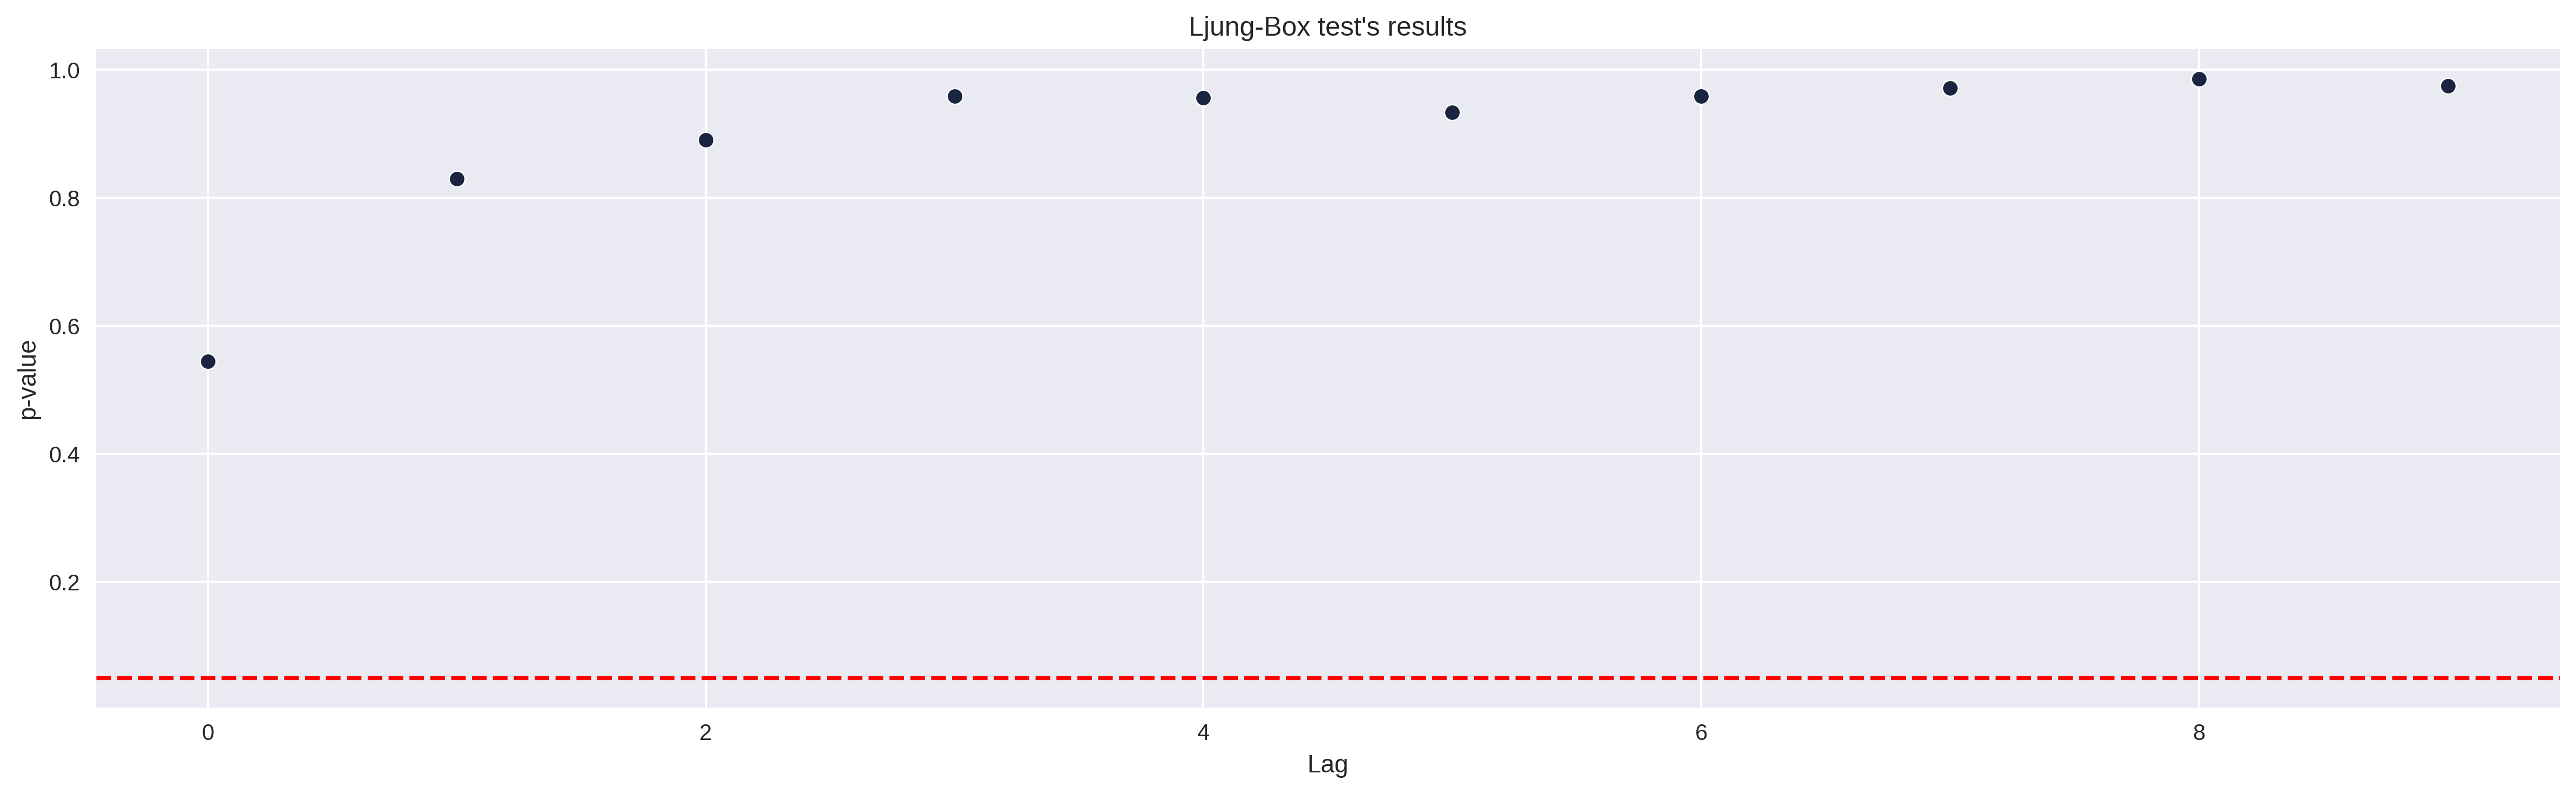

In [ ]:
# Apply the Ljung-Box's test for no autocorrelation in the residuals
ljung_box_results = acorr_ljungbox(arima.resid, return_df=True)

# create a figure with width 16 inches, height 5 inches
fig, ax = plt.subplots(1, figsize=[16, 5])
sns.scatterplot(x=range(len(ljung_box_results['lb_pvalue'])), # plot the pvalue, the second item `acorr_ljungbox()` returned
                y=ljung_box_results['lb_pvalue'],
                ax=ax) # plot the scatter plot on the figure

# Add a horizontal line across the axis
ax.axhline(0.05, ls='--', c='r') # linestyle='--', color = 'red'

# add a title and axis labels
ax.set(title="Ljung-Box test's results",
       xlabel='Lag',
       ylabel='p-value')

plt.tight_layout()
plt.show()

The results of the Ljung-Box test do not give us any reasons to reject the null hypothesis of no significant autocorrelation for any of the selected lags. This indicates a good fit of the model.

Notes:
* `statsmodels.stats.diagnostic.acorr_ljungbox(x)`
    * It returns
        * lbvalue: *float or array* the Ljung-Box test statistic.
        * pvalue: *float or array* the p-value based on chi-square distribution.
    * Different sources suggest a different number of lags to consider in the Ljung-Box test. The default value in `statsmodels` is `min((nobs // 2 - 2), 40)`, while other commonly used variants include `min(20,nobs − 1)` and `ln(nobs)`.
        * `//` means floor division

Summary:

1. We started by downloading Google's stock prices from the given years and resampling them to weekly frequency by taking the last (adjusted) close price in every week. In Step 3, we applied the first difference in order to make the series stationary.

2. Step 4 is very important because, because we determined the order of the ARIMA model based on these results. We tested for stationarity using a custom function called `test_autocorrelation`.

    * Hyndman and Athanasopoulos (2018) warned that if both p and q are positive, the ACF/PACF plots might not be helpful in determining the specification of the ARIMA model.

3. In Step 6 and Step 7, we investigated the goodness of fit by looking at the model's residuals. If the fit is good, the residuals should be similar to the white noise. That is why we used four different types of plots to investigate how closely the residuals resemble the white noise.

4. Finally, we employed the Ljung-Box test (the `acorr_ljungbox` function from `statsmodels`) for no significant correlation and plotted the results.

### There's more

**AUTO-ARIMA**: As manual selection of the ARIMA parameters might not lead to discovering the optimal model specification, there is a library called `pmdarima` (which ports the functionalities of the famous R package called `forecast` to Python). The key class of the library is called `auto_arima` and it automatically fits the best model for our time series.

In order to do so, we need to introduce a metric that the function will optimize. A popular choice is the **Akaike Information Criterion (AIC)**, which provides a trade-off between the goodness of fit of the model and its simplicity —AIC deals with the risks of overfitting and underfitting. When we compare multiple models, the lower the value of AIC, the better the model.

`auto_arima` iterates over the specified range of possible parameters and selects the model with the lowest AIC. It also facilitates estimation of SARIMA models.

We would like to verify whether the model we selected based on the ACF/PACF plots is the best one we could have selected.

1. We start by importing the library:

In [ ]:
pip install pmdarima;

In [ ]:
import pmdarima as pm

2. We run `auto_arima` with the majority of settings set to default values. We only exclude potential seasonality.

In [ ]:
auto_arima = pm.auto_arima(goog,
                           error_action='ignore', # If unable to fit an `ARIMA` for whatever reason, it will ignores errors
                           suppress_warnings=True,
                           seasonal=False) # `seasonal`: whether to fit a seasonal ARIMA, we exclude potential seasonality
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  209
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -365.637
Date:                Wed, 21 Feb 2024   AIC                            737.273
Time:                        11:06:10   BIC                            747.286
Sample:                    01-04-2015   HQIC                           741.322
                         - 12-30-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1228      0.075      1.648      0.099      -0.023       0.269
ma.L1         -0.2376      0.070     -3.417      0.001      -0.374      -0.101
sigma2         1.9691      0.113     17.487      0.000       1.748       2.190
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):               130.88
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                             0.06
Prob(H) (two-sided):                  0.01   Kurtosis:                         6.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

It looks like a simpler model provides a better fit. ARIMA(0,1,1) actually corresponds to one of the special cases—SES.

3. In the next step we try to tune the search of the optimal parameters:

In [ ]:
auto_arima = pm.auto_arima(goog,
                           error_action='ignore',
                           suppress_warnings=True,
                           seasonal=False,
                           # The stepwise algorithm can be significantly faster than fitting all hyper-parameter
                           # combinations and is less likely to over-fit the model.
                           stepwise=False,  # Whether to use the stepwise algorithm
                           # n_jobs : int, optional (default=1)
                           # The number of models to fit in parallel in the case of a grid search (`stepwise=False`s).
                           # Default is 1, but -1 can be used to designate "as many as possible".
                           n_jobs=-1)
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  209
Model:               SARIMAX(3, 1, 2)   Log Likelihood                -359.586
Date:                Wed, 21 Feb 2024   AIC                            733.173
Time:                        11:06:20   BIC                            756.535
Sample:                    01-04-2015   HQIC                           742.619
                         - 12-30-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4976      0.313      1.592      0.111      -0.115       1.110
ar.L1         -1.5445      0.138    -11.208      0.000      -1.815      -1.274
ar.L2         -1.1844      0.137     -8.622      0.000      -1.454      -0.915
ar.L3         -0.3043      0.068     -4.503      0.000      -0.437      -0.172
ma.L1          1.3586      0.140      9.725      0.000       1.085       1.632
ma.L2          0.7929      0.131      6.048      0.000       0.536       1.050
sigma2         1.8544      0.126     14.728      0.000       1.608       2.101
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               117.24
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               1.82   Skew:                             0.09
Prob(H) (two-sided):                  0.01   Kurtosis:                         6.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

This time, the suggested model is ARIMA(3,1,2), which has lower AIC.

So, why did the initial run not discover this model? The reason is that, by default, `auto_arima` uses a stepwise algorithm to traverse the parameter space. Additionally, there are some approximations to speed up the search. Generally, a much larger set of models will be fitted if we disable both `stepwise` and `approximation`. We set `n_jobs = -1` to use all the cores for the search.

We can use the `plot_diagnostics` method of a fitted `pm.auto_arima` model to obtain a similar evaluation of the residuals to the one we obtained via the custom `arima_diagnostics` function for the models estimated using `statsmodels`.

There are also many different settings we can experiment with, such as the following:
* Selecting the starting value for the search.
* Capping the maximum values of parameters in the search.
* Selecting different statistical tests for determining the number of differences (also seasonal).
* Selecting an out-of-sample evaluation period (`out_of_sample_size`). This will make the algorithm fit the models on the data up until a certain point in time (the last observation—`out_of_sample_size`) and evaluate on the held-out set.

We list some of the notable extensions to the ARIMA framework:
* **ARIMAX**: Adds exogenous variable(s) to the model.
* **SARIMA (Seasonal ARIMA)**: Extends ARIMA to account for seasonality in the time series. The full specification is SARIMA(p,d,q)(P,D,Q)m, where the capitalized parameters are analogous to the original ones, but they refer to the seasonal component of the time series. m refers to the period of seasonality.

In `statsmodels`, ARIMA models can be fitted using two classes: `ARIMA` and `SARIMAX`. The latter one is more flexible and allows us to include exogenous variables, as well as account for the seasonal component. However, models in these two classes use a different formulation of ARIMA, where the latter one uses the state-space formulation. That is why fitting the same ARIMA(1,1,1) using these two classes will produce slightly different results.

## 3.7 Forecasting using ARIMA class models

In this recipe, we focus on using the ARIMA class models to forecast future observations of a given time series.

We compare the forecasting performance of the models we built in the Modeling time series with ARIMA class models recipe, where we investigated Google's stock prices in 2015-2018. We manually selected an ARIMA(2,1,1) model, while `auto_arima` suggested ARIMA(3,1,2). In this recipe, we use both models as they were initially estimated using different libraries, offering slightly different possibilities in terms of forecasting.

We forecast Google's weekly stock prices over the first 3 months of 2019.

### Getting ready

The ARIMA(2,1,1) model from the Modeling time series with ARIMA class models recipe is stored in the `arima` object, while the ARIMA(3,1,2) model is stored in the `auto_arima` object. The original data from 2015-2018 is stored in the goog object.

### How to do it...

1. Download additional test data and resample to weekly:

In [ ]:
import yfinance as yf

In [ ]:
# download additional test data
df = yf.download('GOOG',
                 start='2019-01-01',
                 end='2019-03-31',
                 progress=False)

print(f'Downloaded {df.shape[0]} rows of data.')

# resample the data to weekly
test = df.resample('W') \
         .last() \
         .rename(columns={'Adj Close': 'adj_close'}) \
         .adj_close

Downloaded 61 rows of data.


2. Obtain forecasts from the first model and store them in a DataFrame:

In [ ]:
n_forecasts = len(test)

# obtain forecasts from the models that were fitted using `statsmodels`
arima_pred = arima.get_forecast(n_forecasts) # specify the length of the forecast

# create a list containing two pd.Dataframe which store forecasts and confidence intervals
arima_pred = [arima_pred.predicted_mean, arima_pred.conf_int(alpha=0.05)]

# # Concatenate the two Dataframes horizontally along the axis 1
arima_pred = pd.concat(arima_pred, axis=1).set_index(test.index)  # set the new DataFrame index same as the test index

arima_pred.rename(columns={'predicted_mean': 'prediction', 'lower adj_close': 'ci_lower', 'upper adj_close': 'ci_upper'}, inplace = True)

arima_pred

prediction   ci_lower   ci_upper
Date                                        
2019-01-06   51.749631  49.000562  54.498700
2019-01-13   51.264708  47.746179  54.783237
2019-01-20   51.480835  47.474050  55.487621
2019-01-27   51.481916  46.943393  56.020438
2019-02-03   51.441863  46.442911  56.440815
2019-02-10   51.457936  46.047030  56.868842
2019-02-17   51.458748  45.659133  57.258362
2019-02-24   51.455472  45.292370  57.618574
2019-03-03   51.456654  44.951027  57.962281
2019-03-10   51.456774  44.625385  58.288164
2019-03-17   51.456509  44.314237  58.598781
2019-03-24   51.456595  44.016470  58.896719
2019-03-31   51.456608  43.730078  59.183138

Notes:    
* `arima.forecast(steps=1, alpha=0.05)`
    * Out-of-sample forecasts
    * `steps` : *int*. The number of out of sample forecasts from the end of the sample.
    * `alpha` : *float*. The confidence intervals for the forecasts are (1 - alpha) %
    * Return
        * The resulting object contained the forecasts, standard deviations, and confidence intervals (using the default significance level of 5%).


* `pandas.concat(objs, axis=0)`
    * `axis`: *{0/'index', 1/'columns'}, default 0*. The axis to concatenate along.

In [ ]:
# pandas.concat
example1 = pd.Series(['a', 'b'])
example2 = pd.Series(['c', 'd'])
print(example1)
print(example2)
pd.concat([example1, example2],axis=1)

0    a
1    b
dtype: object
0    c
1    d
dtype: object


0  1
0  a  c
1  b  d

3. Obtain forecasts from the second model and store them in a DataFrame:

In [ ]:
# Use the predict method
a, b = auto_arima.predict(n_periods=n_forecasts, #specify the number of periods that we wanted to forecast for.
                                     return_conf_int=True, # `return_conf_int`: Whether to get the confidence intervals of the forecasts.
                                     alpha=0.05) # 'alpha': The confidence intervals for the forecasts are (1 - alpha) %

a=a.tz_localize(None)



# # # create a list containing two pd.Dataframe which store forecasts and confidence intervals
auto_arima_pred = [pd.DataFrame(a,
                                 columns=['prediction']),
                    pd.DataFrame(b,
                                 columns=['ci_lower', 'ci_upper'], index=a.index)]

auto_arima_pred

#auto_arima_pred = pd.concat(a,b)
# Concatenate the two Dataframes horizontally along the axis 1
auto_arima_pred = pd.concat(auto_arima_pred, axis=1).set_index(test.index) # set the new DataFrame index same as the test index

auto_arima_pred

prediction   ci_lower   ci_upper
Date                                        
2019-01-06   51.269478  48.600490  53.938467
2019-01-13   51.903143  48.461483  55.344803
2019-01-20   51.238936  47.310404  55.167468
2019-01-27   52.189695  47.735081  56.644310
2019-02-03   51.812709  46.816147  56.809271
2019-02-10   51.968551  46.639700  57.297403
2019-02-17   52.382625  46.605569  58.159681
2019-02-24   52.170794  46.029653  58.311935
2019-03-03   52.457681  46.002759  58.912604
2019-03-10   52.637052  45.819180  59.454925
2019-03-17   52.582252  45.467712  59.696791
2019-03-24   52.864715  45.456008  60.273422
2019-03-31   52.936349  45.223845  60.648852

4. Plot the results:

In [ ]:
arima_pred.prediction

Date
2019-01-06    51.749631
2019-01-13    51.264708
2019-01-20    51.480835
2019-01-27    51.481916
2019-02-03    51.441863
2019-02-10    51.457936
2019-02-17    51.458748
2019-02-24    51.455472
2019-03-03    51.456654
2019-03-10    51.456774
2019-03-17    51.456509
2019-03-24    51.456595
2019-03-31    51.456608
Freq: W-SUN, Name: prediction, dtype: float64

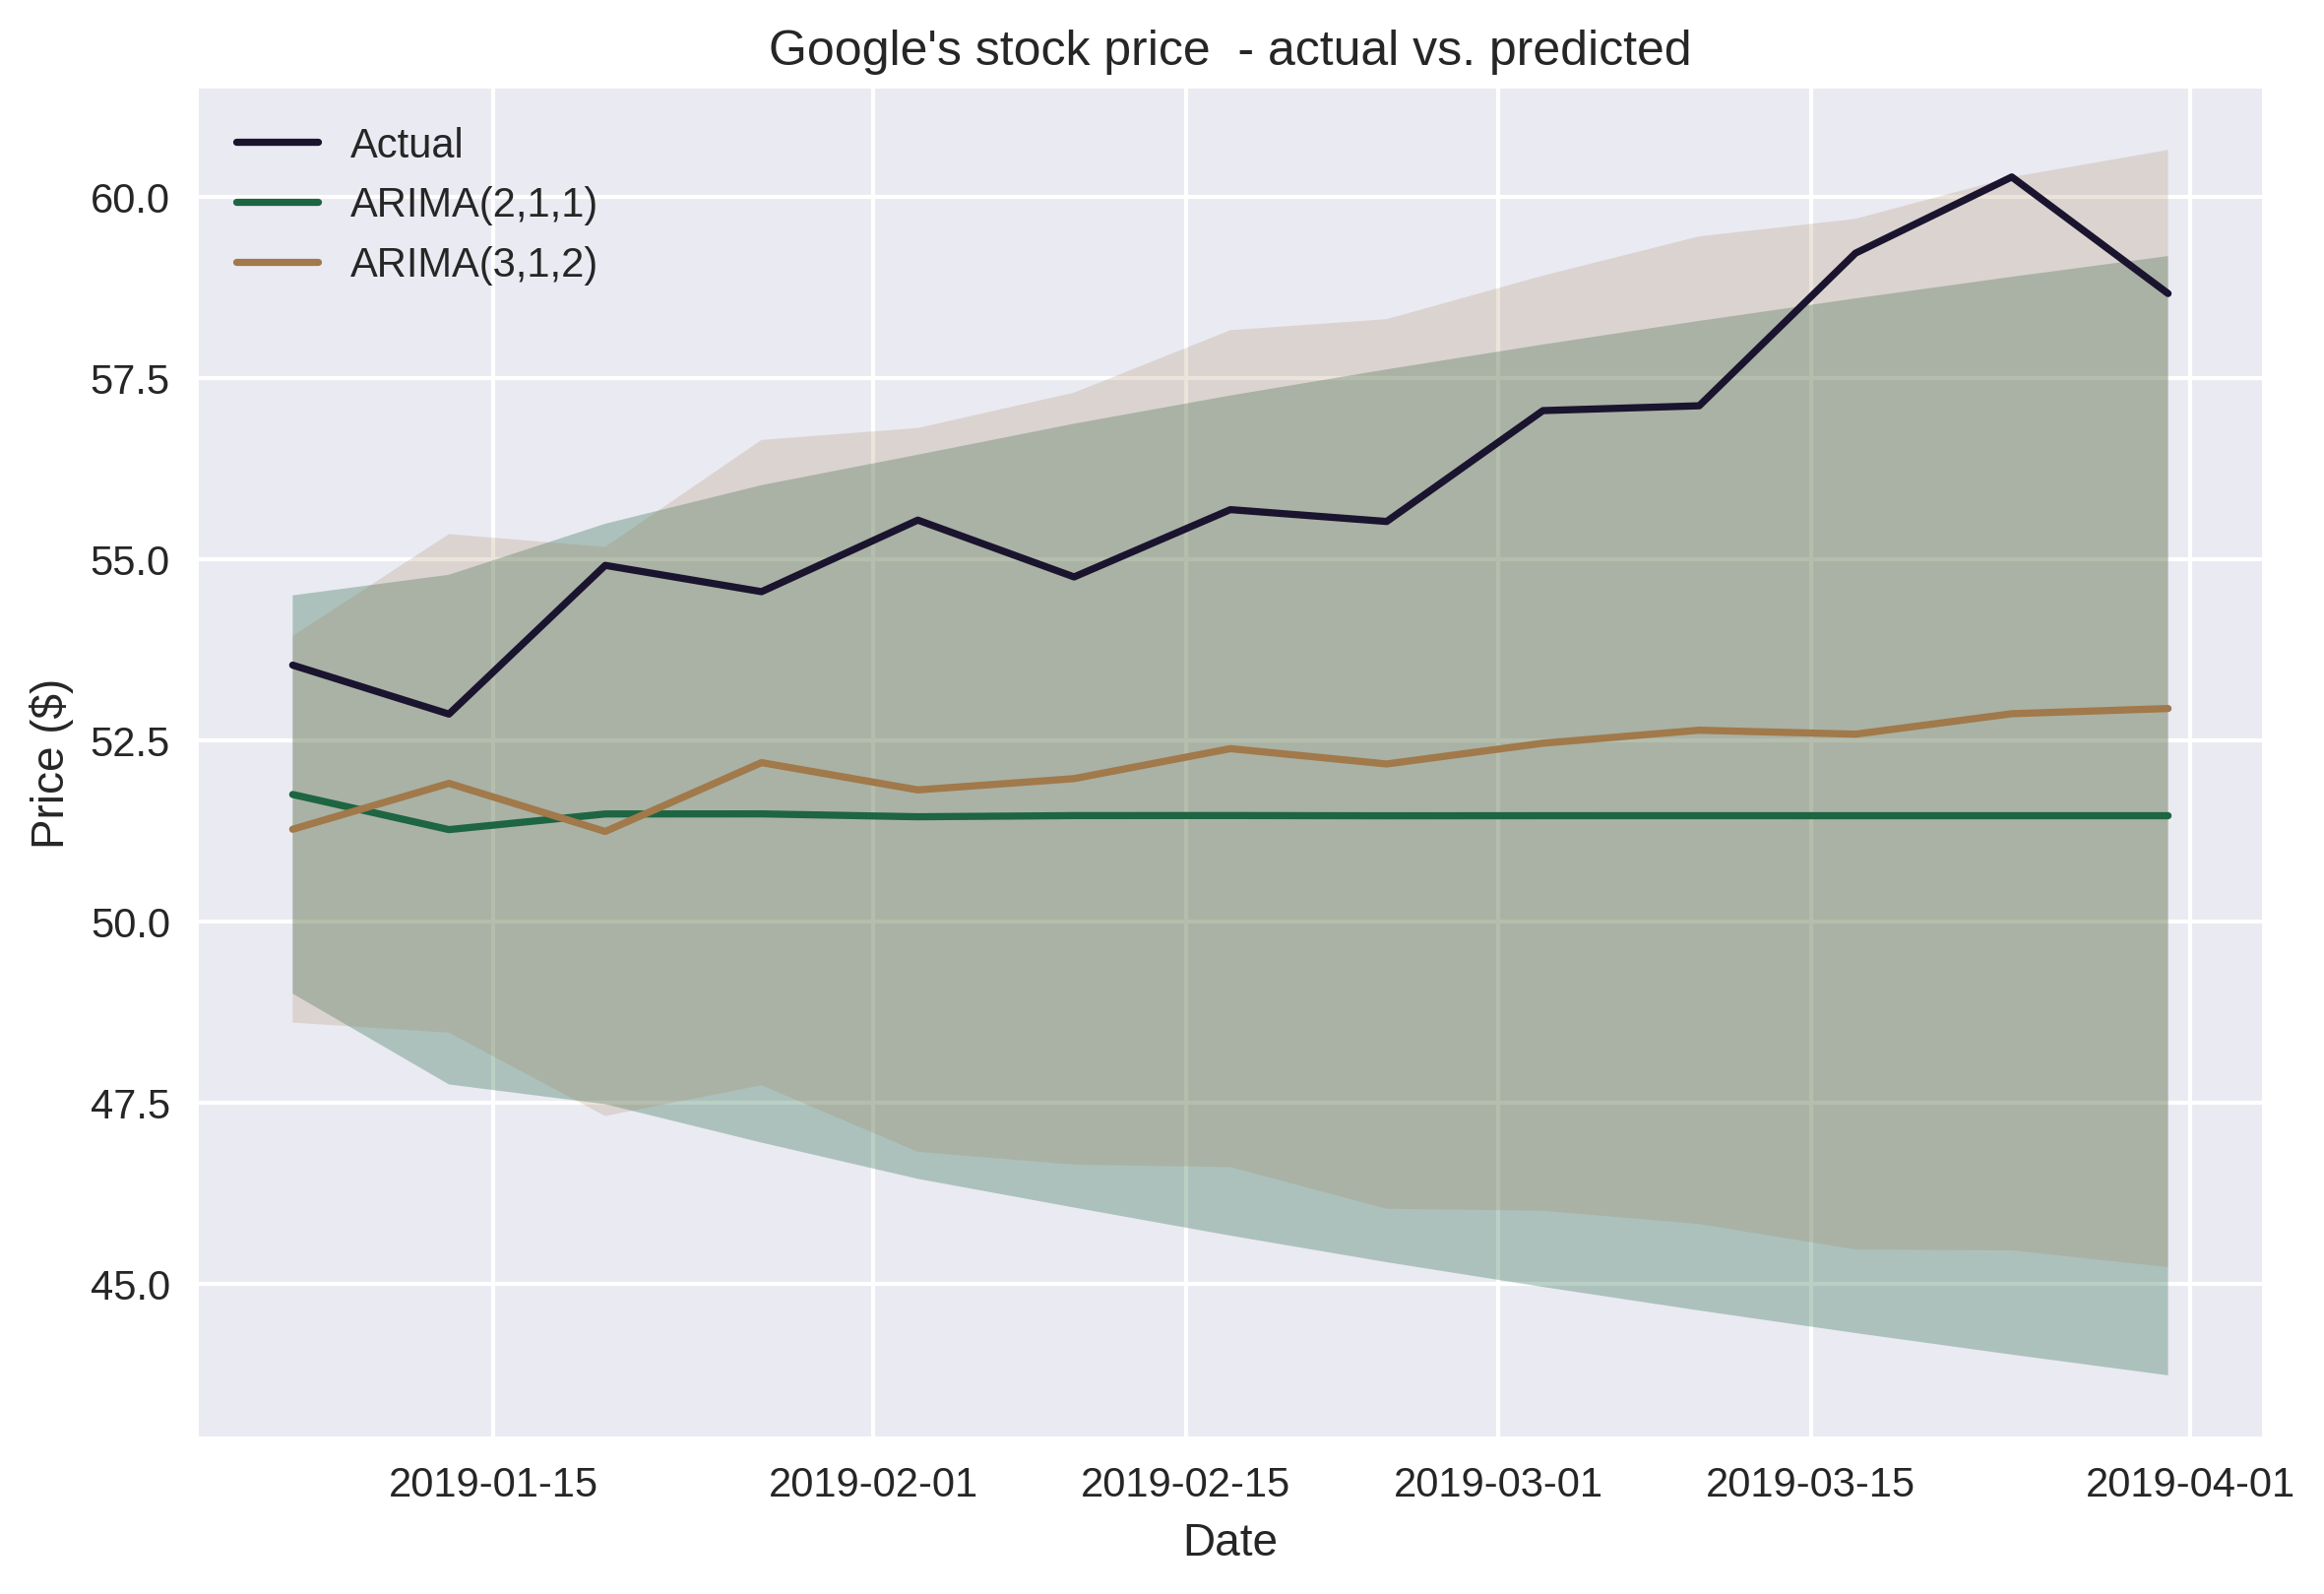

In [ ]:
# Plot the results
fig, ax = plt.subplots(1)

# plot the line of the actual test value
ax = sns.lineplot(data=test, color=COLORS[0], label='Actual')

# plot the arima prediction value
ax.plot(arima_pred.prediction, c=COLORS[1], label='ARIMA(2,1,1)')

#fill between two sets of y-values: arima_pred.ci_lower and arima_pred.ci_upper
ax.fill_between(arima_pred.index,
                 arima_pred.ci_lower,
                 arima_pred.ci_upper,
                 alpha=0.3,  # with 30% opacity
                 facecolor=COLORS[1])

# plot the auto_arima prediction value
ax.plot(auto_arima_pred.prediction, c=COLORS[2],
        label='ARIMA(3,1,2)')

# fill between two sets of y-values: auto_arima_pred.ci_lower and auto_arima_pred.ci_upper
ax.fill_between(auto_arima_pred.index,
                auto_arima_pred.ci_lower,
                auto_arima_pred.ci_upper,
                alpha=0.2,  # with 20% opacity
                facecolor=COLORS[2])

# add the title and axis labels
ax.set(title="Google's stock price  - actual vs. predicted",
       xlabel='Date',
       ylabel='Price ($)')
ax.legend(loc='upper left') # `loc`: The location of the legend. {'upper left', 'upper right', 'lower left', 'lower right'}
                            # place the legend at the corresponding corner of the axes/figure.

plt.tight_layout()
plt.show()

From the preceding plot, we can see that the forecasts from the ARIMA(2,1,1) model are smoother and that there is less volatility in them. Over time, the forecast error increases, however, the actual observations lie within the confidence interval of both models.

Summary:

1. In Step 2, we obtained forecasts from the models that were fitted using `statsmodels`. To do so, we used the `forecast` method of the fitted object. We specified the length of the forecast (by default, it is 1 period ahead). The resulting object contained the forecasts, standard deviations, and confidence intervals (using the default significance level of 5%). For simplicity, we stored the necessary information in a `pandas` DataFrame.

2. In Step 3, we worked with the auto-ARIMA model from the `pmdarima` library. We used the `predict` method and also specified the number of periods that we wanted to forecast for.

3. Finally, we plotted all the results, along with the Google's stock prices.


## There's more...

When working with the `statsmodels` library, we can also use two different methods for forecasting.

The first one is called `predict`. We need to specify the start and end of the prediction interval. We can use indices (in the case of the out of sample, start needs to be the first value after the last index of the training data), a string (`'2019-03-15'`), or a datetime type (`pd.datetime(1990, 12, 25)`). We should also specify `typ` -in case any differencing was done and we want to receive the forecasts in the original scale, we should use `'levels'` as the value (the default is `'linear'`).

The second method—`plot_predict`—an extension of the first one. Additional parameters include `plot_insample` (indicates whether we want to plot the in-sample fit) and dynamic. The second one affects the in-sample prediction (fitted values). If `dynamic=False`, the in-sample lagged values are used for prediction. Otherwise, the in-sample predictions are used in place of lagged dependent variables.

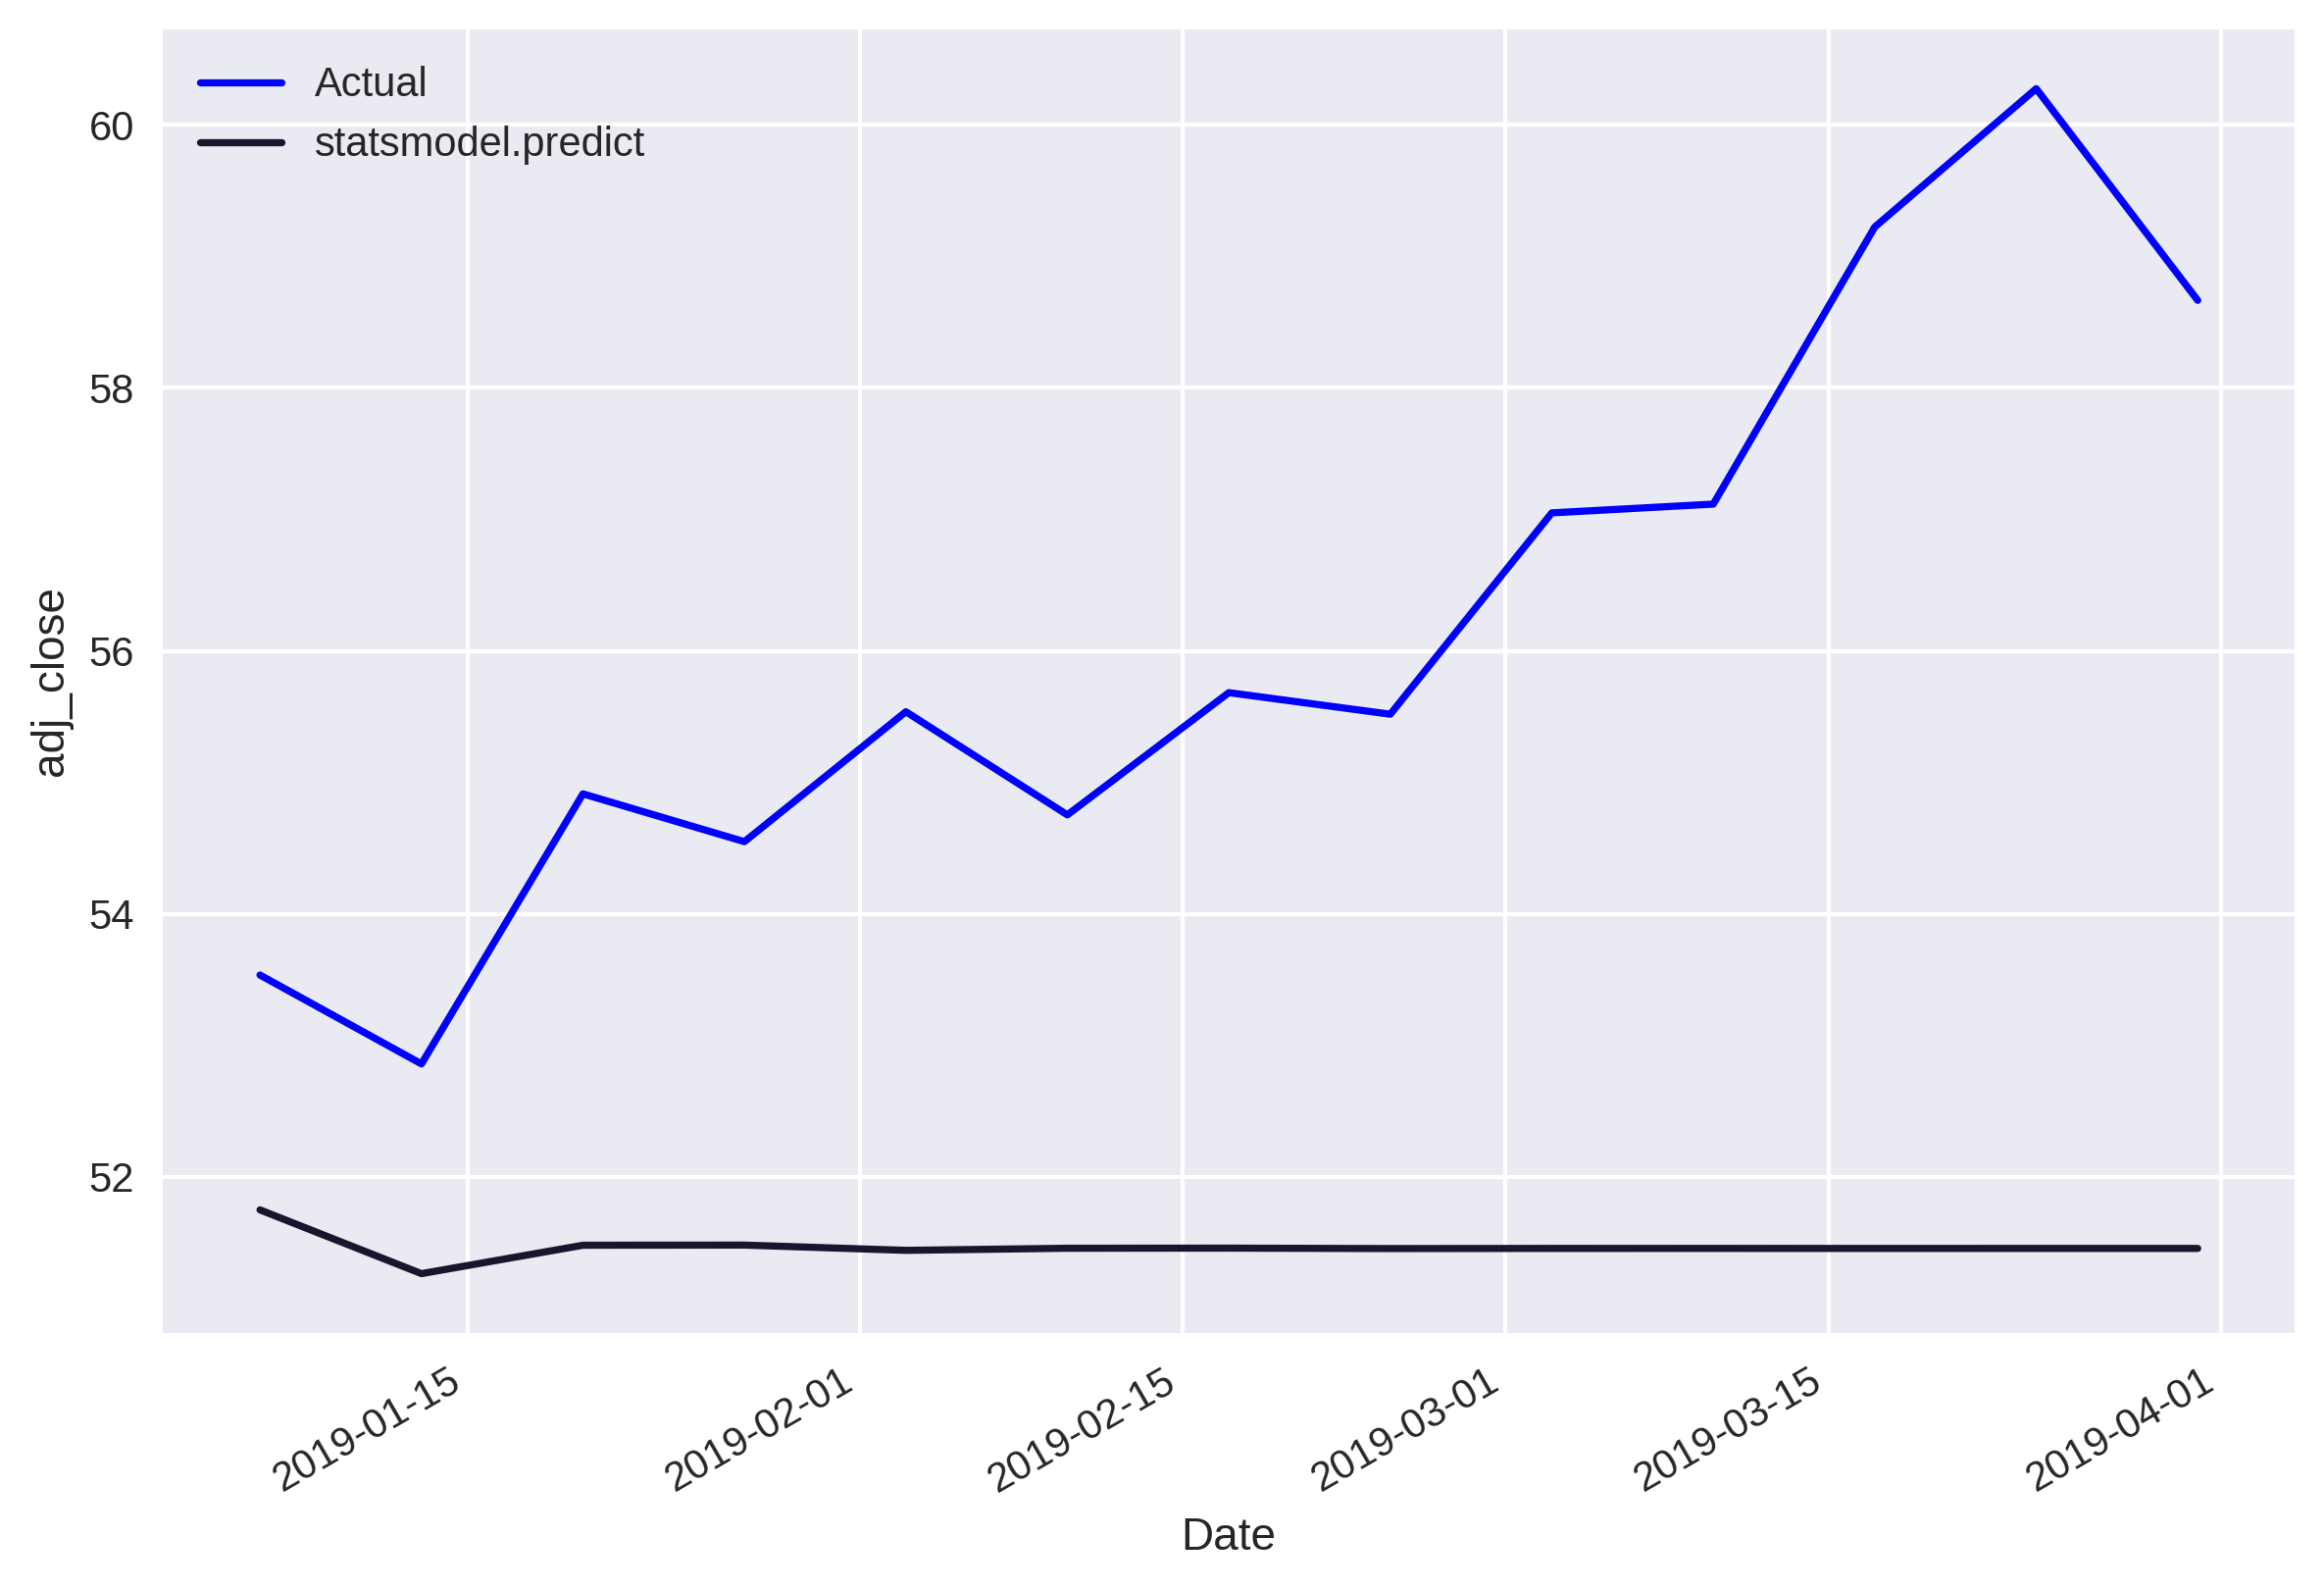

In [ ]:
#from statsmodels.tsa.arima_model import ARIMA
#arima = ARIMA(goog, order=(2, 1, 1)).fit(disp=0)

# in sample fit
#arima.predict(typ='levels').plot()
#sns.lineplot(data=goog, color='b', label='Actual')
# equivalent to arima.plot_predict(dynamic=False,plot_insample=False)

fig, ax = plt.subplots(1)
ax = sns.lineplot(data=test, color='b', label='Actual')

arima.predict(start='2019-01-01',end='2019-03-31',typ='levels').plot(color=COLORS[0],legend=True, label='statsmodel.predict')
# it is equivalent to
#arima.plot_predict(start='2019-01-01',end='2019-03-31',dynamic=False,plot_insample=False,ax=ax)

plt.tight_layout()
plt.show()